# Survey Analysis

In [13]:
# Data processing
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import math
import textwrap
from datetime import datetime
from collections import OrderedDict

import locale # For currency formatting
locale.setlocale(locale.LC_ALL, '')

# Common DGLIM utilities
import dglim
dglim.setProjectPath('../')
dglim.usePlotStyle()

%matplotlib inline

In [14]:
pd.Series(["{0}%".format(round(100*x/5, 2)) for x in [.1234, .253, .754, .658, .976]])

0     2.47%
1     5.06%
2    15.08%
3    13.16%
4    19.52%
dtype: object

In [5]:
get_percentages([.1234, .253, .754, .658, .976], 5)

2.47%
5.06%
15.08%
13.16%
19.52%


In [4]:
# method to get all percentages
def get_percentages(arr, total):
    res = map(lambda x : 100.0*x/total, arr)
    for ele in res:
        print "{0}%".format(round(ele, 2))

In [3]:
survey_df = pd.read_excel("../Datasets/DGLIM Survey Data/DGLIM_data_final_111417.xlsx")
master_df = dglim.loadData("Master Dataset")

In [4]:
city_type_counts = master_df['Business Type'].value_counts()
city_type_counts['RETAIL MERCHANT']

848

In [6]:
qs = ['Q24', 'Q26', 'Q28']
temp_df = master_df[qs]

mask = temp_df[qs[0]].apply(lambda x: False)
for column in qs:
    mask = mask | temp_df[column].apply(lambda x: True if x == 1 else False)
master_df[mask]

DGLIM ID  GRU ID                                   Name  \
DGLIM ID                                                            
147            147   39406              LITTLE FLOWER COFFEE INC.   
329            329   23788                         BATTEN,  DIANE   
346            346   42706            LAUREN RICHARDSON LAW, PLLC   
351            351   41535                       BANKS, GREGORY R   
439            439   11154                       BENSEN, PETER L.   
521            521   42414         BLACKADDER BREWING COMPANY LLC   
529            529   34784               ACADEMY FOR FIVE ELEMENT   
579            579   15424                  HUDSON & COMPANY, INC   
614            614   42421                     ANATOMIC BODY ARTS   
659            659   39879                         BATES, MICHAEL   
719            719   38881         SIMPLY UNFORGETABLE PARTY SHOP   
723            723   42109           DOWNTOWN WINE AND CHEESE LLC   
743            743   42441                         WESEMAN, LINDA   
745            745   33743         LCS INTEGRATIVE COUNSELING AND   
750            750   42727   DELICIAS K'TRACHAS LATIN CUISINE LLC   
763            763   12035            CENTRAL BUILDER SUPPLIES OF   
800            800   29660                    CARPET SYSTEMS PLUS   
836            836   21571                  WHITAKER, BETSY (R/E)   
868            868   39800                     HARVEST THYME CAFE   
893            893   28832                    RAYMOND AUTO REPAIR   
939            939   19659                       SENESAC, CLAUDIA   
949            949   34433           SANTA FE STORAGE GAINESVILLE   
1019          1019   42744                    PARISLEAF PAPER LLC   
1109          1109   42490                 JV-SC INVESTMENTS, LLC   
1288          1288   42752                JACQUELYN BROOK DESIGNS   
1430          1430   41622                             SWAMP WASH   
1454          1454   37410          DIVISION 10 DISTRIBUTORS, LLC   
1459          1459   42777                              MIDAX INC   
1610          1610   38872        CONCRETE PRECAST PRODUCTS, INC.   
1628          1628   26638             LA AURORA SUPERMARKET, INC   
...            ...     ...                                    ...   
4889          4889   29687                 UNIVERSITY AIR CENTER.   
4944          4944   40483                          MURPHY, CRAIG   
5130          5130   41770                          HEARD, TONY A   
5149          5149   42238                            REED, TANYA   
5204          5204   40459                       DEMINT, THOMAS A   
5275          5275   40932                      LOPER, JEREMIAH M   
5308          5308   39897                        THOMAS, ANNETTE   
5331          5331   42735                  CARUGDA, IVANNA MAY D   
5346          5346   26325     UNION STREET FARMERS' MARKET,  INC   
5428          5428   42509                     BUCHHOLZ, KIMBERLY   
5475          5475   41671                        WATERS, ELOIS L   
5540          5540   29374                        ROGERS, CHARLES   
5662          5662   42558                   JOHNSON, NAKESHIA L.   
5682          5682   42675                      ALLEN, SHRONDA Y.   
5698          5698   42602                       MALLARY, LORETTA   
5940          5940   41584                             DINO GAMES   
5949          5949   42153              CUT ABOVE BOUTIQUE INC, A   
5994          5994   12426                   COMFORT TEMP COMPANY   
6015          6015   20325            DANIEL J. CHALMERS, CPA, PA   
6070          6070   42114                          BROADWAY, INC   
6113          6113   40895  ACTIONABLE QUALITY ASSURANCE CO., LLC   
6169          6169   14186     NORTH FLORIDA CATARACT SPECIALISTS   
6311          6311   38177              GATOR INK ENTERPRISES LLC   
6372          6372   39992                                 B3 GYM   
6465          6465   42350   NEMATOLOGY SOLUTIONS ASSOCIATES, LLC   
6553    

In [10]:
not_none = [
    'Q25_1', 'Q25_2',
    'Q25_3', 'Q25_4',
    'Q25_5', 'Q25_6',

    'Q27_1', 'Q27_2',
    'Q27_3', 'Q27_4',
    'Q27_5', 'Q27_6',

    'Q29_1', 'Q29_2',
    'Q29_3', 'Q29_4',
    'Q29_5', 'Q29_6',
]

none = [
    'Q25_7',
    'Q27_7',
    'Q29_8'
]

didnt_choose_none = survey_df[not_none].sum(axis='columns').dropna()
chose_none = survey_df[none].sum(axis='columns').dropna()

In [11]:
none_set = set(chose_none.index.tolist()) - set(didnt_choose_none.index.tolist())

In [12]:
len(none_set)

35

In [13]:
len(didnt_choose_none)

66

In [18]:
weightsDict = {}

# Get percentage of total count for each type of business
surveyBtypes = merged_df['Business Type'].value_counts(normalize=True) # merged_df only contains businesses that responded to the survey

# Count total number of businesses that have a type
totalCount = float(businessTypesCnts_ActBusDataset.sum()) # + 100 ### Why add 100?

# Compute weights per business
for bType in surveyBtypes.index:
    typeCount = businessTypesCnts_ActBusDataset[bType]
    weight = (typeCount/totalCount if typeCount else 10000/totalCount)/float(surveyBtypes[bType])
    # Note: "PEDDLER" is the only type that fails the "if rec.values"

    # Trim top 1% based on Weights_per_business_type.xlsx
    weight = min(weight, 3.00)

    weightsDict[bType] = weight

# WHAT THIS IS DOING ---
# For each type:
#    Divide the number of businesses of that type by the total number of businesses
#    Divide that percentage by the percentage of survey businesses that match the type
#
#    In other words, the weight is the ratio of the percentage in active_businesses to the percentage in the survey

In [19]:
businessTypesCnts_ActBusDataset['RETAIL MERCHANT']

845

In [20]:
totalCount

7044.0

In [21]:
weightsDict['RETAIL MERCHANT']

1.0810875529374739

In [22]:
weightsDict['PEDDLER']

2.1237932992617834

In [23]:
merged_df['weight'] = merged_df['Business Type'].apply(lambda x : weightsDict[x])

In [24]:
weigthsSeries = merged_df[['Business Type','weight']].drop_duplicates().set_index('Business Type').sort_values(by='weight',ascending=False)

In [25]:
weigthsSeries.to_excel("Weights_per_Business_type.xlsx")

In [26]:
# Frequency distribution of weight variable
merged_df['weight'].value_counts().sort_index().to_excel("Frequency distribution of weight variable.xlsx")

In [27]:
top_five_businesses = merged_df['Business Type'].value_counts()[:5]

In [28]:
merged_df[merged_df['Business Type'] == top_five_businesses.index[0]]['Q43'].value_counts()

2    27
1    25
3     3
4     1
Name: Q43, dtype: int64

In [29]:
merged_df.rename(columns={'Q29_8' : 'Q29_7'}, inplace=True)

In [30]:
survey_df = survey_df.drop(survey_df.index[[0,1]])

In [31]:
num_res = OrderedDict()
for col in survey_df.columns:
    if isinstance(survey_df[col][2], str):
        num_res[col] = [749 - (survey_df[col] == '-99').sum() - survey_df[col].isnull().sum()]
    else:
        num_res[col] = [749 - (survey_df[col] == -99).sum() - survey_df[col].isnull().sum()]

In [32]:
num_res_df = pd.DataFrame.from_items(num_res.iteritems(),orient='index',columns=['Number of responses'])

In [33]:
def to_int(num):
    try:
        val = int(num)
        return val
    except:
        pass

In [34]:
for ele in [round(x,2) for x in list(merged_df.groupby('Q5').agg({'weight':'sum'})['weight'])]:
    print round(ele*100/24.96,2)

2.36
9.17
17.91
60.38


** Q7     - How many employees currently work at this location of your business? Please include all full and part time employees. Do not include anyone that did work as an independent contractor or subcontractor **

In [35]:
num_res_df.loc['Q7']

Number of responses    602
Name: Q7, dtype: int64

In [36]:
print merged_df.groupby('Q9').agg({'weight':'sum'}).index
for ele in [round(x,2) for x in list(merged_df.groupby('Q9').agg({'weight':'sum'})['weight'])]:
    print "{0}%".format(round(ele*100/21.6,2))

Int64Index([1, 2, 3, 4, 5, 6, 7, 10, 15, 27], dtype='int64', name=u'Q9')
36.48%
4.26%
9.77%
5.0%
7.36%
9.77%
5.0%
1.57%
4.77%
3.06%


In [37]:
survey_df['Q7'] = survey_df['Q7'].apply(to_int)

In [38]:
year_map = {}
yr = 58
for i in range(1,7):
    year_map[i] = yr
    yr -= 1
yr = 48
for i in range(7,55):
    year_map[i] = yr
    yr -= 1

In [39]:
years_in_bus_vs_num_emp = merged_df[['Q3','Q7']][merged_df['Business Type'] == 'RESTAURANT'].dropna()

In [40]:
years_in_bus_vs_num_emp['Q3'] = years_in_bus_vs_num_emp['Q3'].apply(lambda x : year_map[x])

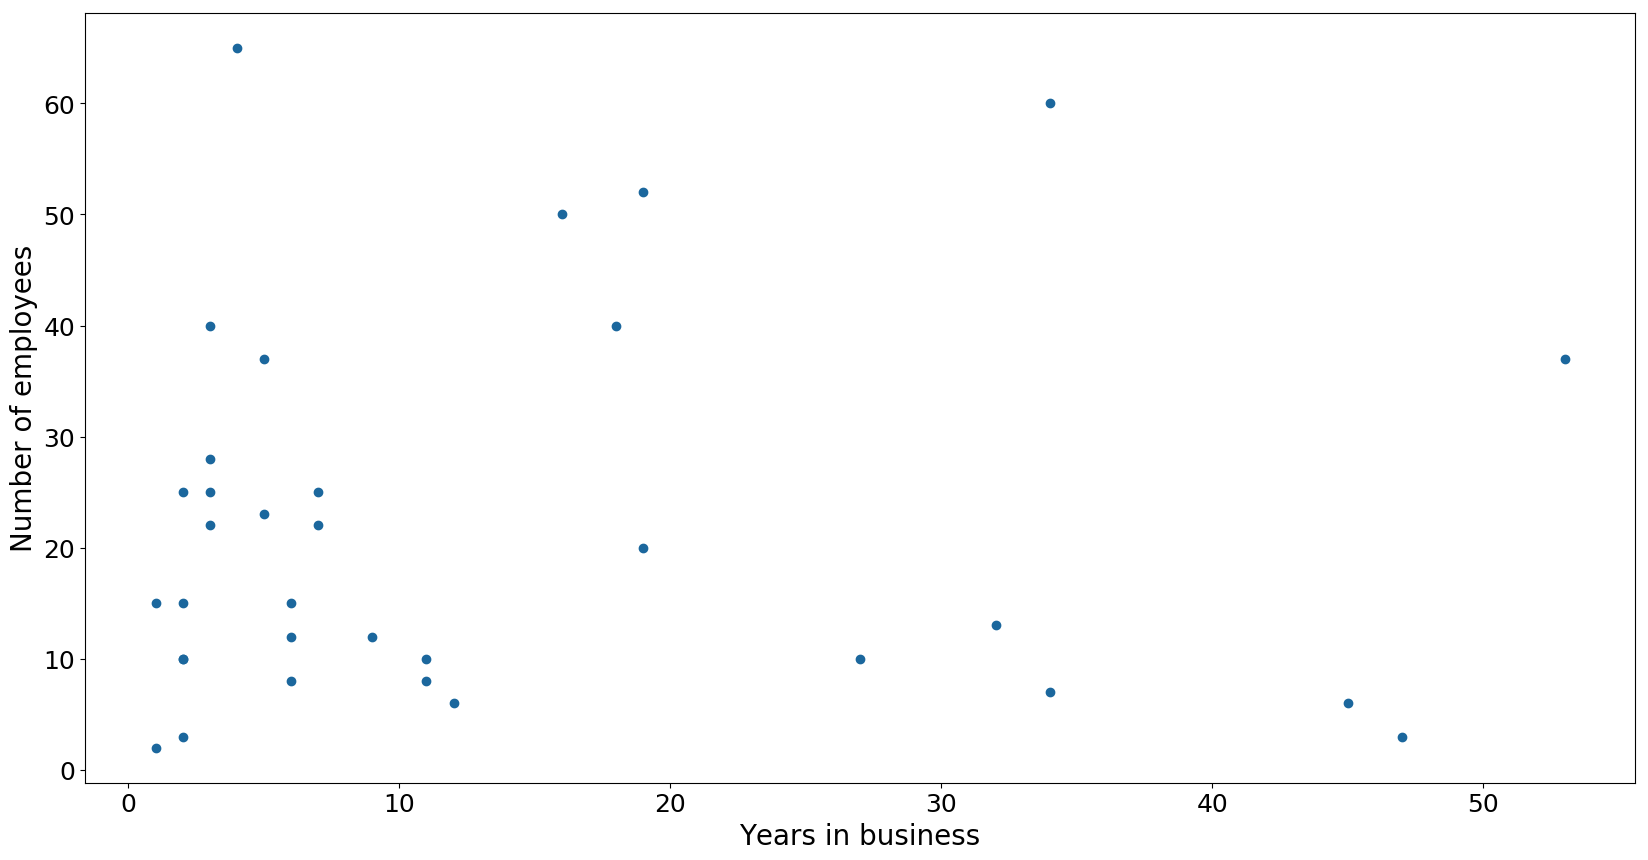

In [41]:
plt.figure(figsize=(20,10))
plt.scatter(years_in_bus_vs_num_emp['Q3'], years_in_bus_vs_num_emp['Q7'])
plt.xlabel("Years in business")
plt.ylabel("Number of employees")

** Q8     - How many employees worked at this location of your business as of January 1, 2017? Please include all full and part time employees. Do not include anyone that did work as an independent contractor or subcontractor **

In [42]:
num_res_df.loc['Q8']

Number of responses    598
Name: Q8, dtype: int64

In [43]:
survey_df['Q8'] = survey_df['Q8'].apply(to_int)

** Change in number of employees **

In [44]:
change_in_num_emp = survey_df['Q7']- survey_df['Q8']
survey_df['change_in_emp_cnt'] = change_in_num_emp

In [45]:
survey_df['change_in_emp_cnt']

2      0.0
3      0.0
4      NaN
5      0.0
6      0.0
7      0.0
8      NaN
9      2.0
10     0.0
11     0.0
12     0.0
13    -1.0
14     NaN
15     NaN
16     0.0
17    -1.0
18     0.0
19     NaN
20     0.0
21     NaN
22     0.0
23     3.0
24     NaN
25     NaN
26     0.0
27     NaN
28     0.0
29     1.0
30     1.0
31     0.0
      ... 
721    NaN
722    3.0
723    NaN
724    0.0
725    0.0
726   -1.0
727    0.0
728    NaN
729    0.0
730    NaN
731    NaN
732    0.0
733    0.0
734    0.0
735    0.0
736    2.0
737    0.0
738    1.0
739    0.0
740    0.0
741    0.0
742    0.0
743    NaN
744    0.0
745    0.0
746    NaN
747    0.0
748    0.0
749    0.0
750    1.0
Name: change_in_emp_cnt, Length: 749, dtype: float64

** Q10 - **

In [46]:
num_res_df.loc['Q10']

Number of responses    611
Name: Q10, dtype: int64

In [47]:
merged_df.groupby('Q10').agg({'weight':'sum'})

weight
Q10            
1    175.683932
2    310.270405

** Q11 - During the plan phase, a business person will think through how the business will run and draw up a business plan. Would you like the City of Gainesville to provide services during the plan phase? **

In [48]:
num_res_df.loc['Q11']

Number of responses    601
Name: Q11, dtype: int64

In [49]:
q11 = survey_df['Q11'].value_counts(normalize = True)

In [50]:
q11_choices = ['Yes', 'No']
for i in range(1,3): 
    print "{:5s} ----- {:4f} %".format(q11_choices[i-1] ,q11.loc[i]*100)

Yes   ----- 38.935108 %
No    ----- 61.064892 %


In [51]:
merged_df.groupby('Q11').agg({'weight': 'sum'}).sort_index()/merged_df['weight'][~merged_df['Q11'].isnull()].sum()*100

weight
Q11          
1    38.87209
2    61.12791

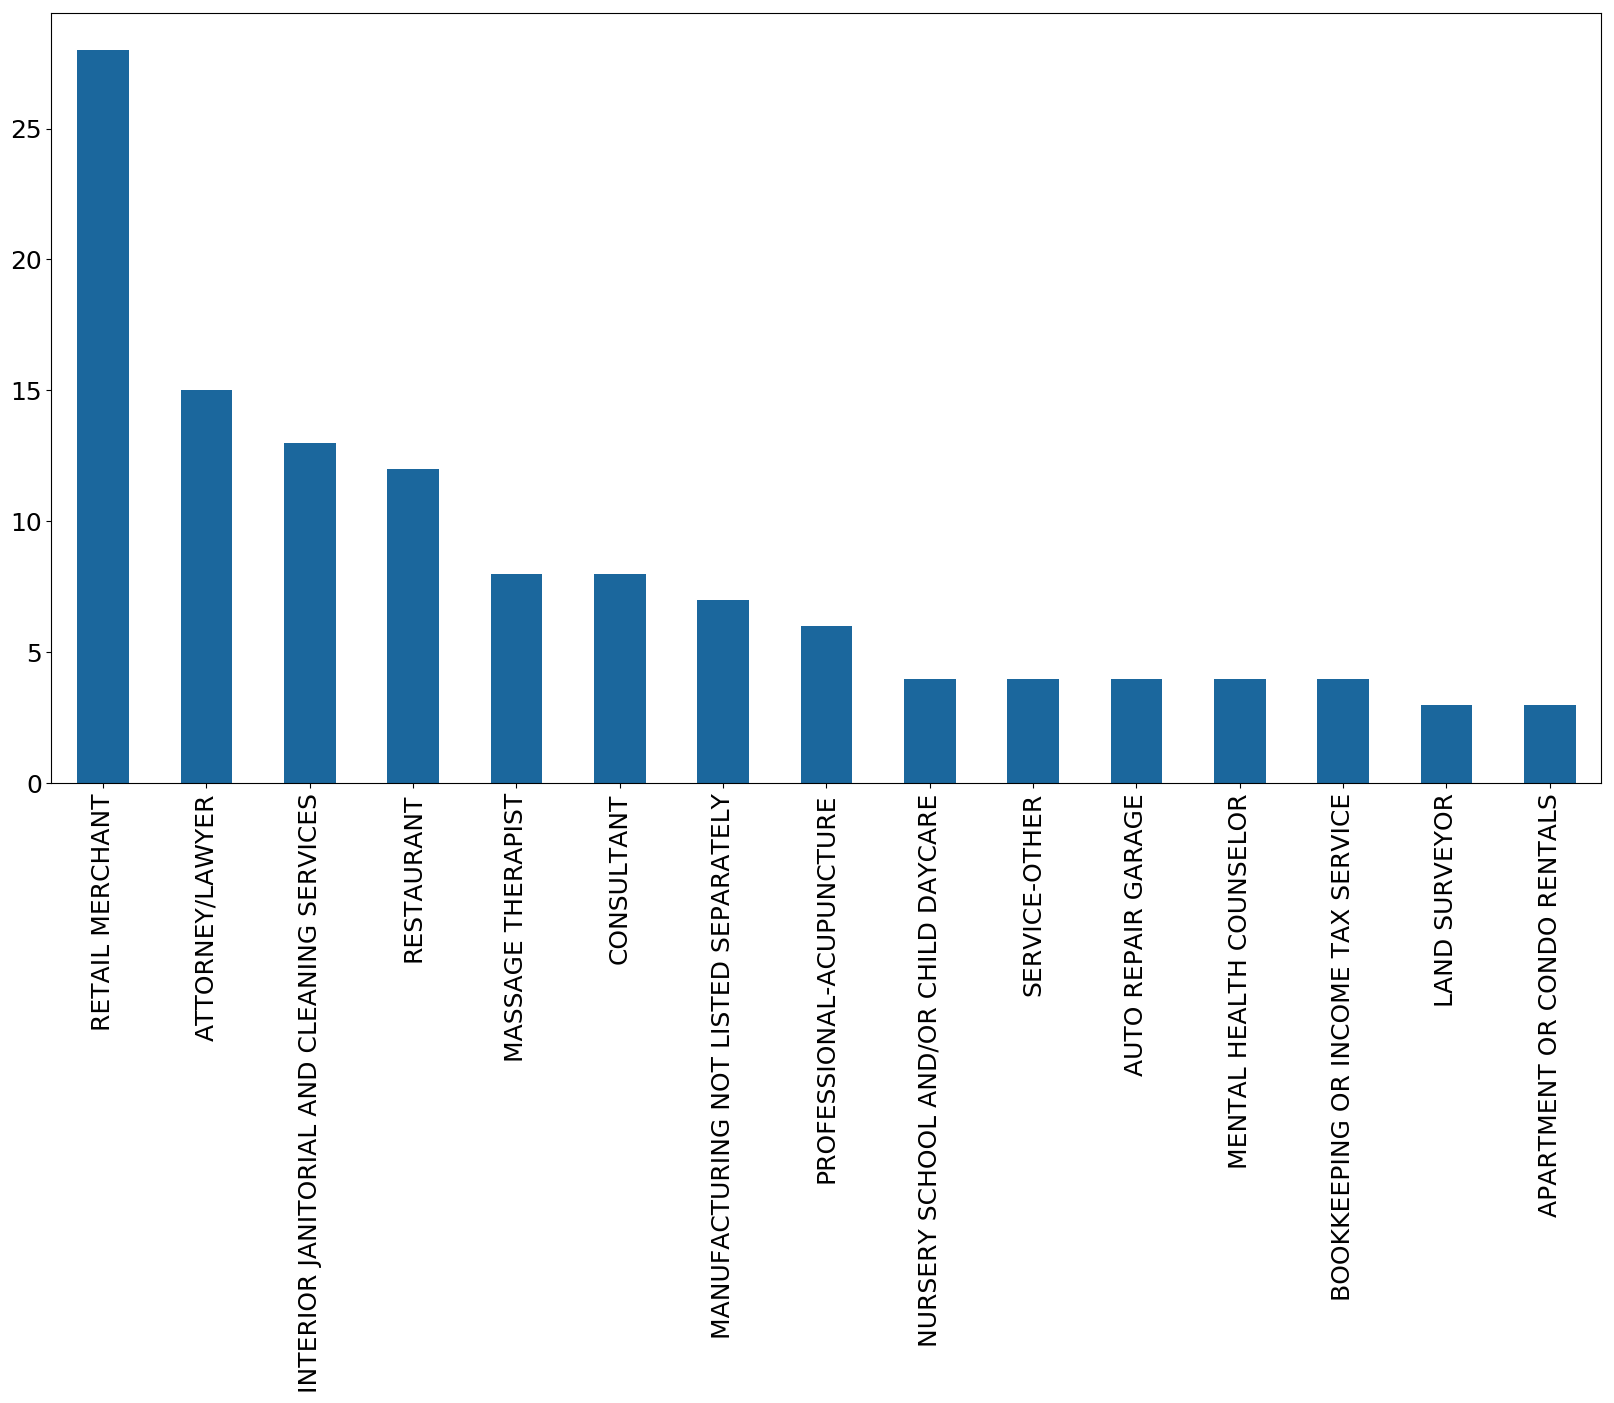

In [52]:
yes_counts_df = merged_df[merged_df['Q11'] == 1]['Business Type'].value_counts()
yes_counts_df[:15].plot(kind='bar',figsize=(20,10))

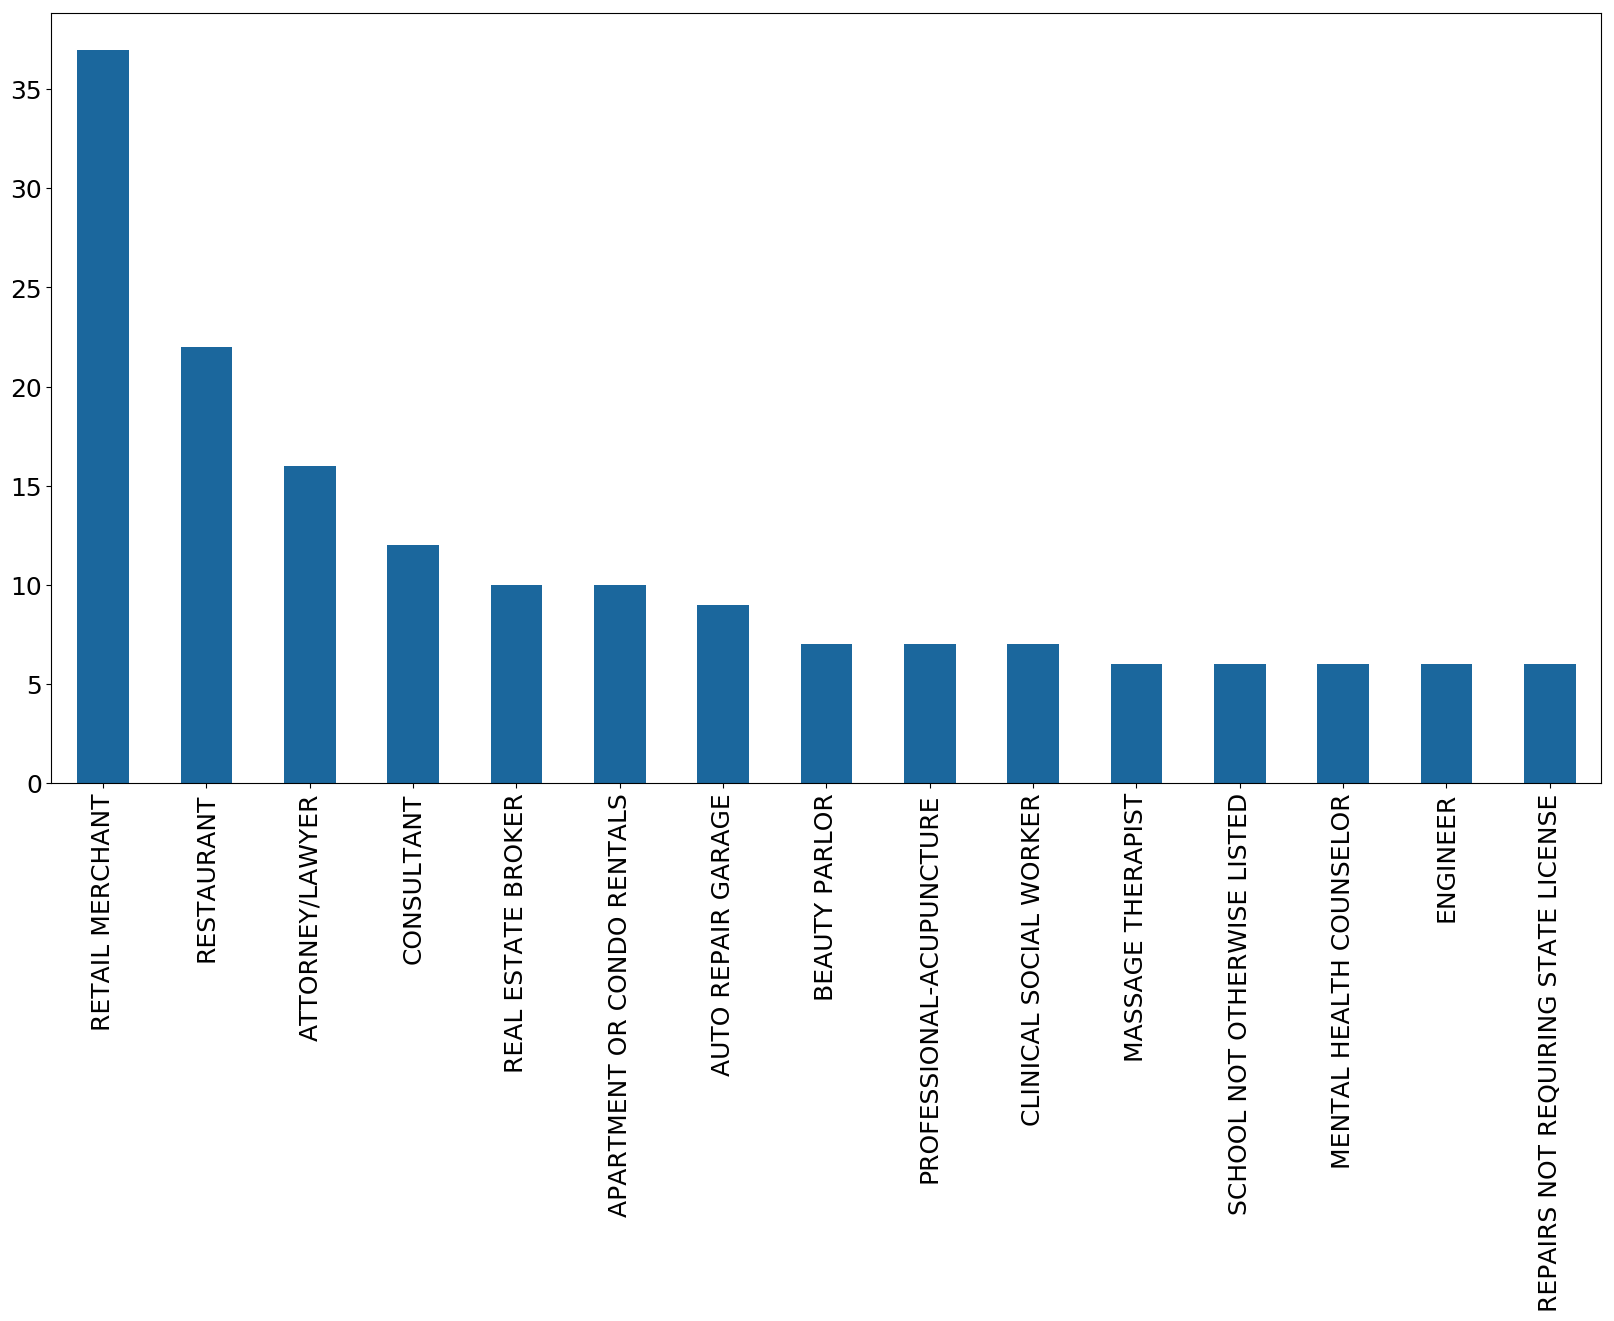

In [53]:
no_counts_df = merged_df[merged_df['Q11'] == 2]['Business Type'].value_counts()
no_counts_df[:15].plot(kind='bar',figsize=(20,10))

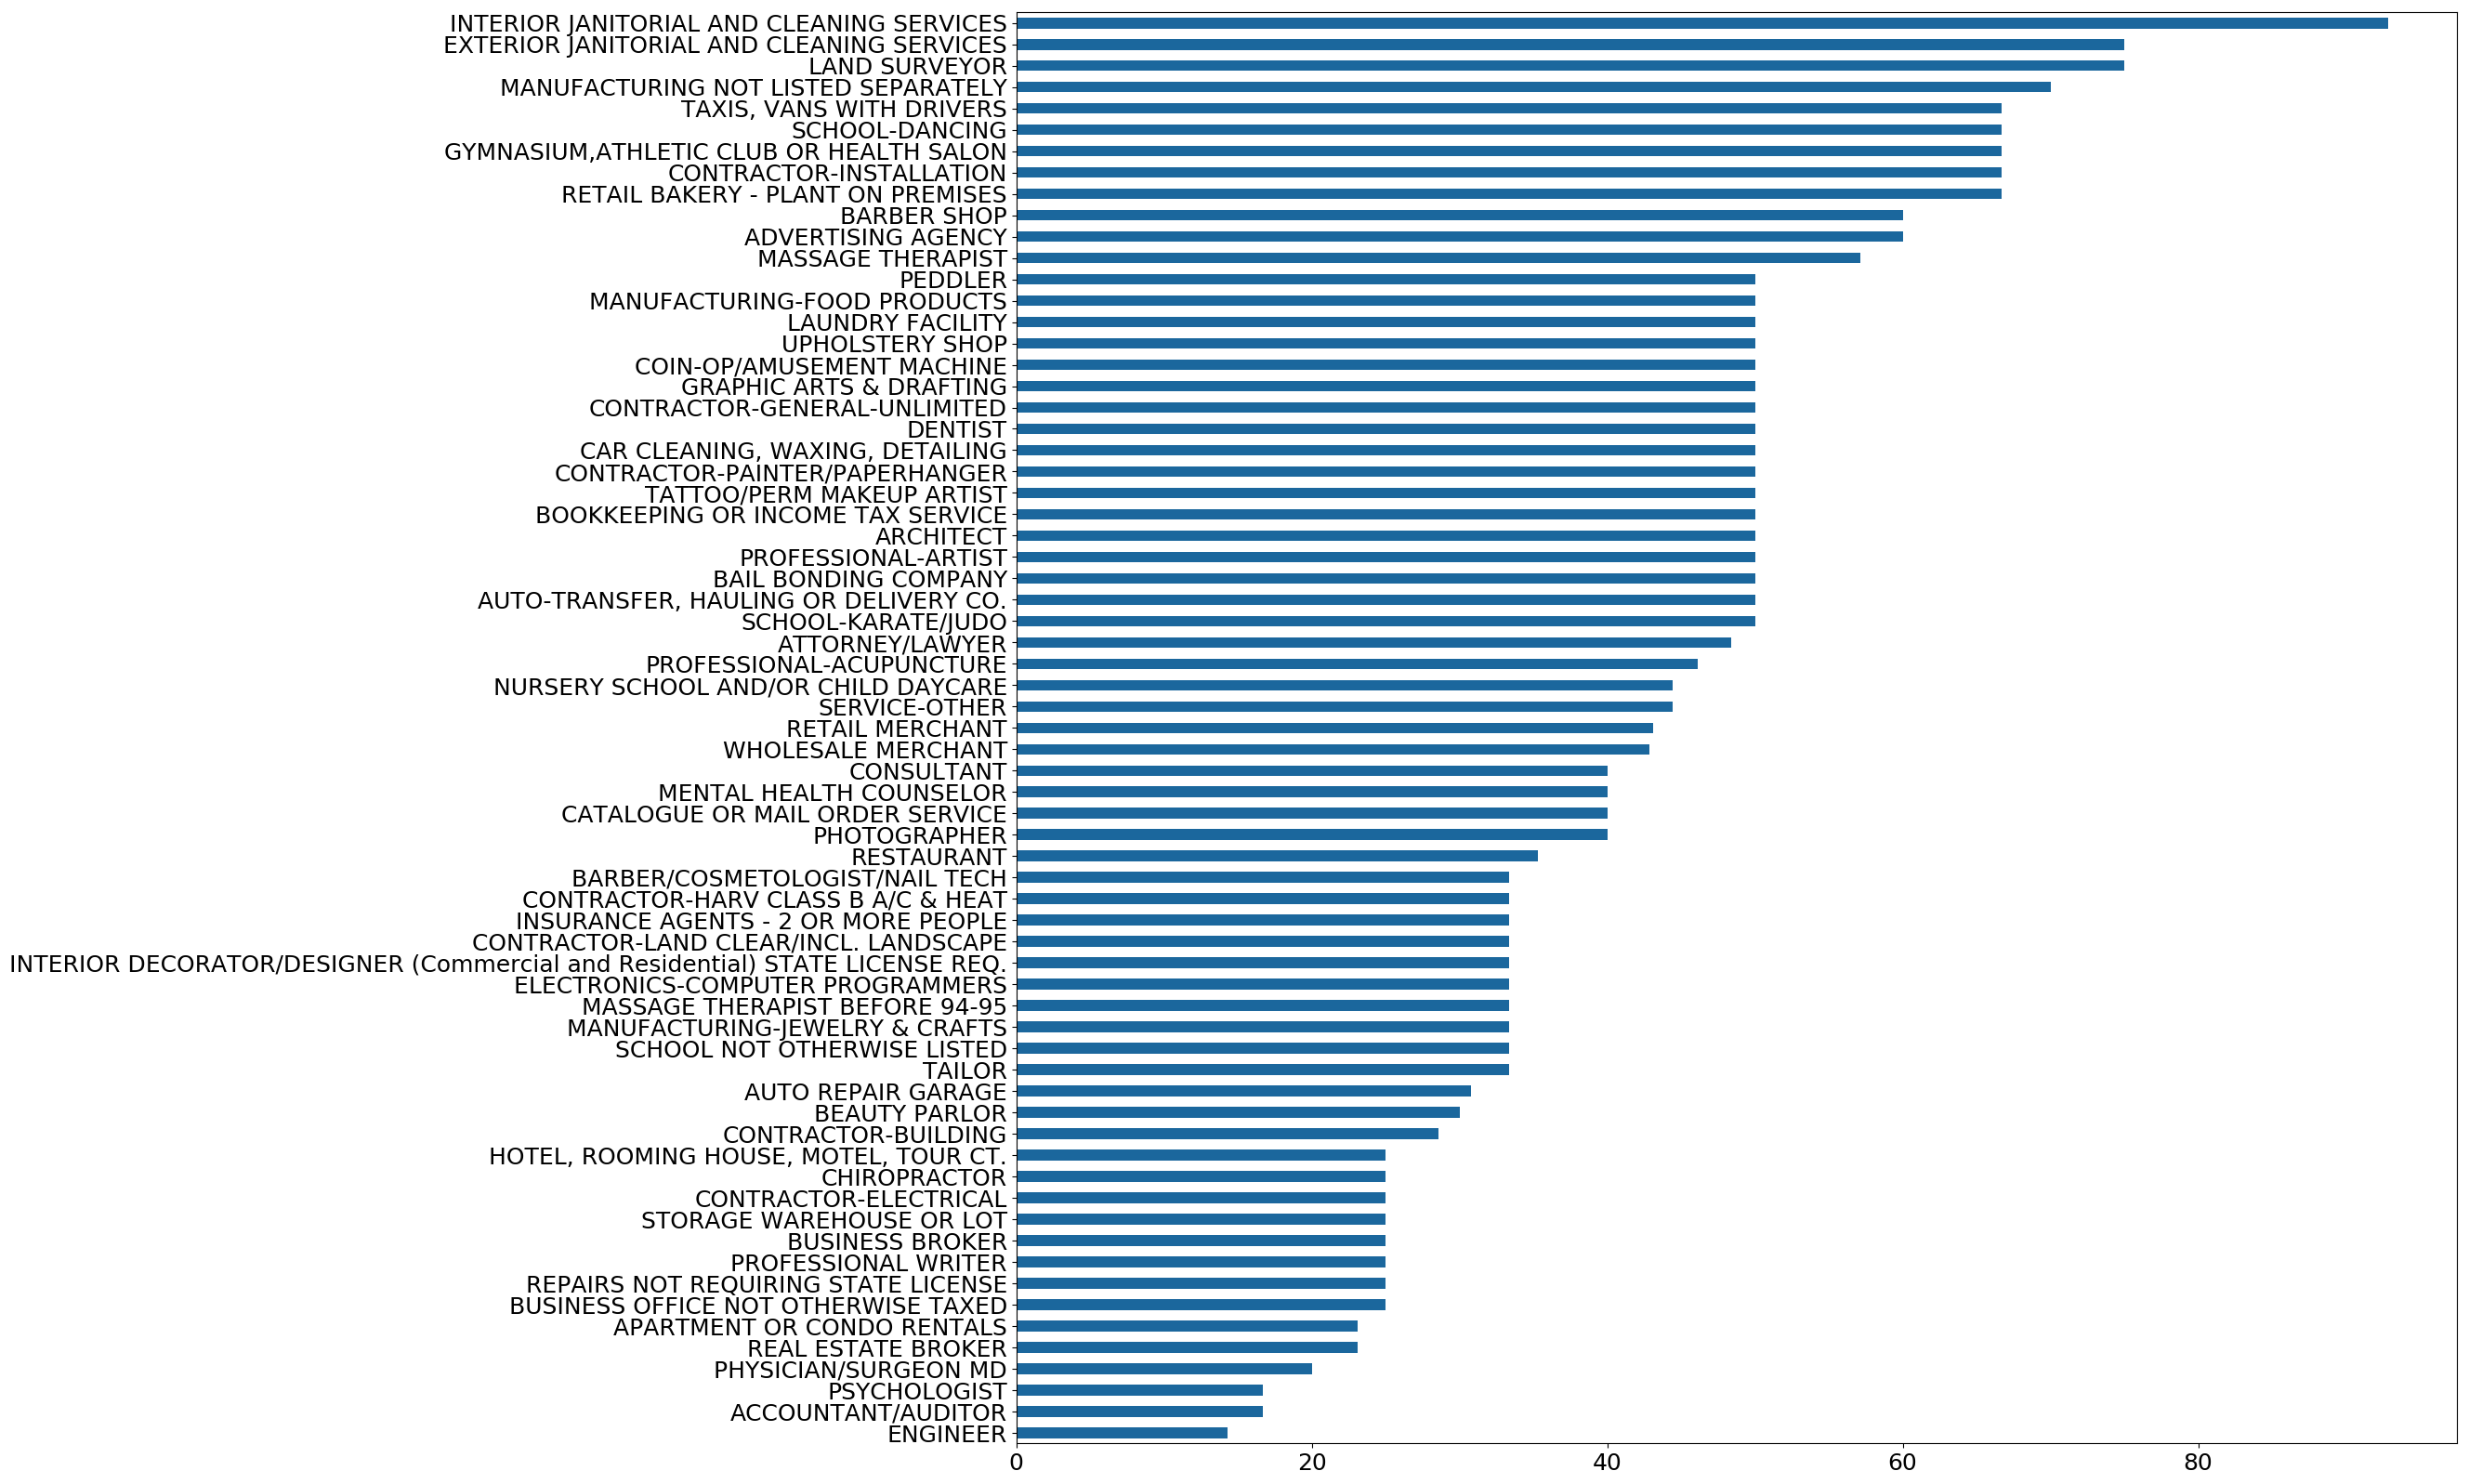

In [54]:
# TODO: this could be more useful if we filter out types with few responses

yes_rates_df = 100*yes_counts_df/(yes_counts_df + no_counts_df)
yes_rates_df.sort_values(inplace=True, ascending=True)
yes_rates_df[yes_rates_df > 0].plot(kind='barh',figsize=(20, 20))

** Stats w.r.t businesses that consider themselves to be successful **

In [55]:
temp_series = (survey_df['Q11'][survey_df['Q43'] <= 2].value_counts(normalize=True)*100)
print("Yes : {0}% \n No : {1}%".format(temp_series[1], temp_series[2]))

Yes : 37.1369294606% 
 No : 62.8630705394%


In [56]:
print(survey_df['Q27_1'].value_counts())
print(survey_df['Q27_2'].value_counts())
print(survey_df['Q27_3'].value_counts())
print(survey_df['Q27_4'].value_counts())

1    22
Name: Q27_1, dtype: int64
1    13
Name: Q27_2, dtype: int64
1    16
Name: Q27_3, dtype: int64
1    6
Name: Q27_4, dtype: int64


** Q12    - During the finance phase, money is obtained by pooling savings or gifts, or obtaining loans or venture capital. Would you like the City of Gainesville to provide services during the finance phase?  **

In [57]:
num_res_df.loc['Q12']

Number of responses    597
Name: Q12, dtype: int64

In [58]:
q12 = survey_df['Q12'].value_counts(normalize = True)

In [59]:
q12_choices = ['Yes', 'No']
for i in range(1,3): 
    print "{:5s} ----- {:4f} %".format(q12_choices[i-1] ,q12.loc[i]*100)

Yes   ----- 44.556114 %
No    ----- 55.443886 %


In [60]:
merged_df.groupby('Q12').agg({'weight': 'sum'}).sort_index()#/merged_df['weight'][~merged_df['Q12'].isnull()].sum()*100

weight
Q12            
1    220.172389
2    254.588852

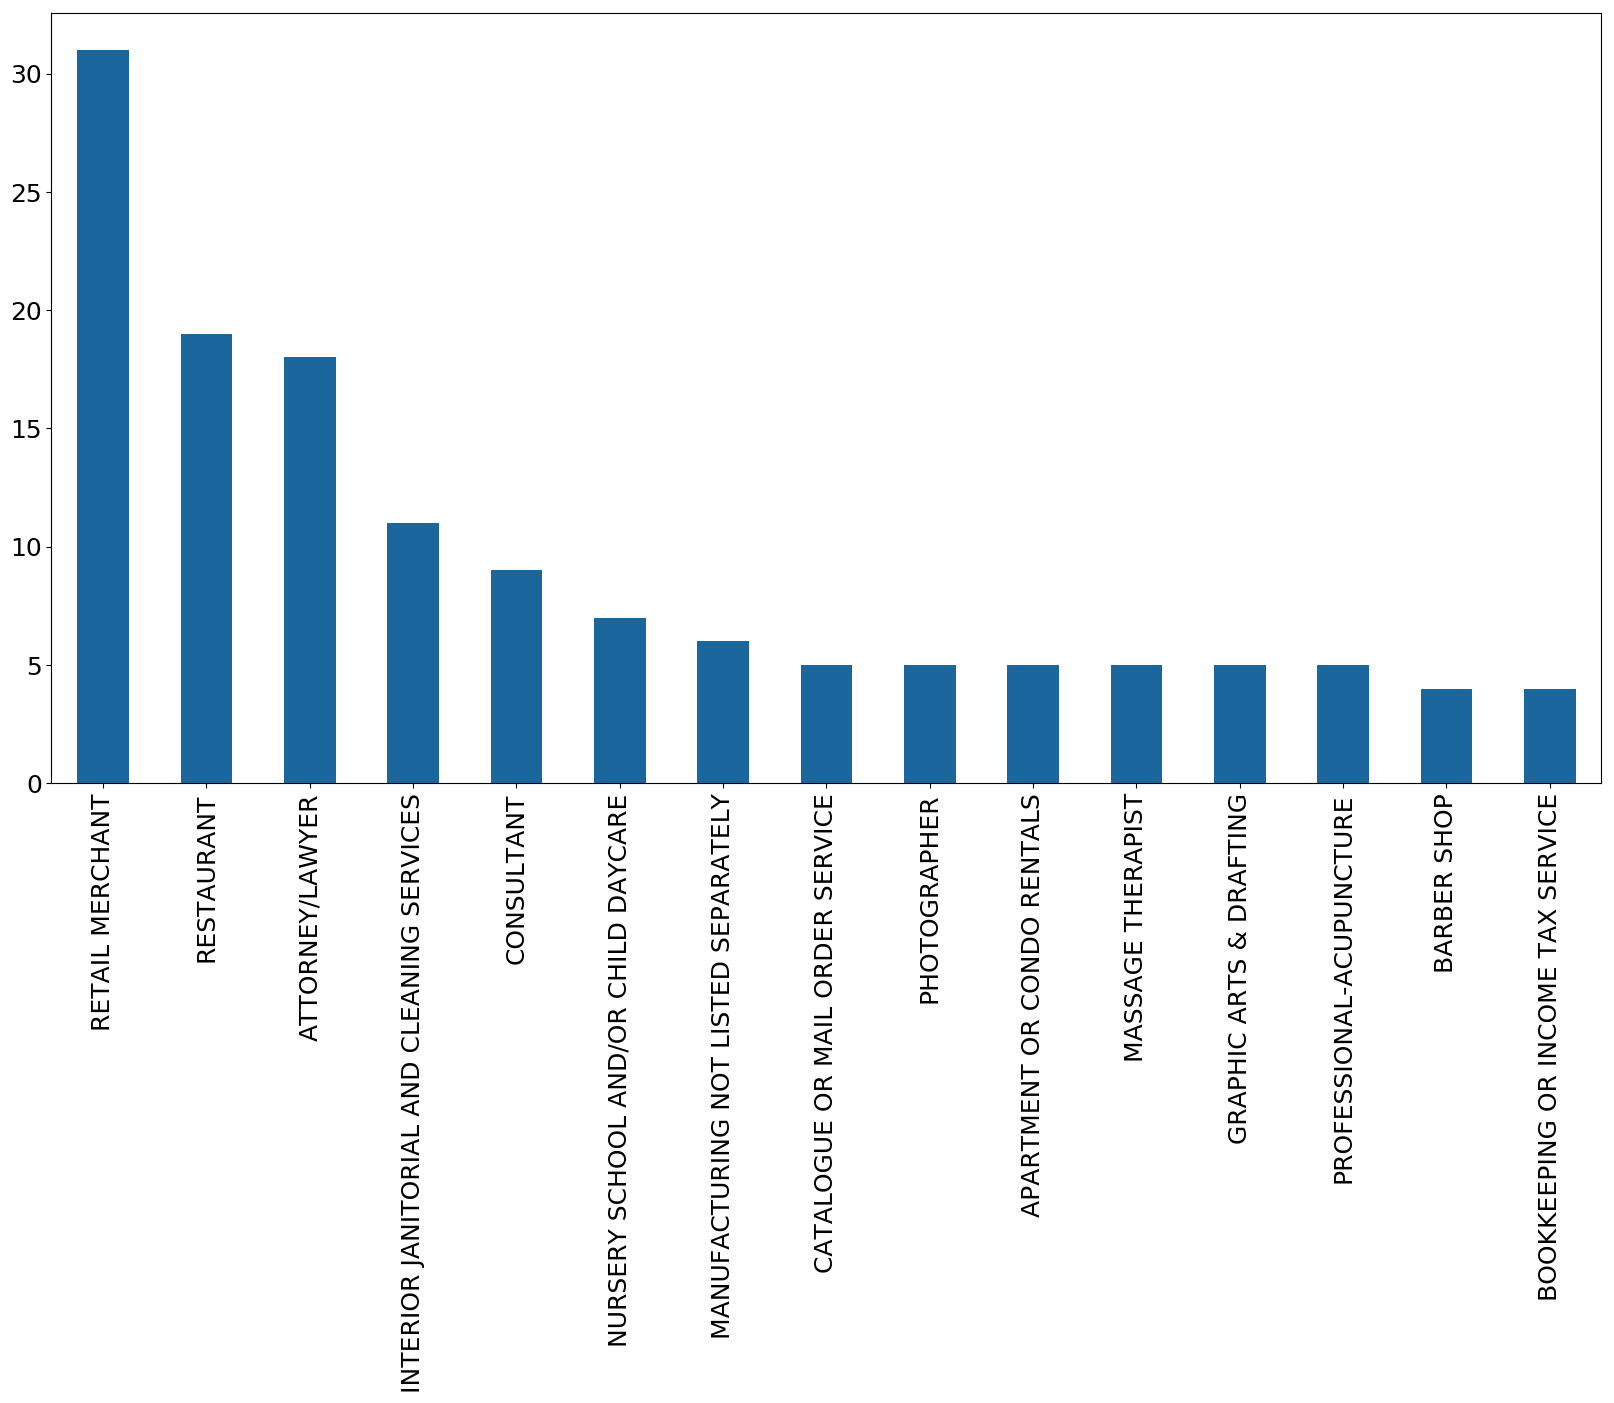

In [61]:
merged_df[merged_df['Q12'] == 1]['Business Type'].value_counts()[:15].plot(kind='bar',figsize=(20,10))

** Stats w.r.t businesses that consider themselves to be successful **

In [62]:
temp_series = (survey_df['Q12'][survey_df['Q43'] <= 2].value_counts(normalize=True)*100)
print("Yes : {0}% \n No : {1}%".format(temp_series[1], temp_series[2]))

Yes : 43.0641821946% 
 No : 56.9358178054%


** Q13    - During the legalize phase, the business undertakes activities such as incorporating or establishing the business as a sole proprietorship. Would you like the City of Gainesville to provide services during the legalize phase?**

In [63]:
num_res_df.loc['Q13']

Number of responses    593
Name: Q13, dtype: int64

In [64]:
q13 = survey_df['Q13'].value_counts(normalize = True)

In [65]:
q13_choices = ['Yes', 'No']
for i in range(1,3): 
    print "{:5s} ----- {:4f} %".format(q13_choices[i-1] ,q13.loc[i]*100)

Yes   ----- 47.048904 %
No    ----- 52.951096 %


** Stats w.r.t businesses that consider themselves to be successful **

In [66]:
temp_series = (survey_df['Q13'][survey_df['Q43'] <= 2].value_counts(normalize=True)*100)
print("Yes : {0}% \n No : {1}%".format(temp_series[1], temp_series[2]))

Yes : 46.5838509317% 
 No : 53.4161490683%


In [67]:
merged_df.groupby('Q13').agg({'weight': 'sum'}).sort_index()/merged_df['weight'][~merged_df['Q13'].isnull()].sum()*100

weight
Q13           
1    47.859114
2    52.140886

** Q14    - During the brand phase, the business develops and implements a marketing plan. Would you like the City of Gainesville to provide services during the brand phase? **

In [68]:
num_res_df.loc['Q14']

Number of responses    584
Name: Q14, dtype: int64

In [69]:
q14 = survey_df['Q14'].value_counts(normalize = True)

In [70]:
q14_choices = ['Yes', 'No']
for i in range(1,3): 
    print "{:5s} ----- {:4f} %".format(q14_choices[i-1] ,q14.loc[i]*100)

Yes   ----- 38.184932 %
No    ----- 61.815068 %


In [71]:
survey_df['Q43'][survey_df['Q14'] == 1].value_counts()

2    102
1     71
3     16
4      6
Name: Q43, dtype: int64

In [72]:
merged_df.groupby('Q14').agg({'weight': 'sum'}).sort_index()#/merged_df['weight'][~merged_df['Q14'].isnull()].sum()*100

weight
Q14            
1    175.292274
2    289.110674

** Stats w.r.t businesses that consider themselves to be successful **

In [73]:
temp_series = (survey_df['Q14'][survey_df['Q43'] <= 2].value_counts(normalize=True)*100)
print("Yes : {0}% \n No : {1}%".format(temp_series[1], temp_series[2]))

Yes : 36.0416666667% 
 No : 63.9583333333%


** Q15    - During the search phase, the business looks for a physical location for the business. Would you like the City of Gainesville to provide services during the search phase?  **

In [74]:
num_res_df.loc['Q15']

Number of responses    578
Name: Q15, dtype: int64

In [75]:
q15 = survey_df['Q15'].value_counts(normalize = True)

In [76]:
q15_choices = ['Yes', 'No']
for i in range(1,3): 
    print "{:5s} ----- {:4f} %".format(q15_choices[i-1] ,q15.loc[i]*100)

Yes   ----- 43.079585 %
No    ----- 56.920415 %


In [77]:
merged_df.groupby('Q15').agg({'weight': 'sum'}).sort_index()/merged_df['weight'][~merged_df['Q15'].isnull()].sum()*100

weight
Q15           
1    44.422441
2    55.577559

** Stats w.r.t businesses that consider themselves to be successful **

In [78]:
temp_series = (survey_df['Q15'][survey_df['Q43'] <= 2].value_counts(normalize=True)*100)
print("Yes : {0}% \n No : {1}%".format(temp_series[1], temp_series[2]))

Yes : 42.2360248447% 
 No : 57.7639751553%


** Q16    - During the shape phase, the business undertakes activities such as drawing up development/building plans. Would you like the City of Gainesville to provide services during the shape phase?   **

In [79]:
num_res_df.loc['Q16']

Number of responses    569
Name: Q16, dtype: int64

In [80]:
q16 = survey_df['Q16'].value_counts(normalize = True)

In [81]:
q16_choices = ['Yes', 'No']
for i in range(1,3): 
    print "{:5s} ----- {:4f} %".format(q16_choices[i-1] ,q16.loc[i]*100)

Yes   ----- 41.300527 %
No    ----- 58.699473 %


In [82]:
merged_df.groupby('Q16').agg({'weight': 'sum'}).sort_index()#/merged_df['weight'][~merged_df['Q16'].isnull()].sum()*100

weight
Q16            
1    195.149037
2    260.135111

** Stats w.r.t businesses that consider themselves to be successful **

In [83]:
temp_series = (survey_df['Q16'][survey_df['Q43'] <= 2].value_counts(normalize=True)*100)
print("Yes : {0}% \n No : {1}%".format(temp_series[1], temp_series[2]))

Yes : 39.4190871369% 
 No : 60.5809128631%


** Q17    - During the build phase, the physical location is built. Would you like the City of Gainesville to provide services during the build phase?   **

In [84]:
num_res_df.loc['Q17']

Number of responses    560
Name: Q17, dtype: int64

In [85]:
q17 = survey_df['Q17'].value_counts(normalize = True)

In [86]:
q17_choices = ['Yes', 'No']
for i in range(1,3): 
    print "{:5s} ----- {:4f} %".format(q17_choices[i-1] ,q17.loc[i]*100)

Yes   ----- 45.178571 %
No    ----- 54.821429 %


In [87]:
merged_df.groupby('Q17').agg({'weight': 'sum'}).sort_index()#/merged_df['weight'][~merged_df['Q17'].isnull()].sum()*100

weight
Q17            
1    207.308942
2    237.981445

** Stats w.r.t businesses that consider themselves to be successful **

In [88]:
temp_series = (survey_df['Q17'][survey_df['Q43'] <= 2].value_counts(normalize=True)*100)
print("Yes : {0}% \n No : {1}%".format(temp_series[1], temp_series[2]))

Yes : 43.8413361169% 
 No : 56.1586638831%


** Q18  - The hire phase involves activities such as advertising for employees and hiring them. Would you like the City of Gainesville to provide services during the hire phase?   **

In [89]:
num_res_df.loc['Q18']

Number of responses    561
Name: Q18, dtype: int64

In [90]:
q18 = survey_df['Q18'].value_counts(normalize = True)

In [91]:
q18_choices = ['Yes', 'No']
for i in range(1,3): 
    print "{:5s} ----- {:4f} %".format(q18_choices[i-1] ,q18.loc[i]*100)

Yes   ----- 31.016043 %
No    ----- 68.983957 %


In [92]:
merged_df.groupby('Q18').agg({'weight': 'sum'}).sort_index()/merged_df['weight'][~merged_df['Q18'].isnull()].sum()*100

weight
Q18           
1    32.513987
2    67.486013

** Stats w.r.t businesses that consider themselves to be successful **

In [93]:
temp_series = (survey_df['Q17'][survey_df['Q43'] <= 2].value_counts(normalize=True)*100)
print("Yes : {0}% \n No : {1}%".format(temp_series[1], temp_series[2]))

Yes : 43.8413361169% 
 No : 56.1586638831%


** Q19 - During the taxes phase, the business puts bookkeeping procedures in place, hires an accountant, etc. Would you like the City of Gainesville to provide services during the taxes phase?  **

In [94]:
num_res_df.loc['Q19']

Number of responses    559
Name: Q19, dtype: int64

In [95]:
q19 = survey_df['Q19'].value_counts(normalize = True)

In [96]:
q19_choices = ['Yes', 'No']
for i in range(1,3): 
    print "{:5s} ----- {:4f} %".format(q19_choices[i-1] ,q19.loc[i]*100)

Yes   ----- 32.200358 %
No    ----- 67.799642 %


In [97]:
merged_df.groupby('Q19').agg({'weight': 'sum'}).sort_index()#/merged_df['weight'][~merged_df['Q19'].isnull()].sum()*100

weight
Q19            
1    147.723609
2    296.405970

** Stats w.r.t businesses that consider themselves to be successful **

In [98]:
temp_series = (survey_df['Q17'][survey_df['Q43'] <= 2].value_counts(normalize=True)*100)
print("Yes : {0}% \n No : {1}%".format(temp_series[1], temp_series[2]))

Yes : 43.8413361169% 
 No : 56.1586638831%


** Q20 - The celebrate phase gives the business the opportunity to provide accolades to everyone that helped start the business. Would you like the City of Gainesville to provide services during the celebrate phase?  **

In [99]:
num_res_df.loc['Q20']

Number of responses    555
Name: Q20, dtype: int64

In [100]:
q20 = survey_df['Q20'].value_counts(normalize = True)

In [101]:
q20_choices = ['Yes', 'No']
for i in range(1,3): 
    print "{:5s} ----- {:4f} %".format(q20_choices[i-1] ,q20.loc[i]*100)

Yes   ----- 40.720721 %
No    ----- 59.279279 %


In [102]:
merged_df.groupby('Q20').agg({'weight': 'sum'}).sort_index()/merged_df['weight'][~merged_df['Q20'].isnull()].sum()*100

weight
Q20           
1    41.609762
2    58.390238

** Q21 - During the open phase, the business has a grand opening, starts selling goods or services, etc. Would you like the City of Gainesville to provide services during the open phase?  **

In [103]:
num_res_df.loc['Q21']

Number of responses    552
Name: Q21, dtype: int64

In [104]:
q21 = survey_df['Q21'].value_counts(normalize = True)

In [105]:
q21_choices = ['Yes', 'No']
for i in range(1,3): 
    print "{:5s} ----- {:4f} %".format(q21_choices[i-1] ,q21.loc[i]*100)

Yes   ----- 42.210145 %
No    ----- 57.789855 %


In [106]:
merged_df.groupby('Q21').agg({'weight': 'sum'}).sort_index()#/merged_df['weight'][~merged_df['Q21'].isnull()].sum()*100

weight
Q21            
1    191.334979
2    247.953180

** Q22 - The grow phase starts the process of brainstorming again and moving forward with increasing the size of the business. Would you like the City of Gainesville to provide services during the grow phase?  **

In [107]:
num_res_df.loc['Q22']

Number of responses    541
Name: Q22, dtype: int64

In [108]:
q22 = survey_df['Q22'].value_counts(normalize = True)

In [109]:
q22_choices = ['Yes', 'No']
for i in range(1,3): 
    print "{:5s} ----- {:4f} %".format(q22_choices[i-1] ,q22.loc[i]*100)

Yes   ----- 40.665434 %
No    ----- 59.334566 %


In [110]:
merged_df.groupby('Q22').agg({'weight': 'sum'}).sort_index()/merged_df['weight'][~merged_df['Q22'].isnull()].sum()*100

weight
Q22           
1    41.629881
2    58.370119

** Frequency distribution for Q11 - Q22 **

In [111]:
temp = survey_df['Q11'].apply(lambda x: 0 if x == 2 else x)

In [112]:
for i in range(12,23):
#     global temp
    temp += survey_df['Q' + str(i)].apply(lambda x: 0 if x == 2 else x)

In [113]:
temp = temp.dropna().apply(lambda x: int(x))

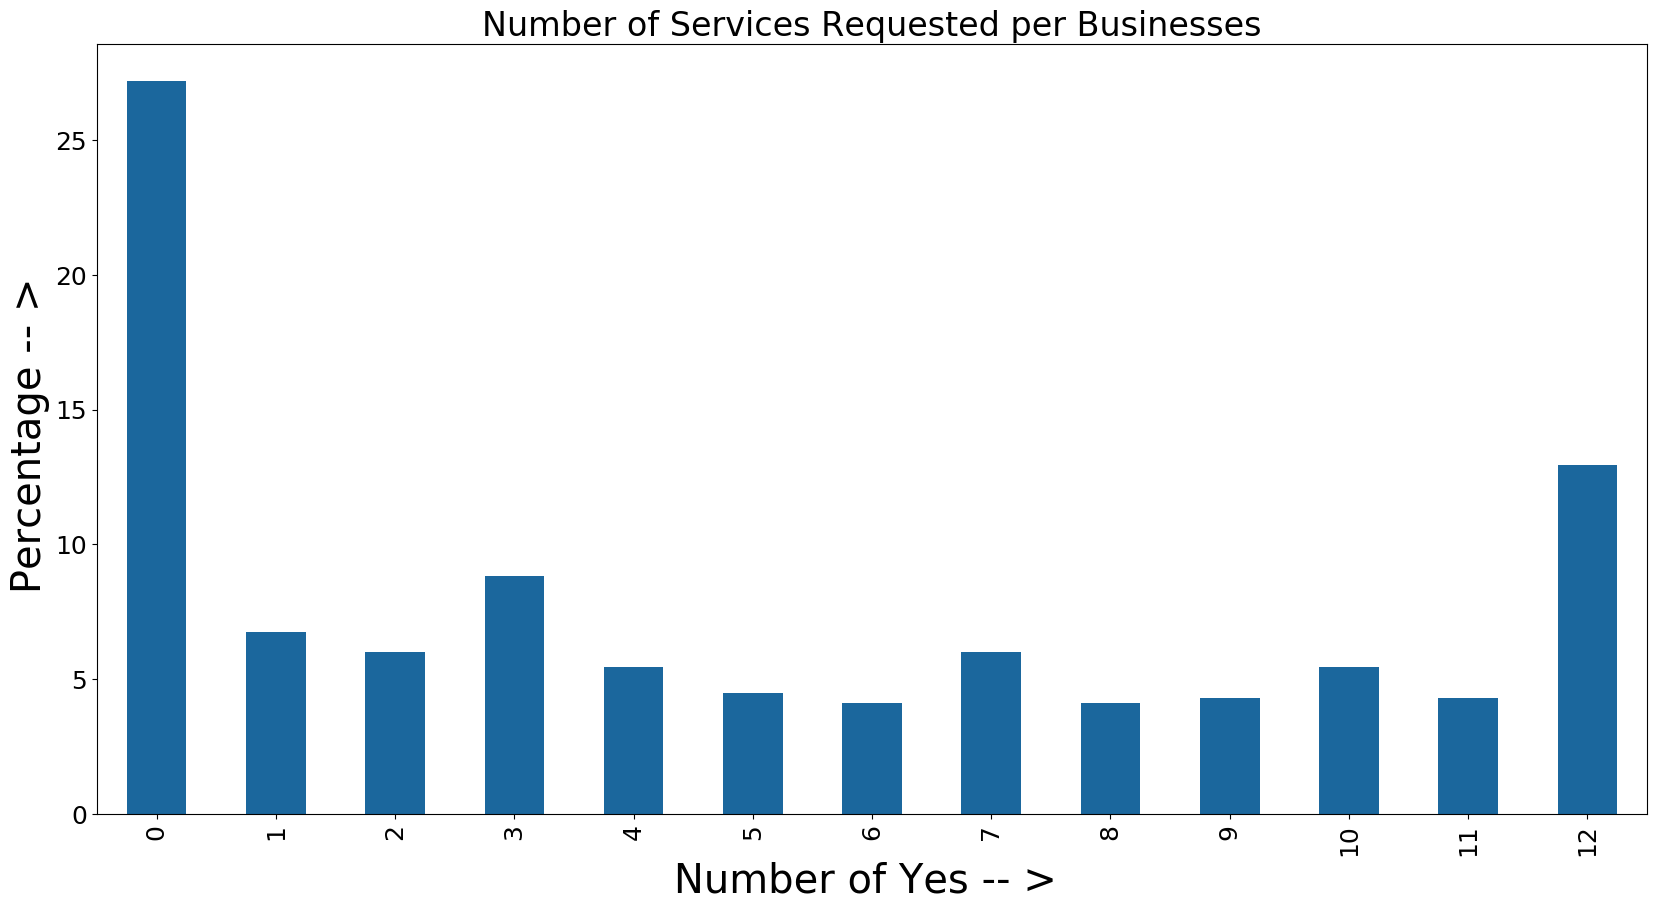

In [114]:
ax = (temp.value_counts(normalize=True).sort_index()*100).plot(kind='bar', title='Number of Services Requested per Businesses')
ax.set_xlabel('Number of Yes -- > ', size='x-large')
ax.set_ylabel('Percentage -- > ', size='x-large')

In [115]:
temp.value_counts(normalize=True).sort_index()*100

0     27.204503
1      6.754221
2      6.003752
3      8.818011
4      5.440901
5      4.502814
6      4.127580
7      6.003752
8      4.127580
9      4.315197
10     5.440901
11     4.315197
12    12.945591
Name: Q11, dtype: float64

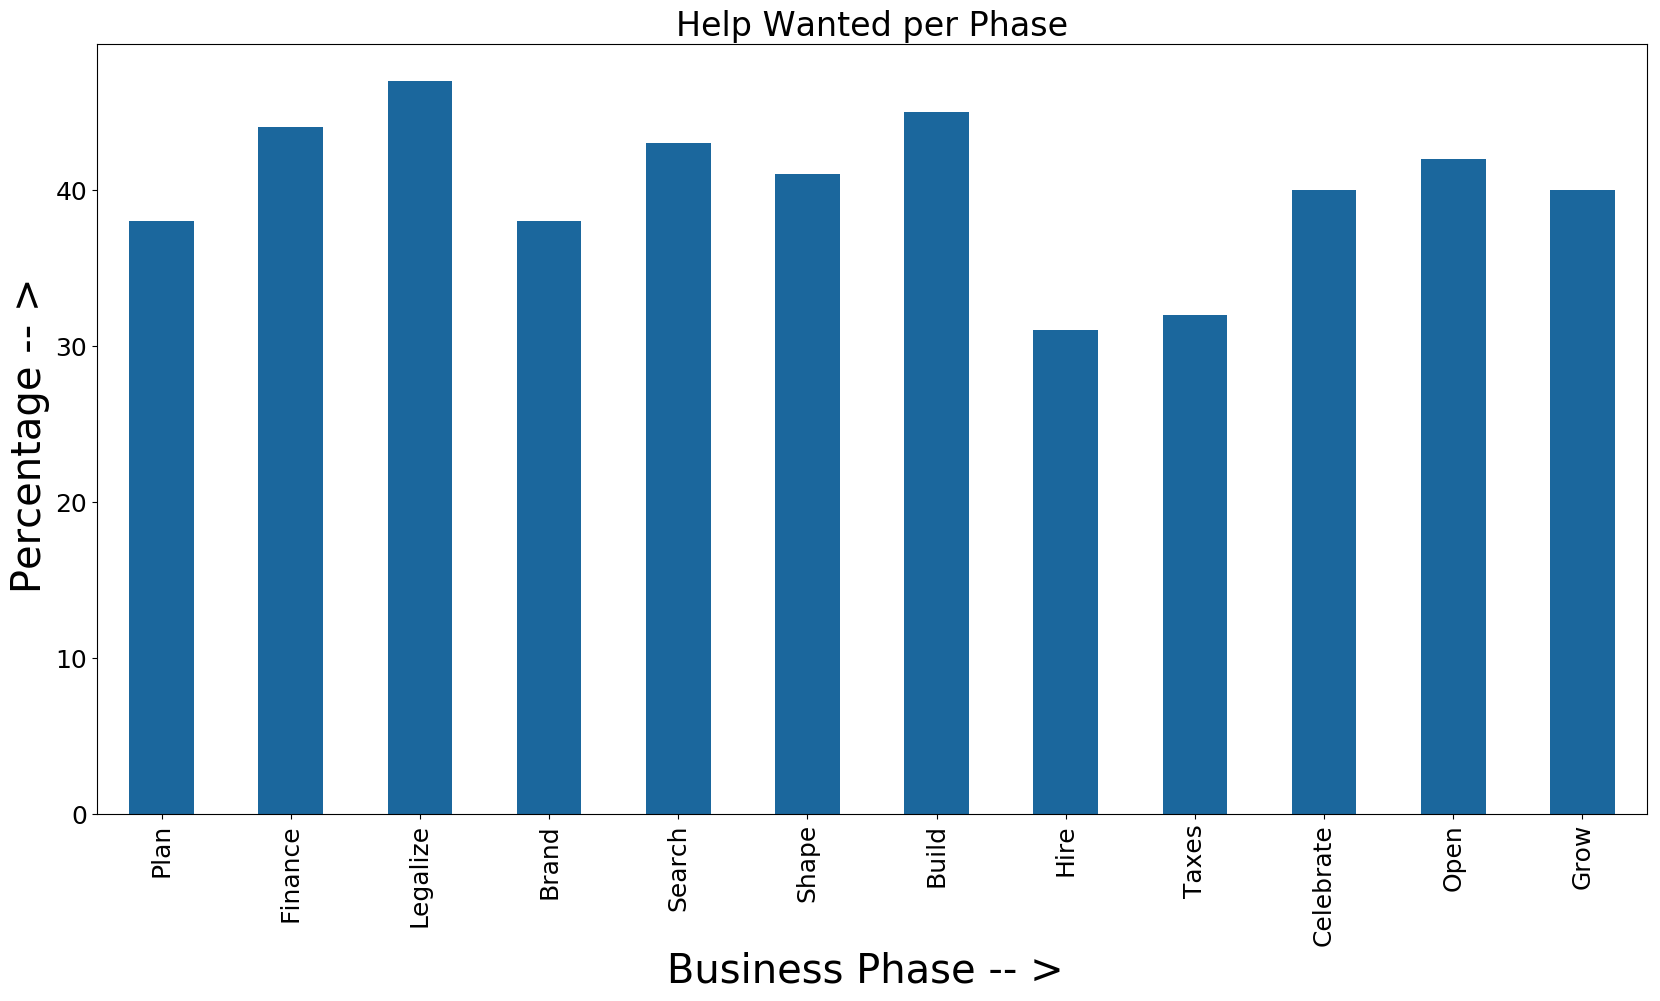

In [116]:
phase_votes_df = pd.DataFrame()
phase_votes_df['Plan'] = q11
phase_votes_df['Finance'] = q12
phase_votes_df['Legalize'] = q13
phase_votes_df['Brand'] = q14
phase_votes_df['Search'] = q15
phase_votes_df['Shape'] = q16
phase_votes_df['Build'] = q17
phase_votes_df['Hire'] = q18
phase_votes_df['Taxes'] = q19
phase_votes_df['Celebrate'] = q20
phase_votes_df['Open'] = q21
phase_votes_df['Grow'] = q22

# phase_votes_df.apply(lambda x: str(int(x*100)) + '%' if type(x) == float else x)

phase_votes_df.drop(labels=[2], inplace=True)
phase_votes_df = phase_votes_df.transpose()
phase_votes_df[1] = phase_votes_df[1].apply(lambda x: int(x*100))

ax = phase_votes_df.plot(kind='bar', legend=False, title='Help Wanted per Phase')#, figsize=(20,10))
ax.set_xlabel('Business Phase -- > ', size='x-large')
ax.set_ylabel('Percentage -- > ', size='x-large')

** Q24 - The next series of questions is about your interaction with the City of Gainesville. Often times, when establishing a business location, a search is done. In the last 12 months, did you conduct a search for this location? **

In [117]:
merged_df.groupby('Q24').agg({'weight' : 'sum'})/merged_df['weight'][~merged_df['Q24'].isnull()].sum()*100

weight
Q24           
1    14.096376
2    85.903624

** Q25 - While you were searching for this location, what City of Gainesville departments did you interact with about this search? **

In [118]:
count_arr = []
for i in range(1,8):
    column = 'Q25_' + str(i)
    print("Choice {0}: {1}".format(i,merged_df[column].value_counts()[1]))
    count_arr.append(merged_df[column].value_counts()[1])

Choice 1: 18
Choice 2: 7
Choice 3: 24
Choice 4: 16
Choice 5: 4
Choice 6: 4
Choice 7: 33


In [119]:
# Find totla number of peoplw who actually responded
q25_choices_number = ['weight']
for i in range(1,8):
    q25_choices_number.append('Q25_' + str(i))
temp_df = merged_df[q25_choices_number].dropna(subset=q25_choices_number[1:], how='all')
print("Number of people who responded: {0}".format(temp_df.shape[0]))
print("Weighted number of people who responded: {0}".format(temp_df['weight'].sum()))

Number of people who responded: 70
Weighted number of people who responded: 58.7859603563


In [120]:
get_percentages(count_arr, temp_df.shape[0])

25.71%
10.0%
34.29%
22.86%
5.71%
5.71%
47.14%


In [121]:
weighted_count_arr = []
for option_no, col in enumerate(q25_choices_number):
    if col != 'weight':
        aggr_data = temp_df.groupby(col).agg({'weight' : 'sum'})
        print("Choice {0}: {1}".format(option_no, aggr_data['weight'][1]))
        weighted_count_arr.append(aggr_data['weight'][1])

Choice 1: 14.180663223
Choice 2: 6.16576280944
Choice 3: 18.0057231292
Choice 4: 11.6161473026
Choice 5: 2.8904166157
Choice 6: 2.56529233169
Choice 7: 31.3539019547


In [122]:
get_percentages(weighted_count_arr, temp_df['weight'].sum())

24.12%
10.49%
30.63%
19.76%
4.92%
4.36%
53.34%


** Q26 - In the last 12 months, did you draw up development/building plans for this location? **

In [123]:
weighted_df = merged_df.groupby('Q26').agg({'weight' : 'sum'})
weighted_df

weight
Q26            
1     32.418150
2    393.493084

In [124]:
weighted_df/merged_df['weight'][~merged_df['Q26'].isnull()].sum()*100

weight
Q26          
1     7.61148
2    92.38852

** Q27 - While you were drawing up development/building plans for this location, what City of Gainesville departments did you interact with about the development/building plans?(Only asked to people who said yes to previous question) **

In [125]:
count_arr = []
for i in range(1,8):
    column = 'Q27_' + str(i)
    print("Choice {0}: {1}".format(i,merged_df[column].value_counts()[1]))
    count_arr.append(merged_df[column].value_counts()[1])

Choice 1: 22
Choice 2: 13
Choice 3: 16
Choice 4: 6
Choice 5: 4
Choice 6: 1
Choice 7: 6


In [126]:
get_percentages(count_arr,32)

68.75%
40.63%
50.0%
18.75%
12.5%
3.13%
18.75%


In [127]:
# Find total number of people who actually responded
q27_choices_number = ['weight']
for i in range(1,8):
    q27_choices_number.append('Q27_' + str(i))
temp_df = merged_df[q27_choices_number].dropna(subset=q27_choices_number[1:], how='all')
print("Number of people who responded: {0}".format(temp_df.shape[0]))
print("Weighted number of people who responded: {0}".format(temp_df['weight'].sum()))

Number of people who responded: 32
Weighted number of people who responded: 30.2559748643


In [128]:
weighted_count_arr = []
for option_no, col in enumerate(q27_choices_number):
    if col != 'weight':
        aggr_data = temp_df.groupby(col).agg({'weight' : 'sum'})
        print("Choice {0}: {1}".format(option_no, aggr_data['weight'][1]))
        weighted_count_arr.append(aggr_data['weight'][1])

Choice 1: 19.5953756702
Choice 2: 11.9377708284
Choice 3: 13.5060165541
Choice 4: 3.93166527493
Choice 5: 1.90208536262
Choice 6: 1.02836307122
Choice 7: 7.9251534246


In [129]:
get_percentages(weighted_count_arr, temp_df['weight'].sum())

64.77%
39.46%
44.64%
12.99%
6.29%
3.4%
26.19%


** Q28 - In the last 12 months, did you build this location? **

In [130]:
weighted_df = merged_df.groupby('Q28').agg({'weight' : 'sum'})
weighted_df

weight
Q28            
1     22.485076
2    400.520656

In [131]:
weighted_df/merged_df['weight'][~merged_df['Q28'].isnull()].sum()*100

weight
Q28           
1     5.315549
2    94.684451

** Q29 - While you were building this location, what City of Gainesville departments did you interact with about building this location?(Only asked to people who said yes to previous question)
 **

In [132]:
count_arr = []
for i in range(1,8):
    column = 'Q29_' + str(i)
    print("Choice {0}: {1}".format(i,0 if merged_df[column].value_counts().empty else merged_df[column].value_counts()[1]))
    count_arr.append(0 if merged_df[column].value_counts().empty else merged_df[column].value_counts()[1])

Choice 1: 16
Choice 2: 12
Choice 3: 16
Choice 4: 7
Choice 5: 4
Choice 6: 0
Choice 7: 4


In [133]:
# Find totla number of peoplw who actually responded
q29_choices_number = ['weight']
for i in range(1,8):
    q29_choices_number.append('Q29_' + str(i))
temp_df = merged_df[q29_choices_number].dropna(subset=q29_choices_number[1:], how='all')
print("Number of people who responded: {0}".format(temp_df.shape[0]))
print("Weighted number of people who responded: {0}".format(temp_df['weight'].sum()))

Number of people who responded: 23
Weighted number of people who responded: 22.4850755879


In [134]:
get_percentages(count_arr, temp_df.shape[0])

69.57%
52.17%
69.57%
30.43%
17.39%
0.0%
17.39%


In [135]:
weighted_count_arr = []
for option_no, col in enumerate(q29_choices_number):
    if col != 'weight':
        aggr = temp_df.groupby(col).agg({'weight' : 'sum'})['weight']
        print("Choice {0}: {1}".format(option_no, 0 if aggr.empty else aggr[1]))
        weighted_count_arr.append(0 if aggr.empty else aggr[1])

Choice 1: 16.5233930447
Choice 2: 13.4581428788
Choice 3: 16.3020714272
Choice 4: 7.08602220232
Choice 5: 1.74317121594
Choice 6: 0
Choice 7: 3.66798577995


In [136]:
get_percentages(weighted_count_arr,temp_df['weight'].sum())

73.49%
59.85%
72.5%
31.51%
7.75%
0.0%
16.31%


** For questions 31 to 42 that have voting for different departments **

** Q31 - On a scale of 0 to 10 where 0 is the worst possible service, and 10 is the best possible service, please rate the quality of service you received from the Department of Doing (Planning and Building Construction). Move the slider below to record your answer. **

In [137]:
num_res_df.loc['Q31_10']

Number of responses    39
Name: Q31_10, dtype: int64

In [138]:
q31 = survey_df['Q31_10'].value_counts(normalize=True)

In [139]:
q31_choices = range(1,11)
print "{:12}  {:10} \n".format("Rating" ,"Percentage")
for i in range(10,0,-1): 
    try:
        print "{:6}  {:14f} %".format(q31_choices[i-1] ,q31.loc[i]*100)
    except:
        pass

Rating        Percentage 

    10       25.641026 %
     9       12.820513 %
     8       12.820513 %
     7       12.820513 %
     6        5.128205 %
     5        5.128205 %
     4        2.564103 %
     3       10.256410 %
     2        7.692308 %
     1        5.128205 %


In [140]:
# Weighted counts
weighted_q31 = merged_df.groupby('Q31_10').agg({'weight':'sum'})
weighted_q31

weight
Q31_10          
1       2.513155
2       3.431624
3       4.449963
4       1.592845
5       1.119076
6       4.028363
7       3.666191
8       3.255625
9       4.765020
10      7.894202

** Q32 Public works department **

In [141]:
# Weighted counts
weighted_q32 = merged_df.groupby('Q32_10').agg({'weight':'sum'})
weighted_q32

weight
Q32_10          
0       1.911414
2       1.081088
3       0.807041
5       6.308870
6       1.354147
7       1.526494
8       0.902612
9       1.718596
10      5.783708

** Q33 GRU **

In [142]:
# Weighted counts
weighted_q33 = merged_df.groupby('Q33_10').agg({'weight':'sum'})
weighted_q33

weight
Q33_10          
1       4.868181
2       0.318569
4       0.849517
5       5.896101
6       3.001351
7       8.570264
8       3.702251
9       3.929475
10      2.798145

** Q34 Budget and finance department **

In [143]:
survey_df['Q34_10'].value_counts()

9     6
7     4
5     4
10    3
8     3
3     1
2     1
0     1
Name: Q34_10, dtype: int64

In [144]:
# Weighted counts
weighted_q34 = merged_df.groupby('Q34_10').agg({'weight':'sum'})
weighted_q34

weight
Q34_10          
0       0.212379
2       0.807041
3       0.929160
5       2.566343
7       4.147702
8       1.735216
9       4.200860
10      2.541955

** Q35 Community redevelopment agency **

In [145]:
# Weighted counts
weighted_q35 = merged_df.groupby('Q35_10').agg({'weight':'sum'})
weighted_q35

weight
Q35_10          
4       0.273059
7       1.028363
8       0.551596
9       0.335559
10      1.240742

** Creates ranking dataframe **

In [146]:
dept_votes_arr=[]
for i in range(1,6):
    orderedDict = OrderedDict()
    demo = survey_df['Q3' + str(i) + '_10'].value_counts()
    orderedDict['0-3'] = demo[demo.index <= 3].sum()
    orderedDict['4-6'] = demo[(demo.index > 3) & (demo.index <= 6)].sum()
    orderedDict['7-10'] = demo[(demo.index > 6) & (demo.index <= 10)].sum()
    
    demo = survey_df['Q3' + str(i) + '_10']
    orderedDict['Average'] = float(demo.sum())/float(demo.count())

    dept_votes_arr.append(orderedDict)

In [147]:
dept_votes_arr

[OrderedDict([('0-3', 9L),
              ('4-6', 5L),
              ('7-10', 25L),
              ('Average', 6.82051282051282)]),
 OrderedDict([('0-3', 3L), ('4-6', 6L), ('7-10', 12L), ('Average', 7.0)]),
 OrderedDict([('0-3', 5L),
              ('4-6', 13L),
              ('7-10', 21L),
              ('Average', 6.358974358974359)]),
 OrderedDict([('0-3', 3L), ('4-6', 4L), ('7-10', 16L), ('Average', 7.0)]),
 OrderedDict([('0-3', 0), ('4-6', 1L), ('7-10', 6L), ('Average', 8.0)])]

In [148]:
dept_names = [
    'Department of Doing',
    'Public Works Department',
    'GRU',
    'Budget and Finance Department',
    'Community Redevelopment Agency'
]

ranking_df = pd.DataFrame(dept_votes_arr, index=dept_names)

In [149]:
ranking_df

0-3  4-6  7-10   Average
Department of Doing               9    5    25  6.820513
Public Works Department           3    6    12  7.000000
GRU                               5   13    21  6.358974
Budget and Finance Department     3    4    16  7.000000
Community Redevelopment Agency    0    1     6  8.000000

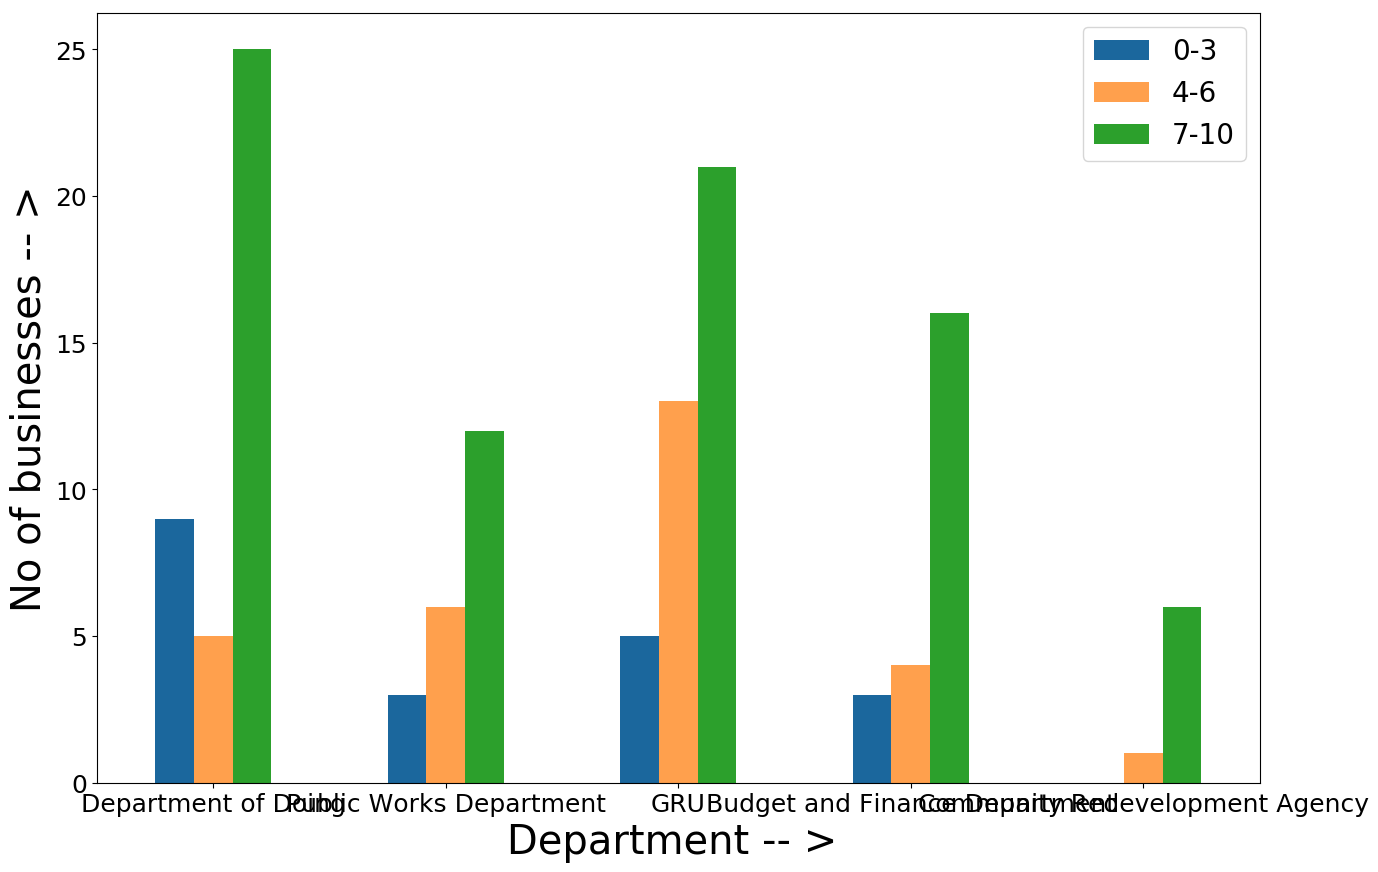

In [150]:
ax = ranking_df[['0-3', '4-6', '7-10']].plot(kind='bar', rot=0, figsize=(15,10))
ax.set_xlabel('Department -- > ', size='x-large')
ax.set_ylabel('No of businesses -- >', size='x-large')

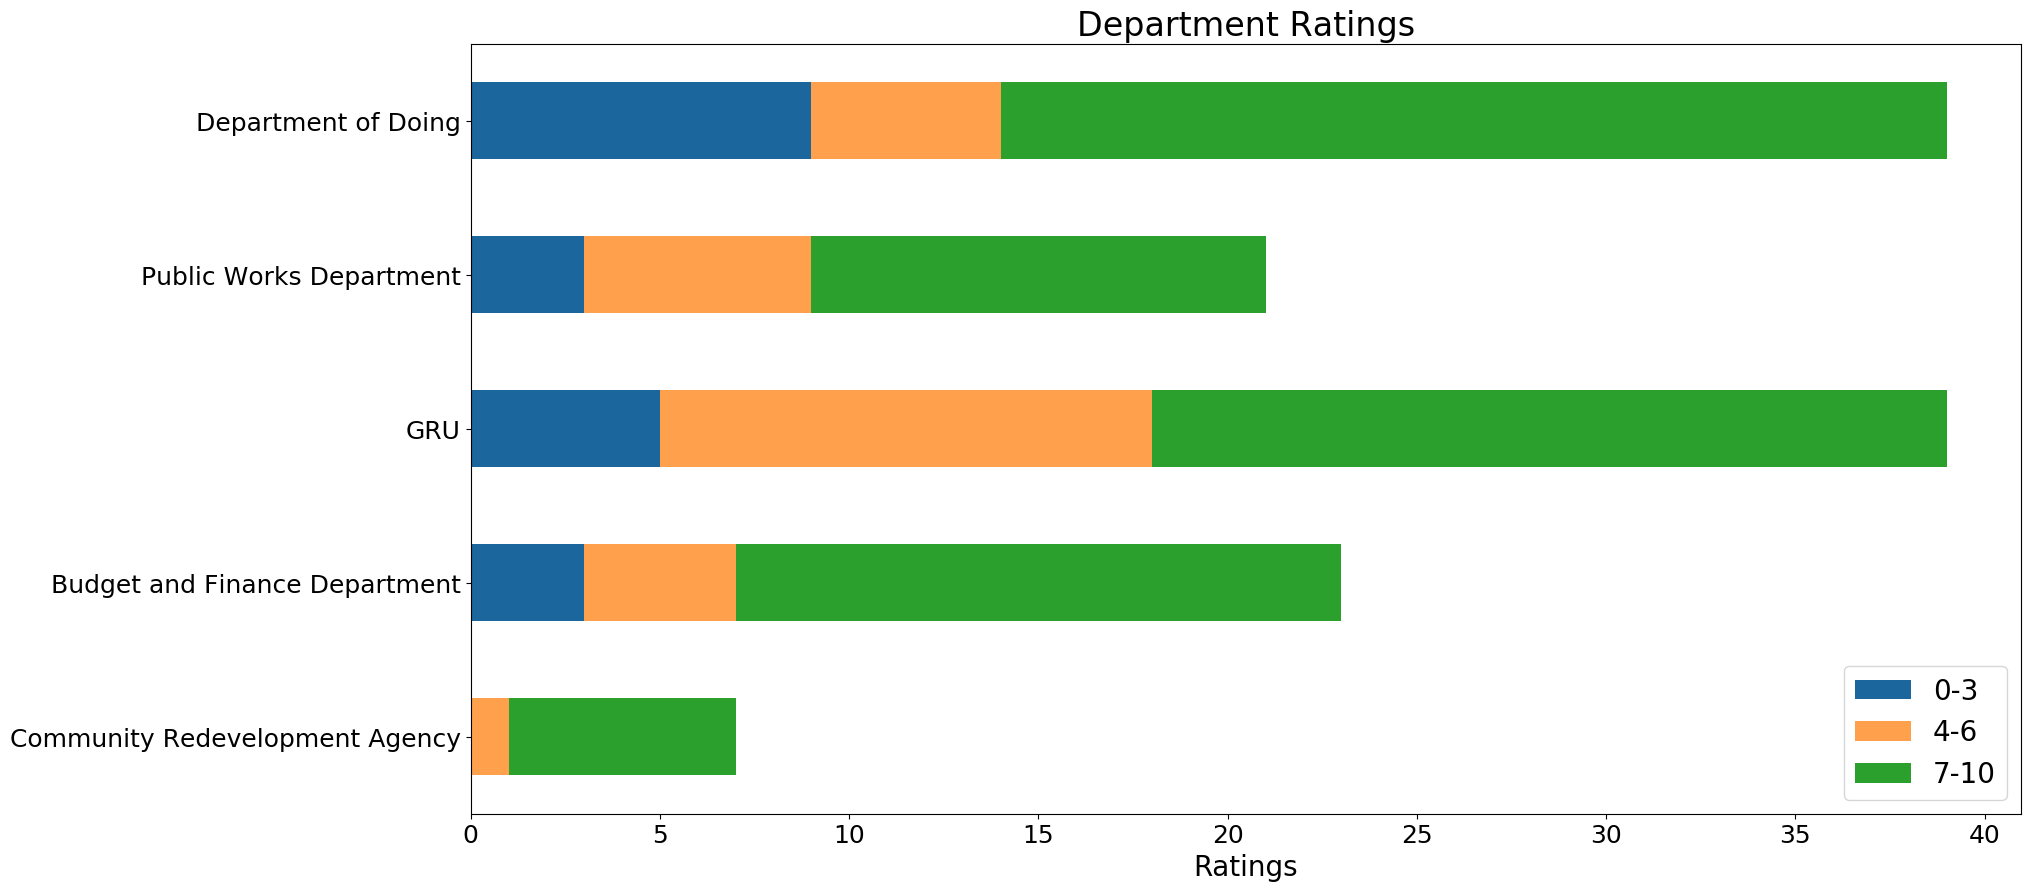

In [151]:
ax = ranking_df[['0-3', '4-6', '7-10']].plot(kind='barh', title='Department Ratings', stacked=True)
ax.set_xlabel('Ratings')
ax.invert_yaxis()

In [152]:
ranking_df

0-3  4-6  7-10   Average
Department of Doing               9    5    25  6.820513
Public Works Department           3    6    12  7.000000
GRU                               5   13    21  6.358974
Budget and Finance Department     3    4    16  7.000000
Community Redevelopment Agency    0    1     6  8.000000

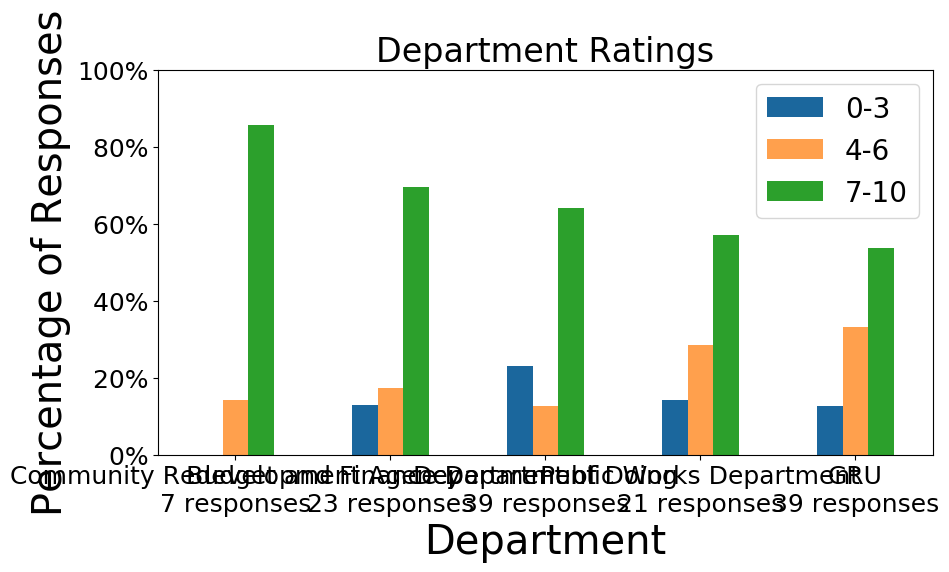

In [259]:
# Let's normalize these results!
ranking_norm_df = pd.DataFrame(ranking_df[['0-3', '4-6', '7-10']].apply(lambda x: x/sum(x), axis=1))
# ranking_norm_df = ranking_norm_df.applymap(lambda x: int(100*x))
ranking_norm_df.sort_values(by='7-10', inplace=True, ascending=False)

# Include average?
# ranking_norm_df.insert(column='Average', loc=3, value=ranking_df['Average']*10)
# ranking_norm_df.sort_values(by='Average', inplace=True, ascending=False)

# Plot
ax = ranking_norm_df.plot(kind='bar', title='Department Ratings', ylim=[0,1], rot=0, figsize=(10, 5))
ax.set_xlabel('Department', size='x-large')
ax.set_ylabel('Percentage of Responses', size='x-large')

# Include number of responses below department names
x_ticks = ax.get_xticklabels()
for x in x_ticks:
    dept_name = x.get_text()
    row = ranking_df.loc[dept_name]
    total_responses = int(row[0:3].sum())
    x.set_text(x.get_text() + '\n' + str(total_responses) + ' responses')
ax.set_xticklabels(x_ticks)

# Put y axis in percentages
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])

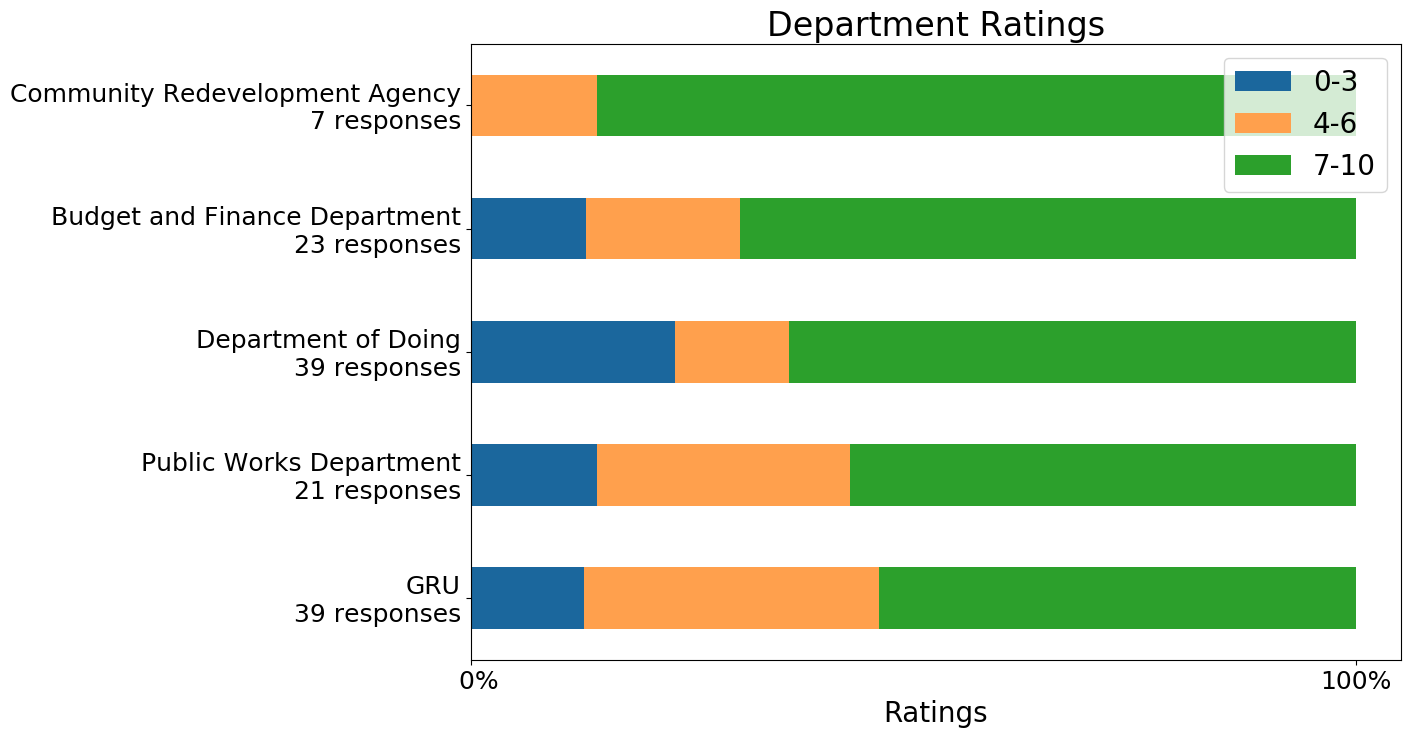

In [264]:
plt.figure()
fig, ax = plt.subplots(1, 1)
ranking_norm_df.plot(ax=ax, figsize=(12, 8), kind='barh', title='Department Ratings', stacked=True)

# Format x axis
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
vals = ax.get_xticks()
ax.set_xticklabels(['{:3.0f}%'.format(x*100) for x in vals]);
ax.set_xlabel('Ratings')

# Format y axis
ax.set_yticklabels(x_ticks)
ax.invert_yaxis()

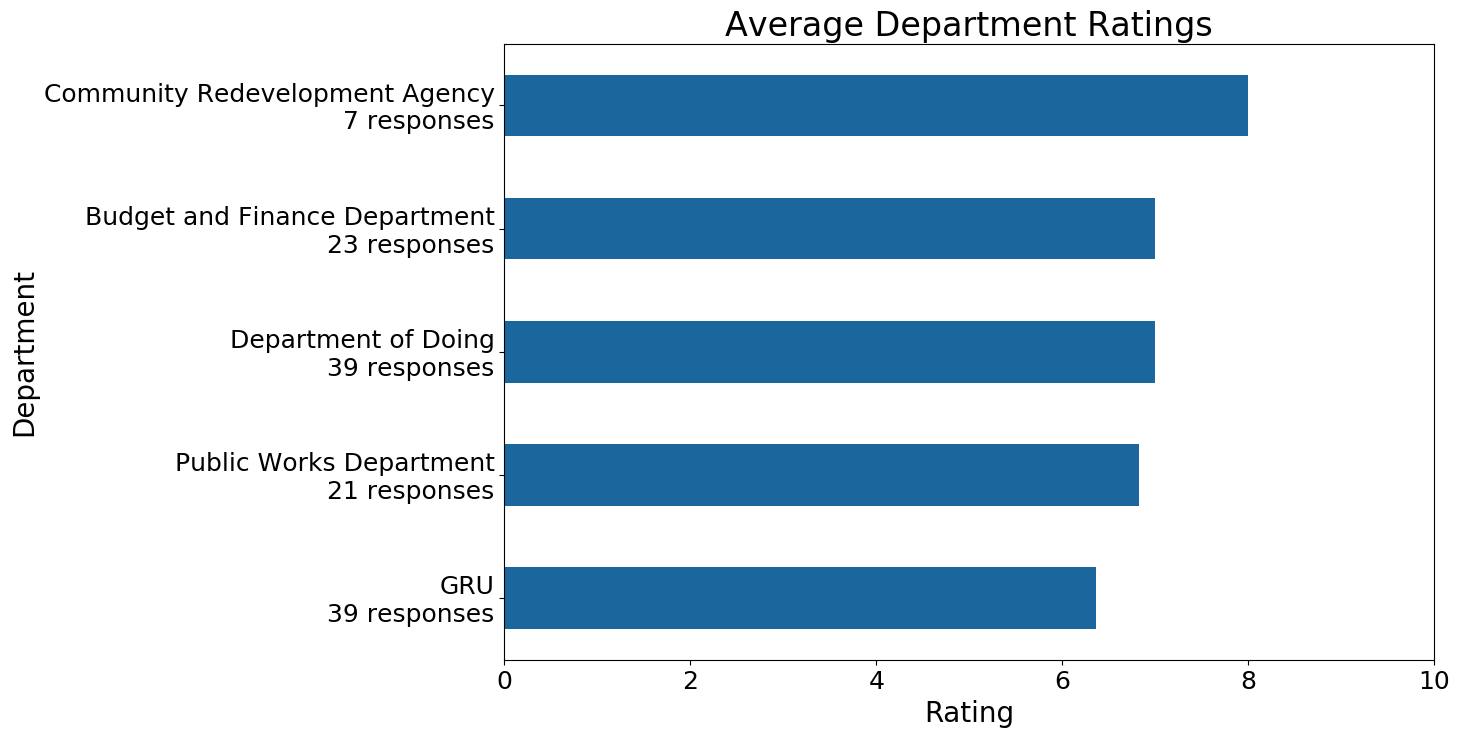

In [265]:
# Uncolored
ax = ranking_df['Average'].sort_values(ascending=False).plot(kind='barh', figsize=(12, 8), title='Average Department Ratings', xlim=[0,10])
ax.set_xlabel('Rating')
ax.set_ylabel('Department')
ax.set_yticklabels(x_ticks)
ax.invert_yaxis()

In [156]:
ranking_norm_df

0-3       4-6      7-10
Community Redevelopment Agency  0.000000  0.142857  0.857143
Budget and Finance Department   0.130435  0.173913  0.695652
Department of Doing             0.230769  0.128205  0.641026
Public Works Department         0.142857  0.285714  0.571429
GRU                             0.128205  0.333333  0.538462

** Without bracketing **

In [157]:
possible_values = [x for x in range(1, 11)]

raw_dept_counts_df = pd.DataFrame(columns=dept_names, index=possible_values)
for i in range(0, 5):
    raw_dept_counts_df[dept_names[i]] = survey_df['Q3' + str(i + 1) + '_10'].value_counts()

raw_dept_counts_df = raw_dept_counts_df.transpose().fillna(0)
raw_dept_counts_df

1    2    3    4    5    6    7    8    9   \
Department of Doing             2.0  3.0  4.0  1.0  2.0  2.0  5.0  5.0  5.0   
Public Works Department         0.0  1.0  1.0  0.0  4.0  2.0  2.0  1.0  2.0   
GRU                             4.0  1.0  0.0  1.0  8.0  4.0  7.0  5.0  5.0   
Budget and Finance Department   0.0  1.0  1.0  0.0  4.0  0.0  4.0  3.0  6.0   
Community Redevelopment Agency  0.0  0.0  0.0  1.0  0.0  0.0  1.0  2.0  1.0   

                                  10  
Department of Doing             10.0  
Public Works Department          7.0  
GRU                              4.0  
Budget and Finance Department    3.0  
Community Redevelopment Agency   2.0

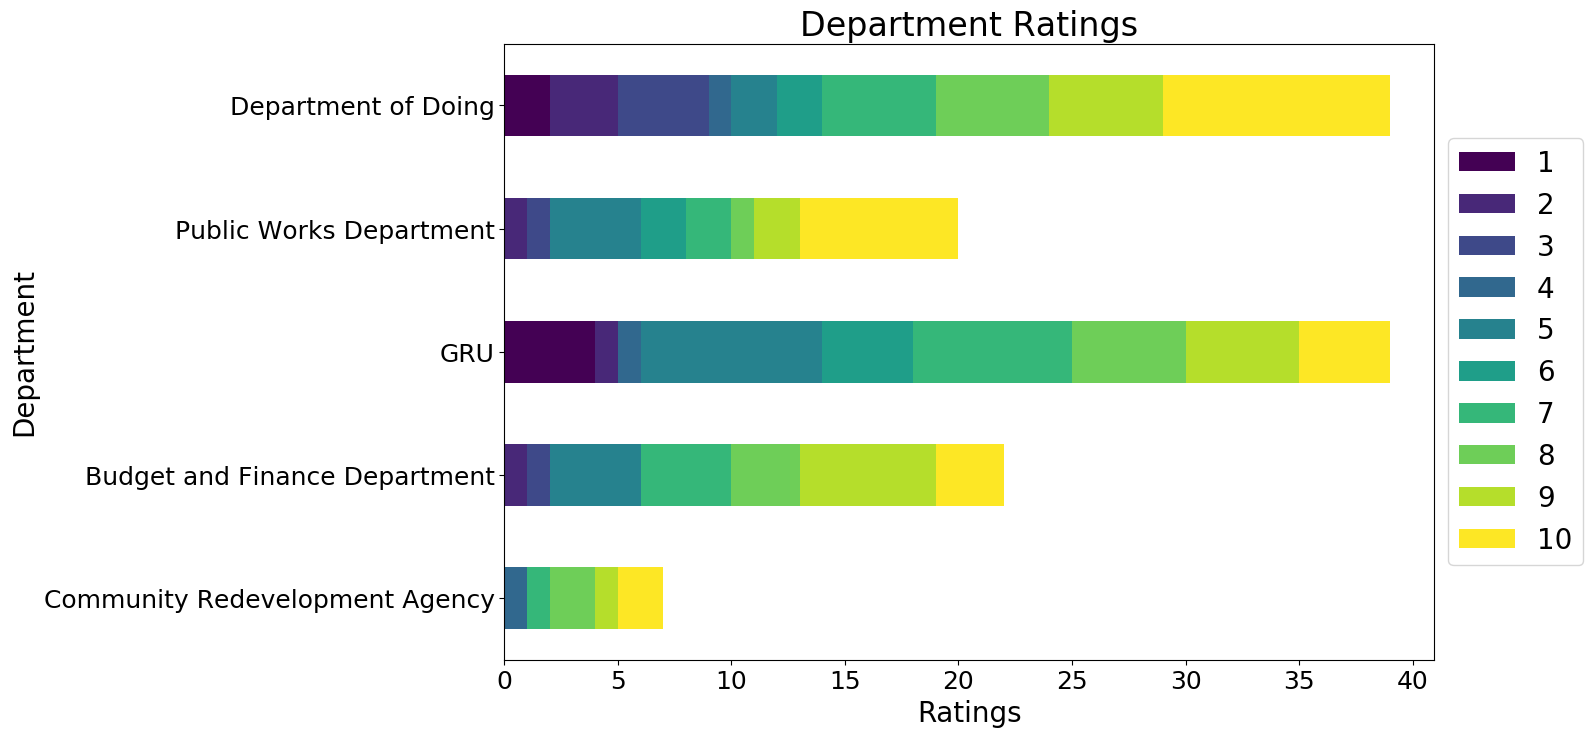

In [266]:
ax = raw_dept_counts_df.plot(kind='barh', figsize=(12, 8), title='Department Ratings', stacked=True, colormap='viridis')
ax.set_xlabel('Ratings')
ax.set_ylabel('Department')
ax.invert_yaxis()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

** Normalized **

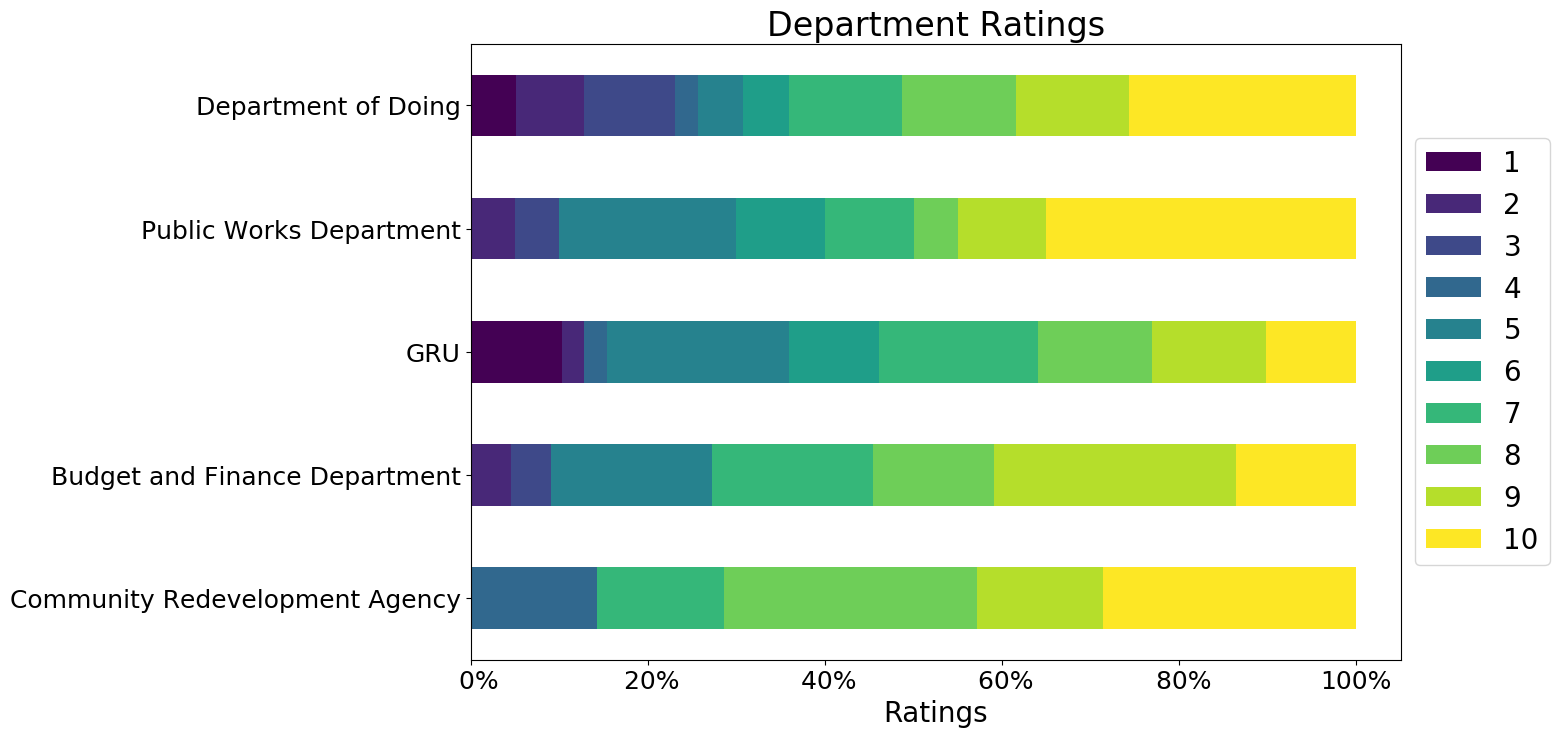

In [267]:
raw_dept_norms_df = pd.DataFrame(raw_dept_counts_df[possible_values].apply(lambda x: x/sum(x), axis='columns'))

ax = raw_dept_norms_df.plot(kind='barh', figsize=(12, 8), title='Department Ratings', stacked=True, colormap='viridis', legend=False)
ax.set_xlabel('Ratings')
ax.invert_yaxis()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Change x axis to percentages
vals = ax.get_xticks()
ax.set_xticklabels(['{:3.0f}%'.format(x*100) for x in vals]);

In [160]:
raw_dept_norms_df

1         2         3         4   \
Department of Doing             0.051282  0.076923  0.102564  0.025641   
Public Works Department         0.000000  0.050000  0.050000  0.000000   
GRU                             0.102564  0.025641  0.000000  0.025641   
Budget and Finance Department   0.000000  0.045455  0.045455  0.000000   
Community Redevelopment Agency  0.000000  0.000000  0.000000  0.142857   

                                      5         6         7         8   \
Department of Doing             0.051282  0.051282  0.128205  0.128205   
Public Works Department         0.200000  0.100000  0.100000  0.050000   
GRU                             0.205128  0.102564  0.179487  0.128205   
Budget and Finance Department   0.181818  0.000000  0.181818  0.136364   
Community Redevelopment Agency  0.000000  0.000000  0.142857  0.285714   

                                      9         10  
Department of Doing             0.128205  0.256410  
Public Works Department         0.100000  0.350000  
GRU                             0.128205  0.102564  
Budget and Finance Department   0.272727  0.136364  
Community Redevelopment Agency  0.142857  0.285714

** Q39 => During which of these 3 phases would you like the City of Gainesville to improve services already of **

In [161]:
numPeoplWhoResponded = 0
def getCount(row):
    if not row.isnull().all():
        print row
        global numPeoplWhoResponded
        numPeoplWhoResponded += 1

In [162]:
temp_df = merged_df[['weight','Q39_1', 'Q39_2','Q39_3','Q39_4']].dropna(subset=['Q39_1', 'Q39_2','Q39_3','Q39_4'], how='all')
temp_df['weight'].sum()

52.142517700558955

In [163]:
numPeoplWhoResponded

0

In [164]:
q39_choices_text = ['Search - business looks for a location','Shape - business draws up development/building plans',
                    'Build - business builds the physical location','None of the above']
q39_num = ['Q39_1','Q39_2','Q39_3','Q39_4']
print "        {:45s} {:10s}\n".format('Choice','Number of votes')
for i in range(4):
    print "{:55s} --- {:5}".format(q39_choices_text[i], num_res_df.loc[q39_num[i]].loc['Number of responses'] )

        Choice                                        Number of votes

Search - business looks for a location                  ---    20
Shape - business draws up development/building plans    ---    17
Build - business builds the physical location           ---    19
None of the above                                       ---    26


In [165]:
weighted_count_arr = []
for i in q39_num:
    aggr_data = merged_df.groupby(i).agg({'weight':'sum'})
    print(aggr_data['weight'][1])
    weighted_count_arr.append(aggr_data['weight'][1])

13.9019472624
13.4942794654
15.4115730882
22.8380047878


In [166]:
get_percentages(weighted_count_arr, temp_df['weight'].sum())

26.66%
25.88%
29.56%
43.8%


** 	Q40 => Were there services you were seeking from the City of Gainesville, but unable to find, during any of these 3 phases? Please select all that apply.  **

In [167]:
numPeoplWhoResponded = 0
merged_df[['Q40_1','Q40_2','Q40_3','Q40_4']].apply(getCount, axis=1)

Q40_1      1
Q40_2      1
Q40_3    NaN
Q40_4    NaN
Name: 18, dtype: object
Q40_1    NaN
Q40_2      1
Q40_3    NaN
Q40_4    NaN
Name: 34, dtype: object
Q40_1    NaN
Q40_2    NaN
Q40_3    NaN
Q40_4      1
Name: 36, dtype: object
Q40_1    NaN
Q40_2    NaN
Q40_3    NaN
Q40_4      1
Name: 50, dtype: object
Q40_1    NaN
Q40_2      1
Q40_3    NaN
Q40_4    NaN
Name: 56, dtype: object
Q40_1    NaN
Q40_2    NaN
Q40_3    NaN
Q40_4      1
Name: 64, dtype: object
Q40_1    NaN
Q40_2    NaN
Q40_3    NaN
Q40_4      1
Name: 68, dtype: object
Q40_1    NaN
Q40_2      1
Q40_3    NaN
Q40_4    NaN
Name: 81, dtype: object
Q40_1    NaN
Q40_2    NaN
Q40_3    NaN
Q40_4      1
Name: 86, dtype: object
Q40_1    NaN
Q40_2    NaN
Q40_3    NaN
Q40_4      1
Name: 89, dtype: object
Q40_1    NaN
Q40_2    NaN
Q40_3    NaN
Q40_4      1
Name: 101, dtype: object
Q40_1    NaN
Q40_2    NaN
Q40_3    NaN
Q40_4      1
Name: 106, dtype: object
Q40_1    NaN
Q40_2    NaN
Q40_3    NaN
Q40_4      1
Name: 116, dtype: object
Q40_1    

0      None
1      None
2      None
3      None
4      None
5      None
6      None
7      None
8      None
9      None
10     None
11     None
12     None
13     None
14     None
15     None
16     None
17     None
18     None
19     None
20     None
21     None
22     None
23     None
24     None
25     None
26     None
27     None
28     None
29     None
       ... 
718    None
719    None
720    None
721    None
722    None
723    None
724    None
725    None
726    None
727    None
728    None
729    None
730    None
731    None
732    None
733    None
734    None
735    None
736    None
737    None
738    None
739    None
740    None
741    None
742    None
743    None
744    None
745    None
746    None
747    None
Length: 748, dtype: object

In [168]:
numPeoplWhoResponded

58

In [169]:
q40_choices_text = ['Search - business looks for a location','Shape - business draws up development/building plans',
                    'Build - business builds the physical location','None of the above']
q40_num = ['Q40_1','Q40_2','Q40_3','Q40_4']
print "        {:45s} {:10s}\n".format('Choice','Number of votes')
for i in range(4):
    print "{:55s} --- {:5}".format(q40_choices_text[i], num_res_df.loc[q40_num[i]].loc['Number of responses'] )

        Choice                                        Number of votes

Search - business looks for a location                  ---     5
Shape - business draws up development/building plans    ---     9
Build - business builds the physical location           ---     4
None of the above                                       ---    44


In [170]:
for i in q40_num:
    print(merged_df.groupby(i).agg({'weight':'sum'})['weight'][1])

4.57322506292
7.91891386741
4.11084860678
34.5178072196


** Q41 - How likely are you to recommend opening a business in Gainesville to others? **

In [171]:
num_res_df.loc['Q41']

Number of responses    527
Name: Q41, dtype: int64

In [172]:
q41 = survey_df['Q41'].value_counts(normalize=True)

In [173]:
q41_choices = ['Extremely likely','Very likely','Moderately likely', 'Slightly likely','Not at all likely']
for i in range(1,6):
    print "{:20s} ----- {:4f} %".format(q41_choices[i-1] ,q41.loc[i]*100)

Extremely likely     ----- 13.662239 %
Very likely          ----- 30.170778 %
Moderately likely    ----- 32.827324 %
Slightly likely      ----- 11.574953 %
Not at all likely    ----- 11.764706 %


In [174]:
#Weightted counts of each choice
merged_df.groupby('Q41').agg({'weight':'sum'})

weight
Q41            
1     56.711508
2    124.122663
3    136.991252
4     48.837278
5     54.209486

In [175]:
count_of_neg_resp = 0
for i in range(1,3):
    temp_series = survey_df['Q41'][survey_df['Q43']==i].value_counts()
    count_of_neg_resp += temp_series[5] + temp_series[4]
print("Number of people that see business as successful but are slightly or not at all likely at recommending Gainesville to others: {0}".format(count_of_neg_resp))
print("Percentage of total = {0}%".format(100*count_of_neg_resp/num_res_df.loc['Q41']['Number of responses']))

Number of people that see business as successful but are slightly or not at all likely at recommending Gainesville to others: 105
Percentage of total = 19%


In [176]:
q41 = merged_df[merged_df['Business Type'].isin(['RETAIL MERCHANT','RESTAURANT','CONSULTANT','ATTORNEY/LAWYER'])]['Q41'].value_counts(normalize=True)

In [177]:
q41_choices = ['Extremely likely','Very likely','Moderately likely', 'Slightly likely','Not at all likely']
for i in range(1,6):
    print "{:20s} ----- {:4f} %".format(q41_choices[i-1] ,q41.loc[i]*100)

Extremely likely     ----- 11.851852 %
Very likely          ----- 25.185185 %
Moderately likely    ----- 35.555556 %
Slightly likely      ----- 14.074074 %
Not at all likely    ----- 13.333333 %


** Q42  - You said you are "Choice of Q41" to recommend opening a business in Gainesville to others. Did your experience with the City of Gainesville influence your answer? ** 

In [178]:
num_res_df.loc['Q42']

Number of responses    521
Name: Q42, dtype: int64

In [179]:
q42 = survey_df['Q42'].value_counts(normalize=True)

In [180]:
q42_choices = ['Yes', 'No']
for i in range(1,3): 
    print "{:5s} ----- {:4f} %".format(q42_choices[i-1] ,q42.loc[i]*100)

Yes   ----- 47.024952 %
No    ----- 52.975048 %


In [181]:
#Weighted result
merged_df.groupby('Q42').agg({'weight':'sum'})

weight
Q42            
1    191.861437
2    225.569846

In [182]:
# Resposnses to recommendation question influenced by City services
temp_series = survey_df['Q41'][survey_df['Q42'] == 1]
num = temp_series.value_counts()[4] + temp_series.value_counts()[5]
denom = len(temp_series)
print("Percentage of people who say they are slightly or not at all likely to recommend Gainesville due to their experience with City: {0}%".format(100*num/denom))

Percentage of people who say they are slightly or not at all likely to recommend Gainesville due to their experience with City: 36%


In [183]:
ddf = pd.crosstab(merged_df['Q41'], merged_df['Q42'], normalize=True)*100
ddf.index=q41_choices
ddf.columns=['Yes','No']
ddf['Total'] = ddf['Yes'] + ddf['No']
ddf

Yes         No      Total
Extremely likely    6.730769   7.115385  13.846154
Very likely        10.384615  19.807692  30.192308
Moderately likely  12.884615  19.807692  32.692308
Slightly likely     7.692308   3.846154  11.538462
Not at all likely   9.423077   2.307692  11.730769

** Q43  - How would you rate the success of your business at this location?  ** 

In [184]:
successLabelValues = [
    ['Very Successful', 1],
    ['Somewhat Successful', 2],
    ['Somewhat Unsuccessful', 3],
    ['Very Unsuccessful', 4]
]

successLabels = [x[0] for x in successLabelValues]
successValues = [x[1] for x in successLabelValues]

successLabelValue = dict(zip(successLabels, successValues))
successValueLabel = dict(zip(successValues, successLabels))

In [185]:
successLabelValue

{'Somewhat Successful': 2,
 'Somewhat Unsuccessful': 3,
 'Very Successful': 1,
 'Very Unsuccessful': 4}

In [186]:
successValueLabel

{1: 'Very Successful',
 2: 'Somewhat Successful',
 3: 'Somewhat Unsuccessful',
 4: 'Very Unsuccessful'}

In [187]:
num_res_df.loc['Q43']

Number of responses    520
Name: Q43, dtype: int64

In [188]:
q43 = survey_df['Q43'].value_counts(normalize = True)

In [189]:
q43_choices = ['Very Successful','Somewhat Successful','Somewhat Unsuccessful','Very Unsuccessful']
for i in range(1,5):
    print "{:25s} ----- {:4f} %".format(q43_choices[i-1] ,q43.loc[i]*100)

Very Successful           ----- 44.615385 %
Somewhat Successful       ----- 48.653846 %
Somewhat Unsuccessful     ----- 5.192308 %
Very Unsuccessful         ----- 1.538462 %


In [190]:
# Weighted reponses
merged_df.groupby('Q43').agg({'weight':'sum'})

weight
Q43            
1    186.370096
2    192.931718
3     28.412221
4      8.028251

In [191]:
# success_bus_typewise = []
# for bus_type in merged_df['Business Type'].unique():
#     success_classi = merged_df[merged_df['Business Type'] == bus_type]['Q43'].value_counts()
#     succ_dict = OrderedDict()
#     succ_dict['Very unsuccessful'] = 0
#     succ_dict['Somewhat successful/Unsuccessful'] = 0
#     succ_dict['Very successful'] = 0
    
#     for i in success_classi.index:
#         if i == 1:
#             succ_dict['Very successful'] = success_classi[i]
#         if i == 2 or i == 3:
#             succ_dict['Somewhat successful/Unsuccessful'] = success_classi[i] # BAD - this overwites SS with SU
#         if i == 4:
#             succ_dict['Very unsuccessful'] = success_classi[i]
#     success_bus_typewise.append(succ_dict)            

In [192]:
master_df['Business Type'].unique()

array(['BEAUTY PARLOR', 'PHOTOGRAPHER', 'PHYSICIAN/SURGEON MD',
       'MASSAGE THERAPIST', 'ATTORNEY/LAWYER',
       'BARBER/COSMETOLOGIST/NAIL TECH',
       'AUTO-TRANSFER, HAULING OR DELIVERY CO.', 'ARCHITECT', 'CONSULTANT',
       'SERVICE-OTHER', 'LAUNDRY-SELF SERVICE OR AUTOMATIC',
       'AUTO REPAIR GARAGE', 'CONTRACTOR-PLUMBER/INCL. GAS LINES',
       'COMPUTER ANALYSTS', 'SCHOOL-KARATE/JUDO',
       'MANUFACTURING-FOOD PRODUCTS', 'RESTAURANT', 'LABORATORY',
       'PEDDLER-FOOD CART', 'RETAIL MERCHANT',
       'BOOKKEEPING OR INCOME TAX SERVICE', 'SCHOOL NOT OTHERWISE LISTED',
       'PROFESSIONAL-ACUPUNCTURE', 'EXERCISE OR TRAINING STUDIO',
       'NURSERY SCHOOL AND/OR CHILD DAYCARE',
       'REPAIRS NOT REQUIRING STATE LICENSE',
       'INTERIOR JANITORIAL AND CLEANING SERVICES',
       'INSURANCE AGENT -1 AGENT', 'LAND SURVEYOR', 'ACCOUNTANT/AUDITOR',
       'CLINICAL SOCIAL WORKER', 'CHIROPRACTOR', 'ADVERTISING AGENCY',
       'CONTRACTOR-INSTALLATION', 'CATERER', 'DENTI

In [193]:
merged_df[merged_df['Business Type'] == 'BEAUTY PARLOR']['Q43'].value_counts()

2    4
1    3
Name: Q43, dtype: int64

In [194]:
columns = ['Business Type', 'Total'] +  successLabels

counts = merged_df[merged_df['Business Type'] == 'BEAUTY PARLOR']['Q43'].value_counts()
test = pd.Series(index=columns)

for i in successValues:
    test[successValueLabel[i]] = counts[i] if i in counts else 0
test['Total'] = counts.sum()

test #np.isnan(counts[1])

Business Type            NaN
Total                    7.0
Very Successful          3.0
Somewhat Successful      4.0
Somewhat Unsuccessful    0.0
Very Unsuccessful        0.0
dtype: float64

In [195]:
# def getSuccessfulnessByColumn(column):
#     data_df = master_df
#     columns = ['Total'] +  successLabels

#     fill_df = success_by_type_df = pd.DataFrame(columns=columns)
#     fill_df = fill_df.rename_axis(column, axis='index')

#     # Count up successfulness responses for each business type
#     for key in data_df[column].unique():
#         response_counts = data_df[data_df[column] == key]['Successfulness'].value_counts()
#         row = pd.Series(index=columns, name=key);

#         # Put counts in series
#         for i in successValues:
#             row[successValueLabel[i]] = response_counts[i] if i in response_counts else 0
#         row['Total'] = response_counts.sum()

#         # Add row to the dataframe as a row
#         fill_df = fill_df.append(row)

#     return fill_df

In [196]:
def getSuccessfulnessByColumn(column):
    data_df = master_df
    columns = ['Total'] + successLabels

    fill_df = pd.DataFrame(columns=columns, index=data_df[column].unique())

    # Count up successfulness responses for each unique index
    fill_df['Total'] = data_df[column].value_counts()

    for index, row in fill_df.iterrows():
        success_counts = data_df[data_df[column] == index]['Successfulness'].value_counts()
        for x in success_counts.keys():
            fill_df.set_value(index=index, col=x, value=success_counts[x])

    return fill_df.fillna(0)

In [197]:
success_by_type_df = getSuccessfulnessByColumn('Business Type')

success_by_type_df.sort_values(by='Total', ascending=False)

Total  Very Successful  \
RETAIL MERCHANT                              845               25   
INSURANCE COMPANY OR BROKER                  428                0   
BARBER SHOP                                  374                2   
RESTAURANT                                   368               12   
APARTMENT OR CONDO RENTALS                   263                4   
BARBER/COSMETOLOGIST/NAIL TECH               182                3   
INTERIOR JANITORIAL AND CLEANING SERVICES    164                7   
REPAIRS NOT REQUIRING STATE LICENSE          160                4   
ATTORNEY/LAWYER                              151               14   
BEAUTY PARLOR                                125                3   
LAUNDRY-SELF SERVICE OR AUTOMATIC            121                1   
PEDDLER                                      100                0   
CONTRACTOR-INSTALLATION                       98                2   
AUTO REPAIR GARAGE                            98                3   
MASSAGE THERAPIST                             94                2   
SERVICE-OTHER                                 91                2   
PHYSICIAN/SURGEON MD                          90                5   
WHOLESALE MERCHANT                            84                3   
CATALOGUE OR MAIL ORDER SERVICE               84                1   
CONTRACTOR-PAINTER/PAPERHANGER                80                1   
CONSULTANT                                    79                8   
REAL ESTATE BROKER                            74                7   
EXTERIOR JANITORIAL AND CLEANING SERVICES     61                0   
MENTAL HEALTH COUNSELOR                       58                6   
BOOKKEEPING OR INCOME TAX SERVICE             56                3   
COIN-OP VENDING MACHINES                      54                0   
PROFESSIONAL-ACUPUNCTURE                      53                4   
LAWN/YARD MAINTENANCE w/o LANDSCAPING         53                0   
SCHOOL NOT OTHERWISE LISTED                   50                4   
CATERER                                       49                0   
...                                          ...              ...   
MICROFILMING - NOT PHOTOGRAPHER                1                0   
FLEA/FARMER'S MARKET                           1                1   
AUCTION SHOP                                   1                0   
MANUFACTURING-SAWMILL                          1                0   
SCHOOL-COSMETOLOGY                             1                0   
RADIO/TV STATION                               1                0   
DRIVE-IN FOOD STAND                            1                0   
MANUFACTURING-CLOTHING                         1                0   
AUTOMOBILE ASSOCIATION                         1                0   
WHOLESALE BAKERY SALES - NO PLANT              1                0   
RENTALS/LEASING-SANITARY CONTAINERS            1                0   
MORTGAGE OR LOAN-SOLICITOR/AGENT               1                0   
DATA PROCESSING SERVICE                        1                0   
CONTRACTOR-PARKING LOT STRIPING                1                0   
SCHOOL-AIRCRAFT                                1                0   
CEMETERY                                       1                0   
SAND, DIRT, ROCK OR SHELL DEALER               1                0   
PUBLISHER'S AGENT                              1                0   
TREE SERVICE-TRIMMING & PRUNING ONLY           1                0   
ESCORT SERVICE                                 1                0   
NURSE OR NURSE PRACTIONER                      1                0   
RINKS AND PARKS                                1                0   
RENTALS/LEASING-PORTABLE TOILETS               1                0   
PROFESSIONAL-CHEMIST                           1                0   
CONTRACTOR-ELEVATOR                            1                0   
BIRTH CENTER                                   1                0   
JUNK OR SCRAP METAL DEALER               

In [198]:
success_by_naics_df = getSuccessfulnessByColumn('NAICS Type')

success_by_naics_df[:1]

Total  Very Successful  Somewhat Successful  \
Other Services   1002               12                   16   

                Somewhat Unsuccessful  Very Unsuccessful  
Other Services                      6                  1

In [199]:
# success_by_type_df = getSuccessfulnessByColumn('Business Type')

# success_by_type_df.sort_values(['Total'], ascending=0, inplace=True)

# # Let's only plot the successfulness
# columns = successLabels

# # Make them pretty
# colors = ['C3', 'C1', 'C8', 'C2']

# # Let's group everything not in the most-common-15 in a single bin
# others_df = success_by_type_df.drop(axis='index', labels=success_by_type_df[:15].index)
# success_by_type_df = success_by_type_df[:15].append(others_df.sum().rename("ALL OTHERS"))
# success_by_type_df[:15].sort_values(['Very Successful'], ascending=0).plot(kind='bar', y=columns, color=colors, figsize=(15,10), stacked =True)

### Count Successfulness Responses per Business Type 

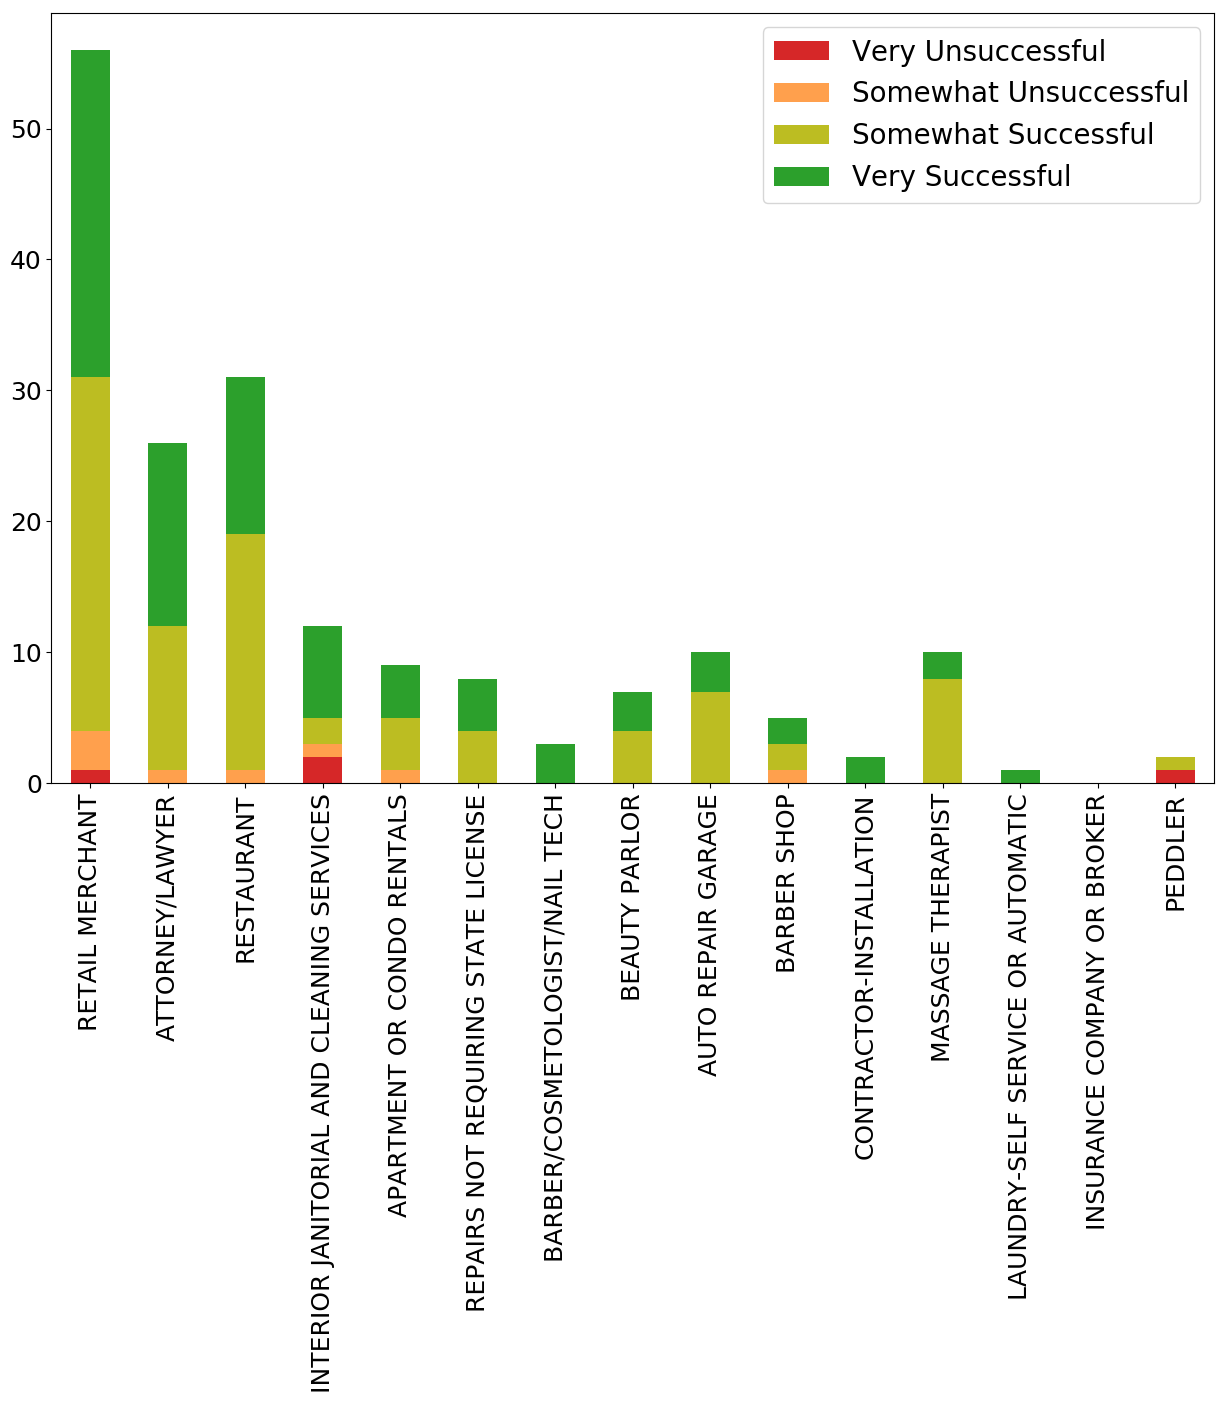

In [270]:
success_by_type_df = getSuccessfulnessByColumn('Business Type').sort_values(['Total'], ascending=0)

# Let's only plot the successfulness
columns = successLabels[::-1]

# Make them pretty
colors = ['C3', 'C1', 'C8', 'C2']

# Let's group everything not in the most-common-15 in a single bin
others_df = success_by_type_df.drop(axis='index', labels=success_by_type_df[:15].index)
success_by_type_df = success_by_type_df[:15].append(others_df.sum().rename("ALL OTHERS"))
success_by_type_df[:15].sort_values(['Very Successful'], ascending=0).plot(kind='bar', y=columns, color=colors, figsize=(15,10), stacked=True)

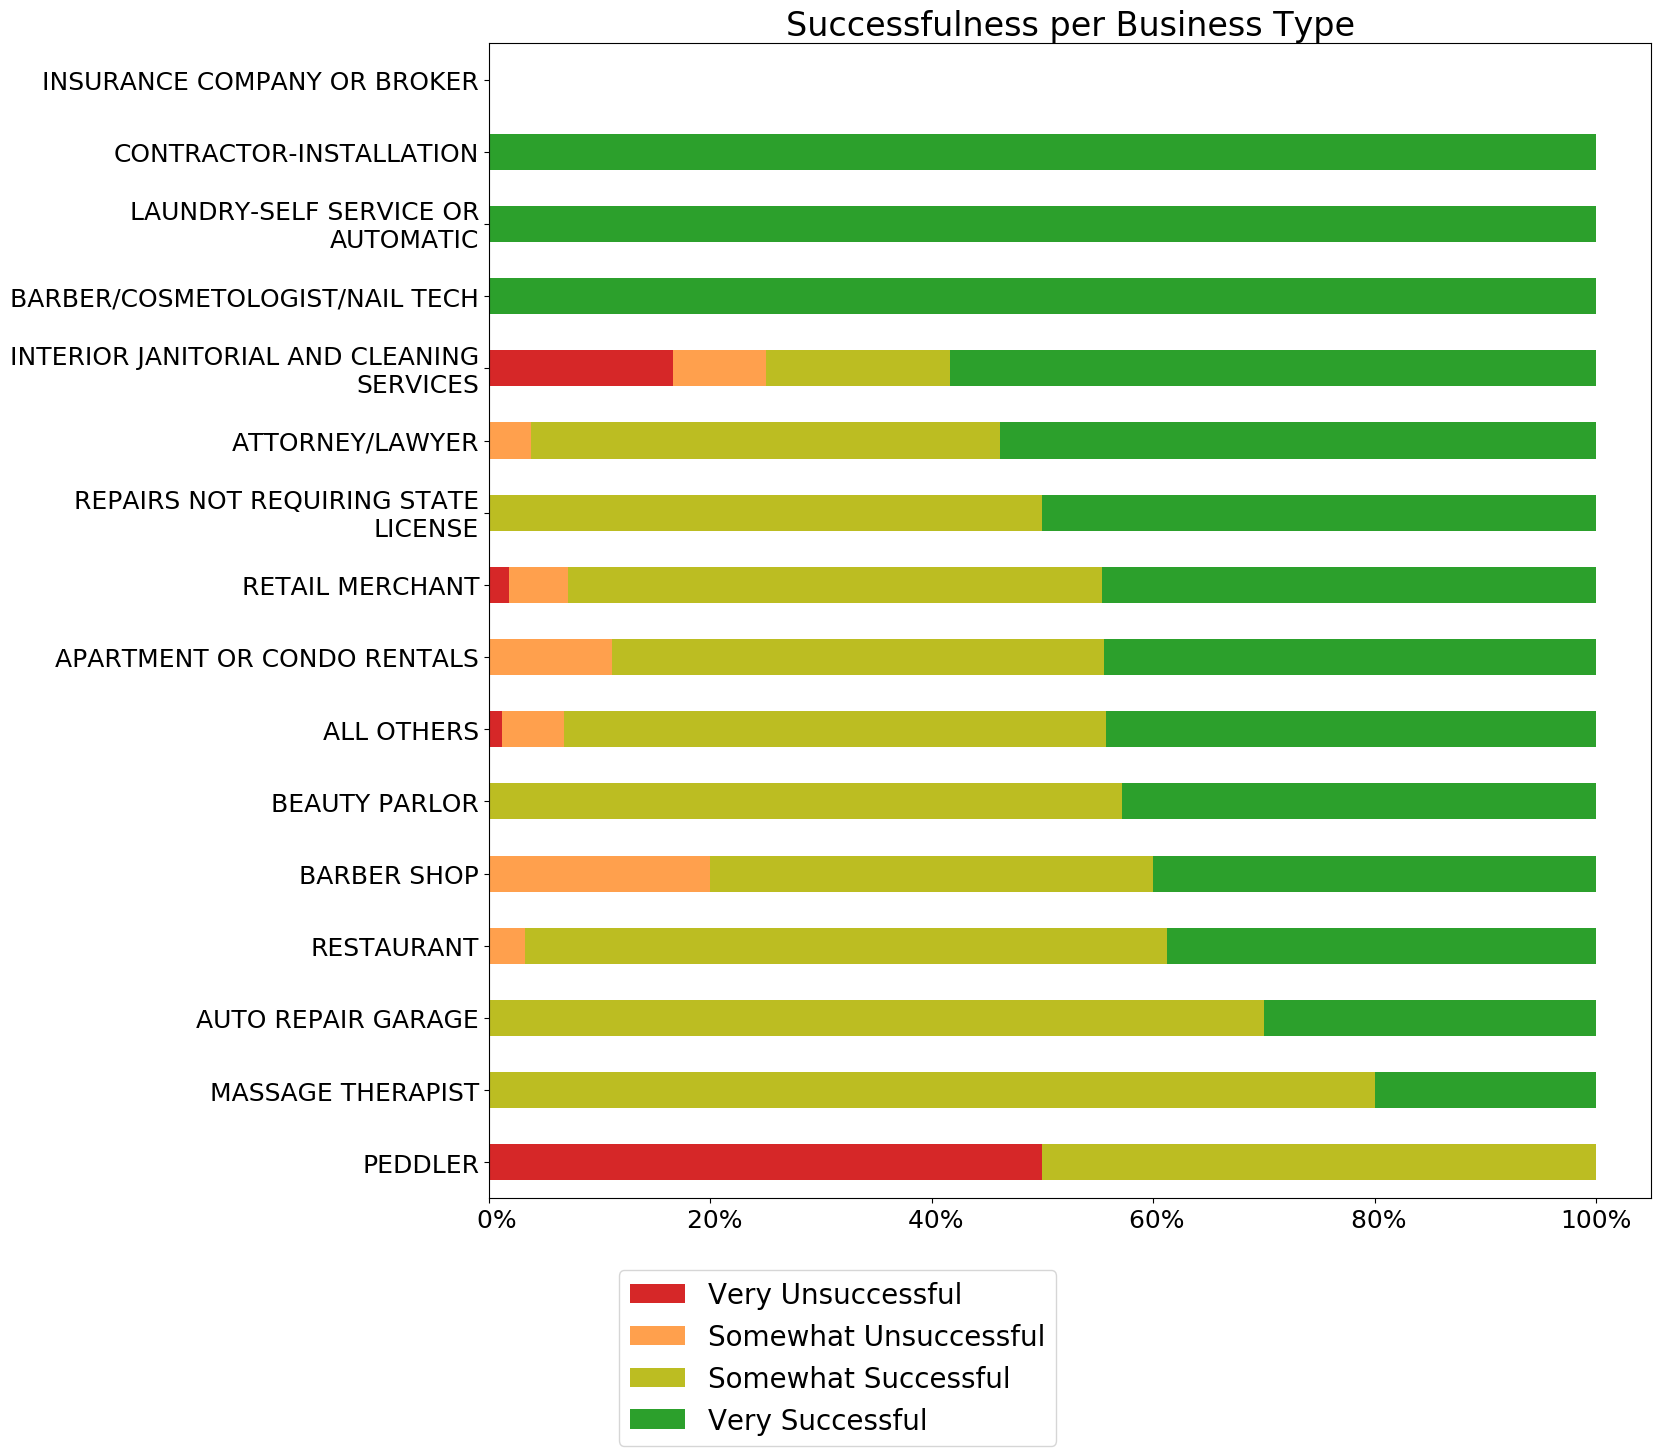

In [271]:
# Let's normalize those results!
norm_success_by_type_df = pd.DataFrame(success_by_type_df[columns].apply(lambda x: x/sum(x), axis=1))

# Make them pretty
colors = ['C3', 'C1', 'C8', 'C2']
ax = norm_success_by_type_df[:16].sort_values(['Very Successful'], ascending=1).plot(kind='barh', color=colors, title='Successfulness per Business Type', figsize=(15,15), stacked=True)

# Change x axis to percentages
vals = ax.get_xticks()
ax.set_xticklabels(['{:3.0f}%'.format(x*100) for x in vals])

# Shorten y axis labels
vals = ax.get_yticklabels()
ax.set_yticklabels(['\n'.join(textwrap.wrap(x.get_text(), width=32)) for x in vals])

ax.legend(loc='upper right', bbox_to_anchor=(0.5, -0.05))

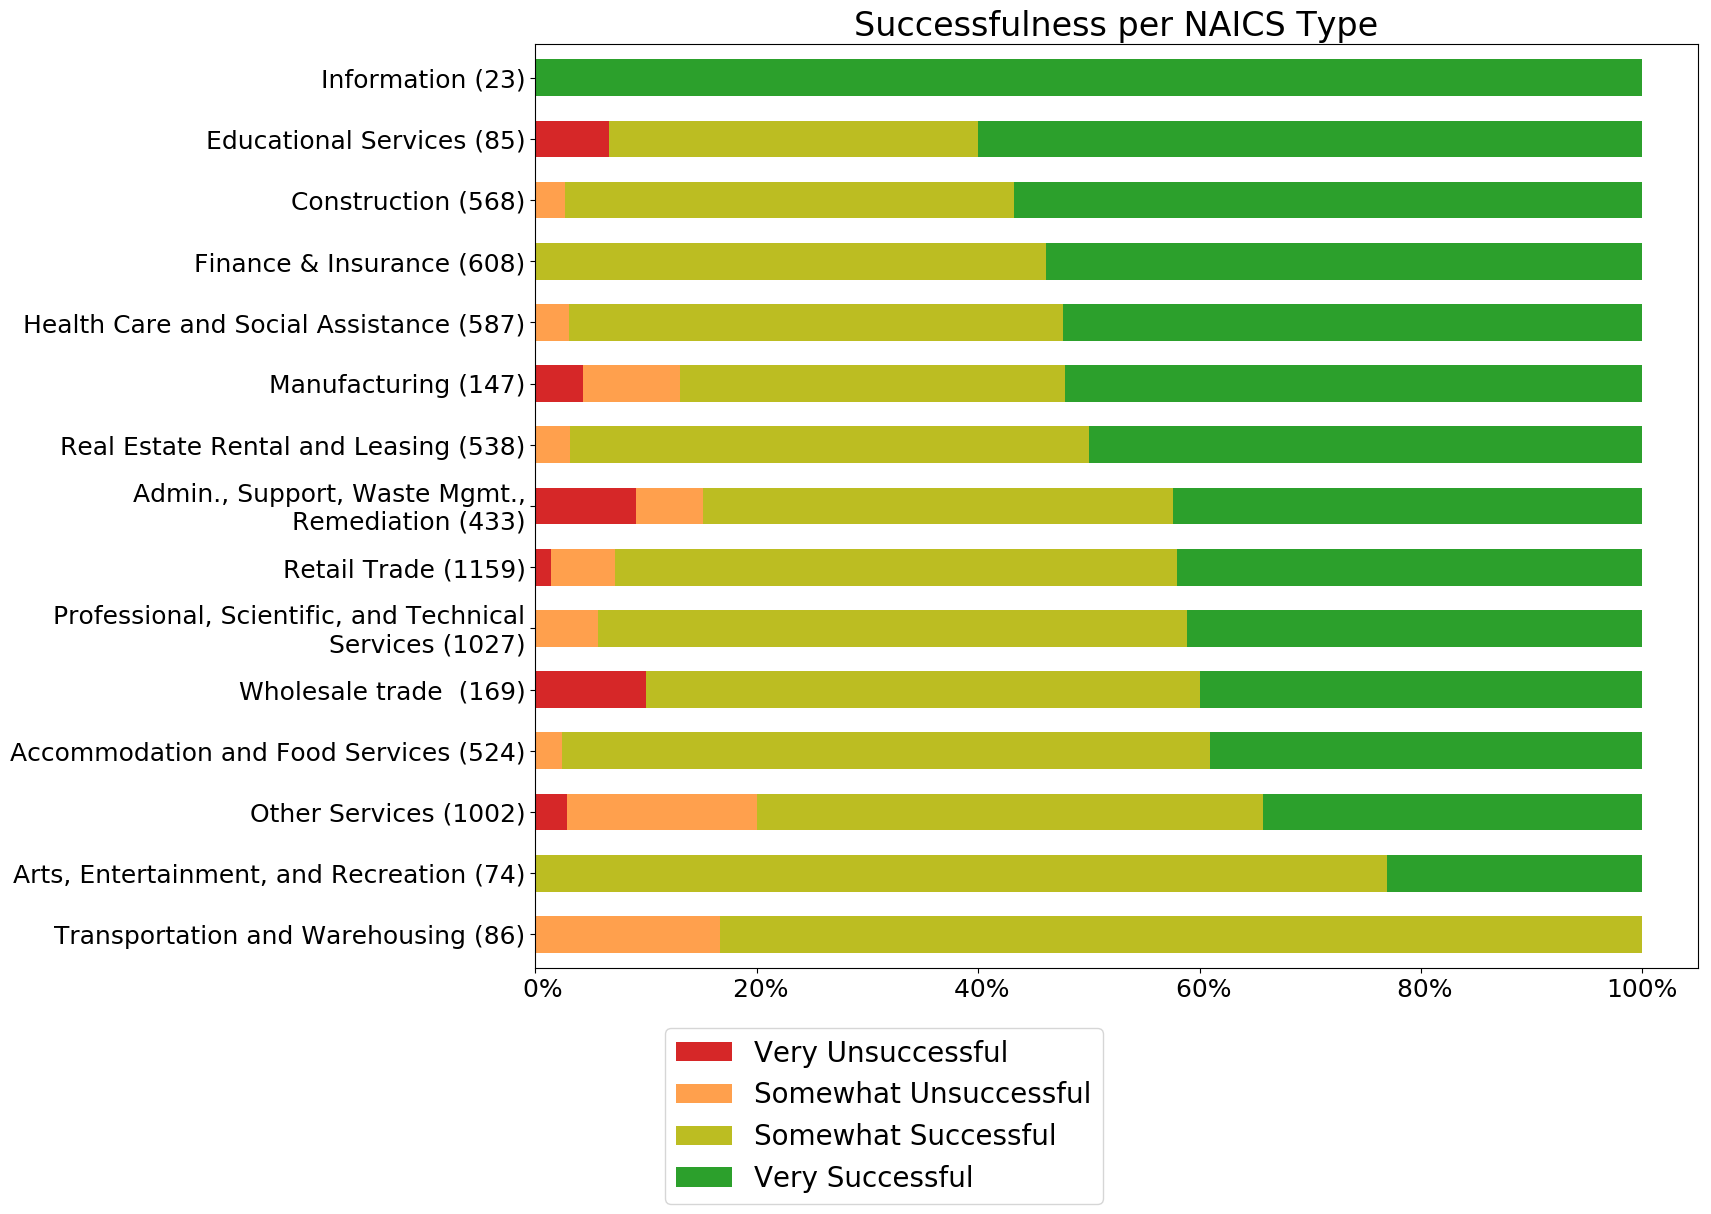

In [273]:
# Get success by NAICS
success_by_naics_df = getSuccessfulnessByColumn('NAICS Type')

# Let's normalize those results!
norm_success_by_naics_df = pd.DataFrame(success_by_naics_df[columns].apply(lambda x: x/sum(x), axis=1))

# Make them pretty
colors = ['C3', 'C1', 'C8', 'C2']

# Drop types with no data
norm_success_by_naics_df.dropna(inplace=True)

ax = norm_success_by_naics_df.sort_values(['Very Successful'], ascending=1).plot(kind='barh', color=colors, title='Successfulness per NAICS Type', figsize=(15,12), stacked=True, width=0.6)

# Change x axis to percentages
vals = ax.get_xticks()
ax.set_xticklabels(['{:3.0f}%'.format(x*100) for x in vals])

# Shorten y axis labels
vals = ax.get_yticklabels()
new_vals = []
for x in vals:
    text = x.get_text();

    # Add "total" to the label
    text += ' (' + str(int(success_by_naics_df['Total'][text])) + ')'

    # Break long names into multiple lines
    text = '\n'.join(textwrap.wrap(text, width=40))

    new_vals.append(text)

ax.set_yticklabels(new_vals)

ax.legend(loc='upper right', bbox_to_anchor=(0.5, -0.05))

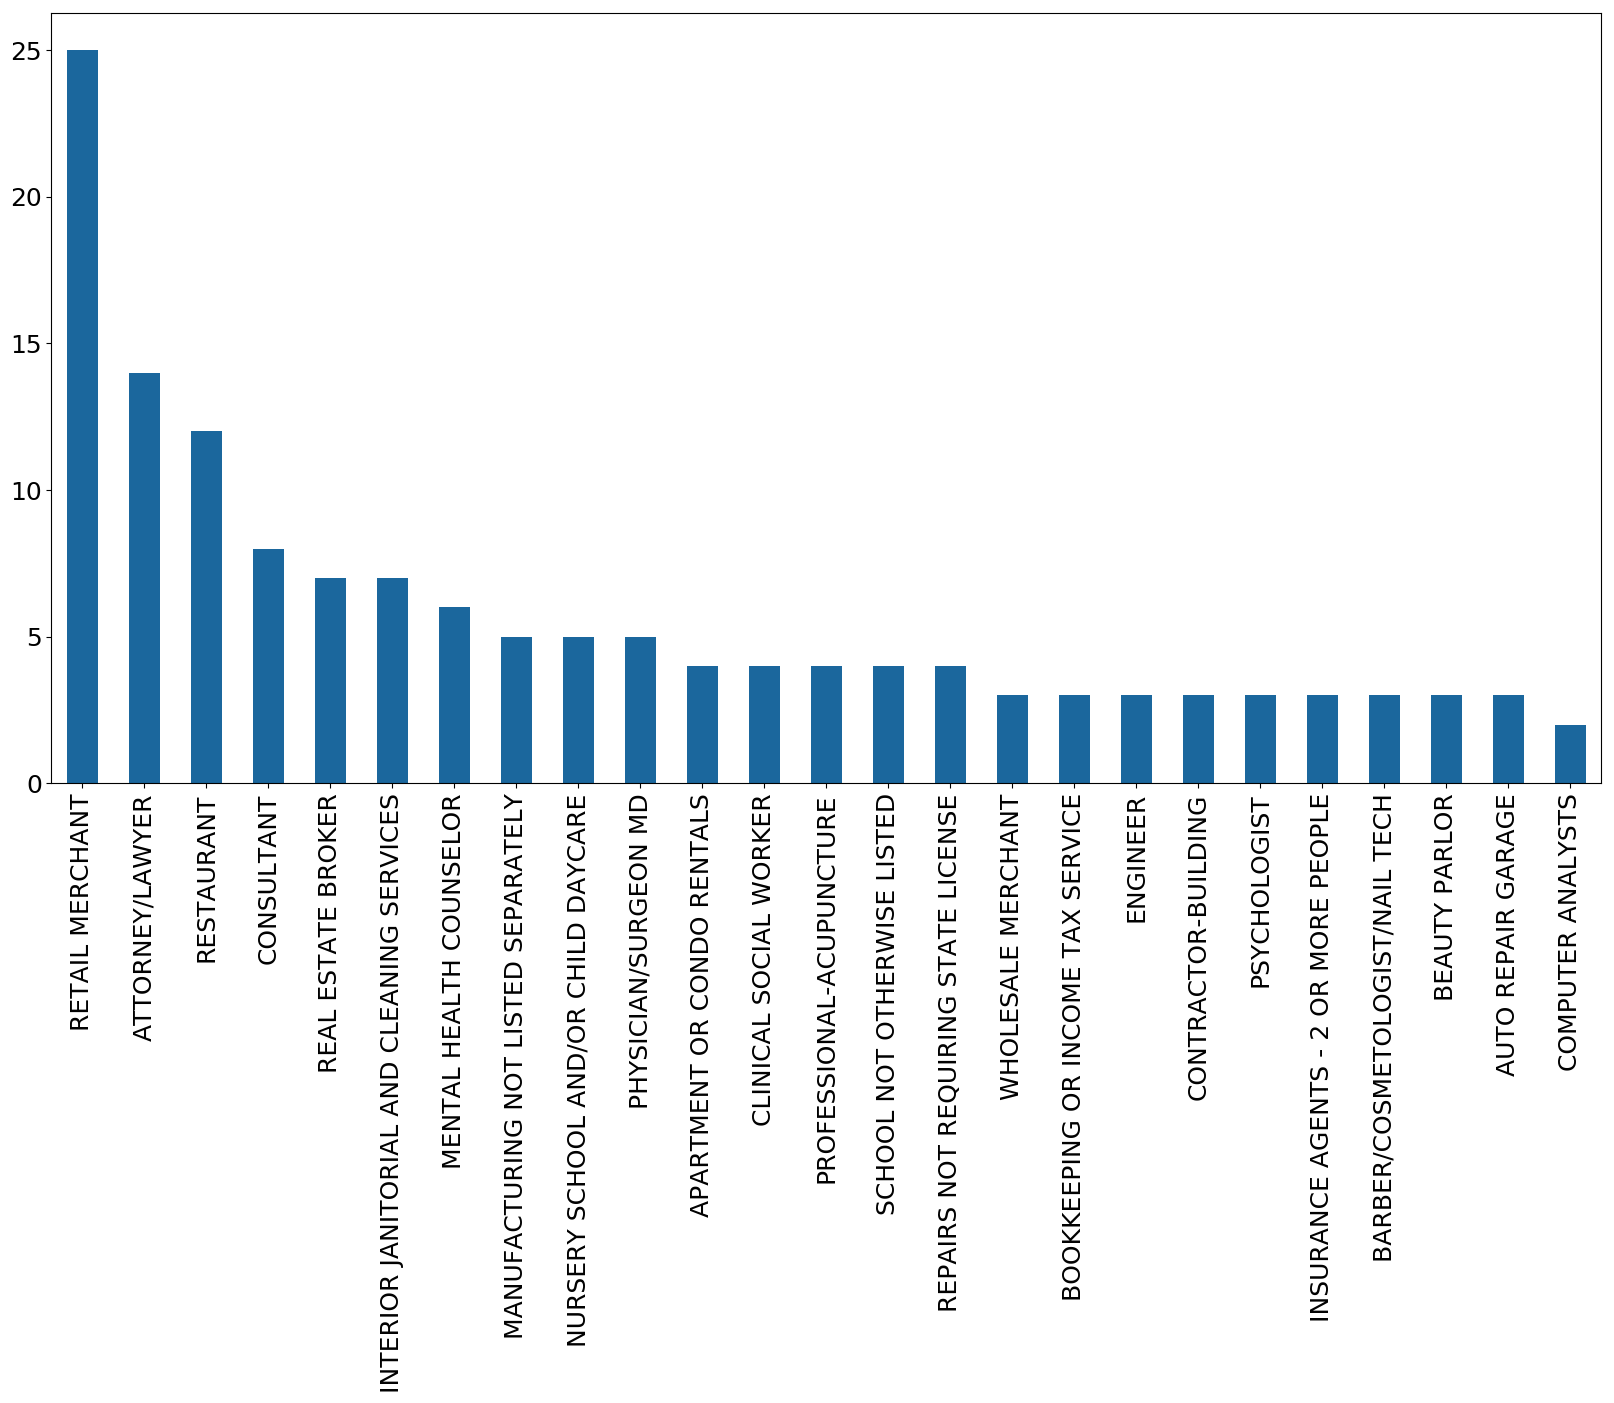

In [203]:
merged_df[(merged_df['Q43'] == 1)]['Business Type'].value_counts()[:25].plot(kind='bar', figsize = (20,10))

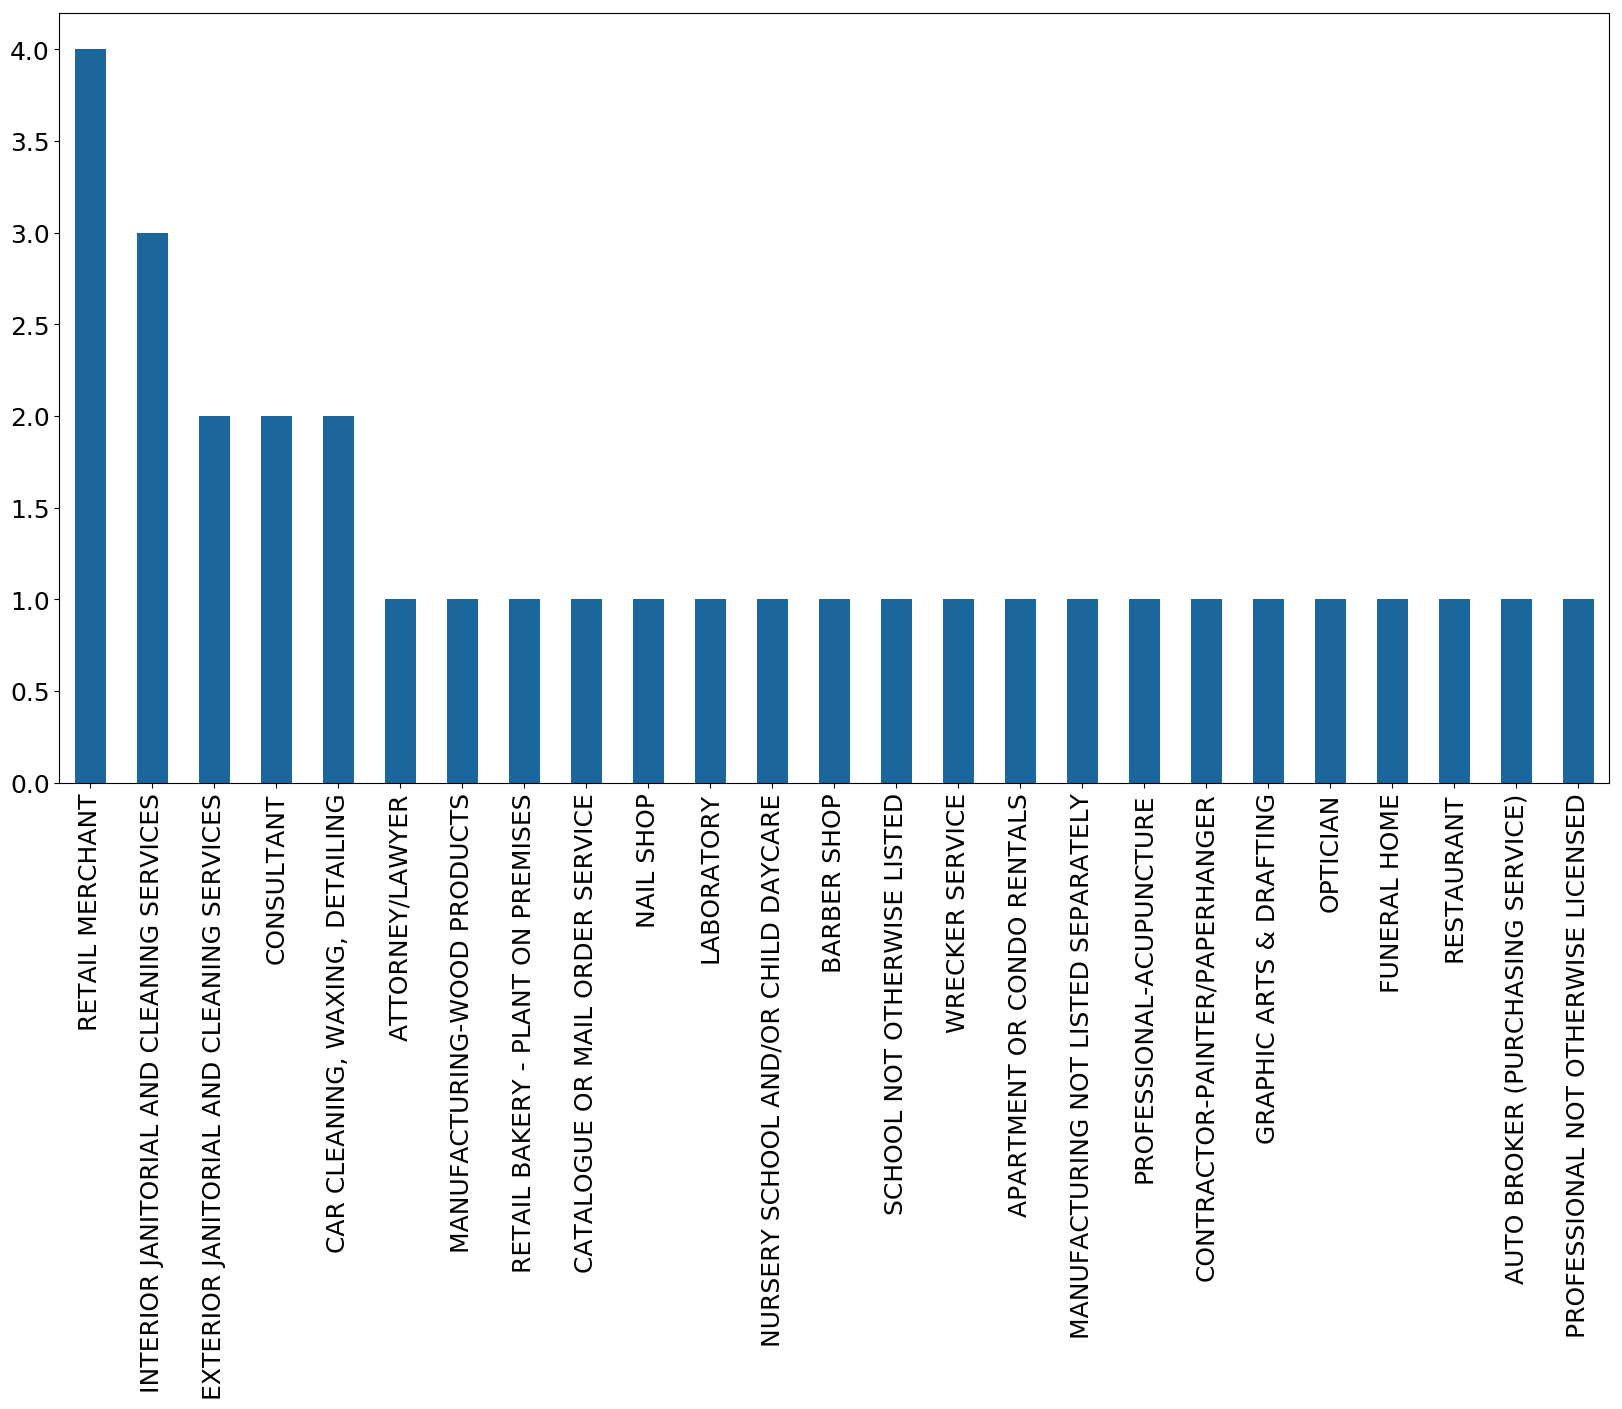

In [204]:
merged_df[(merged_df['Q43'] == 3) | (merged_df['Q43'] == 4)]['Business Type'].value_counts()[:25].plot(kind='bar', figsize = (20,10))

** Q44 - You said your business has been Very/Somewhat Successful/Unsuccessful. What are the reasons? 
 **

In [205]:
# Find totla number of peoplw who actually responded
q44_choices_number = ['weight']
for i in range(1,6):
    q44_choices_number.append('Q44_' + str(i))
temp_df = merged_df[q44_choices_number].dropna(subset=q44_choices_number[1:], how='all')
print("Number of people who responded: {0}".format(temp_df.shape[0]))
print("Weighted number of people who responded: {0}".format(temp_df['weight'].sum()))

Number of people who responded: 506
Weighted number of people who responded: 404.838726398


In [206]:
weighted_count_arr = []
for i, col in enumerate(q44_choices_number):
    if col != 'weight':
        aggr = temp_df.groupby(col).agg({'weight' : 'sum'})['weight']
        print("Choice {0}: {1}".format(i, 0 if aggr.empty else aggr[1]))
        weighted_count_arr.append( 0 if aggr.empty else aggr[1])

Choice 1: 252.22652651
Choice 2: 167.48293882
Choice 3: 111.052692474
Choice 4: 33.4218842432
Choice 5: 87.4776411931


In [207]:
get_percentages(weighted_count_arr, temp_df['weight'].sum())

62.3%
41.37%
27.43%
8.26%
21.61%


In [208]:
numPeoplWhoResponded = 0
merged_df[['Q44_1','Q44_2','Q44_3','Q44_4','Q44_5']].apply(getCount, axis=1)

Q44_1      1
Q44_2      1
Q44_3    NaN
Q44_4    NaN
Q44_5    NaN
Name: 1, dtype: object
Q44_1      1
Q44_2      1
Q44_3    NaN
Q44_4    NaN
Q44_5    NaN
Name: 7, dtype: object
Q44_1    NaN
Q44_2      1
Q44_3      1
Q44_4    NaN
Q44_5    NaN
Name: 8, dtype: object
Q44_1      1
Q44_2      1
Q44_3    NaN
Q44_4    NaN
Q44_5    NaN
Name: 9, dtype: object
Q44_1      1
Q44_2    NaN
Q44_3      1
Q44_4    NaN
Q44_5    NaN
Name: 10, dtype: object
Q44_1      1
Q44_2    NaN
Q44_3      1
Q44_4    NaN
Q44_5    NaN
Name: 11, dtype: object
Q44_1      1
Q44_2    NaN
Q44_3    NaN
Q44_4    NaN
Q44_5    NaN
Name: 16, dtype: object
Q44_1      1
Q44_2    NaN
Q44_3      1
Q44_4    NaN
Q44_5    NaN
Name: 18, dtype: object
Q44_1      1
Q44_2    NaN
Q44_3      1
Q44_4    NaN
Q44_5      1
Name: 20, dtype: object
Q44_1      1
Q44_2    NaN
Q44_3    NaN
Q44_4    NaN
Q44_5    NaN
Name: 21, dtype: object
Q44_1      1
Q44_2    NaN
Q44_3    NaN
Q44_4    NaN
Q44_5    NaN
Name: 24, dtype: object
Q44_1      1
Q44_2      1

Q44_1    NaN
Q44_2    NaN
Q44_3    NaN
Q44_4      1
Q44_5      1
Name: 224, dtype: object
Q44_1      1
Q44_2    NaN
Q44_3      1
Q44_4    NaN
Q44_5    NaN
Name: 225, dtype: object
Q44_1      1
Q44_2    NaN
Q44_3      1
Q44_4    NaN
Q44_5    NaN
Name: 226, dtype: object
Q44_1      1
Q44_2    NaN
Q44_3    NaN
Q44_4    NaN
Q44_5    NaN
Name: 227, dtype: object
Q44_1      1
Q44_2      1
Q44_3    NaN
Q44_4    NaN
Q44_5    NaN
Name: 229, dtype: object
Q44_1    NaN
Q44_2    NaN
Q44_3    NaN
Q44_4      1
Q44_5    NaN
Name: 230, dtype: object
Q44_1      1
Q44_2      1
Q44_3    NaN
Q44_4    NaN
Q44_5    NaN
Name: 231, dtype: object
Q44_1      1
Q44_2    NaN
Q44_3    NaN
Q44_4    NaN
Q44_5    NaN
Name: 233, dtype: object
Q44_1      1
Q44_2    NaN
Q44_3      1
Q44_4    NaN
Q44_5      1
Name: 234, dtype: object
Q44_1    NaN
Q44_2      1
Q44_3    NaN
Q44_4    NaN
Q44_5    NaN
Name: 235, dtype: object
Q44_1      1
Q44_2      1
Q44_3    NaN
Q44_4    NaN
Q44_5    NaN
Name: 237, dtype: object
Q44_1    N

Name: 552, dtype: object
Q44_1      1
Q44_2      1
Q44_3      1
Q44_4    NaN
Q44_5    NaN
Name: 556, dtype: object
Q44_1      1
Q44_2    NaN
Q44_3      1
Q44_4    NaN
Q44_5    NaN
Name: 557, dtype: object
Q44_1      1
Q44_2      1
Q44_3      1
Q44_4    NaN
Q44_5    NaN
Name: 559, dtype: object
Q44_1    NaN
Q44_2    NaN
Q44_3      1
Q44_4    NaN
Q44_5    NaN
Name: 560, dtype: object
Q44_1    NaN
Q44_2    NaN
Q44_3    NaN
Q44_4      1
Q44_5    NaN
Name: 561, dtype: object
Q44_1    NaN
Q44_2      1
Q44_3    NaN
Q44_4    NaN
Q44_5    NaN
Name: 562, dtype: object
Q44_1      1
Q44_2      1
Q44_3    NaN
Q44_4    NaN
Q44_5    NaN
Name: 563, dtype: object
Q44_1      1
Q44_2    NaN
Q44_3    NaN
Q44_4    NaN
Q44_5    NaN
Name: 564, dtype: object
Q44_1      1
Q44_2    NaN
Q44_3      1
Q44_4    NaN
Q44_5    NaN
Name: 565, dtype: object
Q44_1    NaN
Q44_2    NaN
Q44_3    NaN
Q44_4    NaN
Q44_5      1
Name: 566, dtype: object
Q44_1      1
Q44_2    NaN
Q44_3    NaN
Q44_4    NaN
Q44_5      1
Name: 567,

0      None
1      None
2      None
3      None
4      None
5      None
6      None
7      None
8      None
9      None
10     None
11     None
12     None
13     None
14     None
15     None
16     None
17     None
18     None
19     None
20     None
21     None
22     None
23     None
24     None
25     None
26     None
27     None
28     None
29     None
       ... 
718    None
719    None
720    None
721    None
722    None
723    None
724    None
725    None
726    None
727    None
728    None
729    None
730    None
731    None
732    None
733    None
734    None
735    None
736    None
737    None
738    None
739    None
740    None
741    None
742    None
743    None
744    None
745    None
746    None
747    None
Length: 748, dtype: object

In [209]:
numPeoplWhoResponded

506

In [210]:
print merged_df['Q44_1'].value_counts()
print merged_df['Q44_2'].value_counts()
print merged_df['Q44_3'].value_counts()
print merged_df['Q44_4'].value_counts()
print merged_df['Q44_5'].value_counts()

1    311
Name: Q44_1, dtype: int64
1    201
Name: Q44_2, dtype: int64
1    137
Name: Q44_3, dtype: int64
1    39
Name: Q44_4, dtype: int64
1    117
Name: Q44_5, dtype: int64


### New Crosstab

In [211]:
merged_df[['Q43', 'Q44_1', 'Q44_2', 'Q44_3', 'Q44_4', 'Q44_5']].head()

Q43 Q44_1 Q44_2 Q44_3 Q44_4 Q44_5
0  NaN   NaN   NaN   NaN   NaN   NaN
1    2     1     1   NaN   NaN   NaN
2  NaN   NaN   NaN   NaN   NaN   NaN
3    2   NaN   NaN   NaN   NaN   NaN
4  NaN   NaN   NaN   NaN   NaN   NaN

In [212]:
pd.DataFrame(data=survey_df['Q43'].value_counts())

Q43
2  253
1  232
3   27
4    8

In [213]:
def weighted_sum(series):
    return reduce(lambda x, y: x * y, series)

In [214]:
temp = pd.crosstab(merged_df['Q43'], merged_df['Q44_1'])

crosstab_df = pd.DataFrame()

# Calculate total number of responses per option
weights = master_df['Business Type'].map(weightsDict)
for i in range(1,6):
    temp = pd.crosstab(merged_df['Q43'], merged_df['Q44_' + str(i)], weights, aggfunc=sum)
    crosstab_df[i] = temp[1]
crosstab_df = crosstab_df.fillna(0)

crosstab_df['Total Respondents'] = survey_df['Q43'].value_counts()

# Name columns and rows
crosstab_df.rename(
    columns={
        1:'The actions of business owners',
        2:'The state of the local economy',
        3:'Prior experience with a similar business',
        4:'Interactions with the City of Gainesville',
        5:'Other'
    },
    index={
        1:'Very Successful',
        2:'Somewhat Successful',
        3:'Somewhat Unsuccessful',
        4:'Very Unsuccessful'
    },
    inplace=True)

# Put into percentages
crosstab_norm_df = pd.DataFrame(crosstab_df.copy())

for i, row in crosstab_norm_df.iterrows():
    total = row[5]
    for j in range(0,5):
        row[j] /= total
    crosstab_norm_df.loc[i] = row

# Format nicely
columns = crosstab_norm_df.columns[0:5]
crosstab_norm_df['Total Respondents'] = crosstab_norm_df['Total Respondents'].astype('int')

crosstab_norm_df[columns].applymap(lambda x: "{0:.0%}".format(x))

The actions of business owners  \
Q43                                                    
Very Successful                                  66%   
Somewhat Successful                              36%   
Somewhat Unsuccessful                            20%   
Very Unsuccessful                                27%   

                      The state of the local economy  \
Q43                                                    
Very Successful                                  26%   
Somewhat Successful                              37%   
Somewhat Unsuccessful                            40%   
Very Unsuccessful                                21%   

                      Prior experience with a similar business  \
Q43                                                              
Very Successful                                            29%   
Somewhat Successful                                        17%   
Somewhat Unsuccessful                                       4%   
Very Unsuccessful                                           0%   

                      Interactions with the City of Gainesville Other  
Q43                                                                    
Very Successful                                              4%   13%  
Somewhat Successful                                          7%   16%  
Somewhat Unsuccessful                                       15%   50%  
Very Unsuccessful                                           47%   36%

In [215]:
crosstab_df

The actions of business owners  \
Q43                                                     
Very Successful                            153.531389   
Somewhat Successful                         91.138539   
Somewhat Unsuccessful                        5.432805   
Very Unsuccessful                            2.123793   

                       The state of the local economy  \
Q43                                                     
Very Successful                             61.414490   
Somewhat Successful                         93.664410   
Somewhat Unsuccessful                       10.693206   
Very Unsuccessful                            1.710833   

                       Prior experience with a similar business  \
Q43                                                               
Very Successful                                       67.710217   
Somewhat Successful                                   42.261388   
Somewhat Unsuccessful                                  1.081088   
Very Unsuccessful                                      0.000000   

                       Interactions with the City of Gainesville      Other  \
Q43                                                                           
Very Successful                                         8.485413  30.263836   
Somewhat Successful                                    17.134865  40.785595   
Somewhat Unsuccessful                                   4.042179  13.539851   
Very Unsuccessful                                       3.759427   2.888359   

                       Total Respondents  
Q43                                       
Very Successful                      232  
Somewhat Successful                  253  
Somewhat Unsuccessful                 27  
Very Unsuccessful                      8

In [216]:
all_successful = crosstab_df.loc['Very Successful'] + crosstab_df.loc['Somewhat Successful']
all_successful / all_successful['Total Respondents']

The actions of business owners               0.504474
The state of the local economy               0.319750
Prior experience with a similar business     0.226746
Interactions with the City of Gainesville    0.052825
Other                                        0.146494
Total Respondents                            1.000000
dtype: float64

In [217]:
all_unsuccessful = crosstab_df.loc['Very Unsuccessful'] + crosstab_df.loc['Somewhat Unsuccessful']
all_unsuccessful / all_unsuccessful['Total Respondents']

The actions of business owners               0.215903
The state of the local economy               0.354401
Prior experience with a similar business     0.030888
Interactions with the City of Gainesville    0.222903
Other                                        0.469377
Total Respondents                            1.000000
dtype: float64

In [218]:
binary_crosstab_df = pd.DataFrame(index=['Successful', 'Unsuccessful'], columns=crosstab_df.columns)

# Group into Successful or Unsuccessful
binary_crosstab_df.loc['Successful'] = crosstab_df.loc['Very Successful'] + crosstab_df.loc['Somewhat Successful'];
binary_crosstab_df.loc['Unsuccessful'] = crosstab_df.loc['Very Unsuccessful'] + crosstab_df.loc['Somewhat Unsuccessful'];

# Put into percentages
binary_crosstab_norm_df = pd.DataFrame(binary_crosstab_df.copy())

for i, row in binary_crosstab_norm_df.iterrows():
    total = row[5]
    for j in range(0,5):
        row[j] /= total
    binary_crosstab_norm_df.loc[i] = row

# Format nicely
columns = binary_crosstab_norm_df.columns[0:5]
binary_crosstab_norm_df['Total Respondents'] = binary_crosstab_norm_df['Total Respondents'].astype('int')

binary_crosstab_norm_df[columns].applymap(lambda x: "{0:.0%}".format(x))

The actions of business owners The state of the local economy  \
Successful                              50%                            32%   
Unsuccessful                            22%                            35%   

             Prior experience with a similar business  \
Successful                                        23%   
Unsuccessful                                       3%   

             Interactions with the City of Gainesville Other  
Successful                                          5%   15%  
Unsuccessful                                       22%   47%

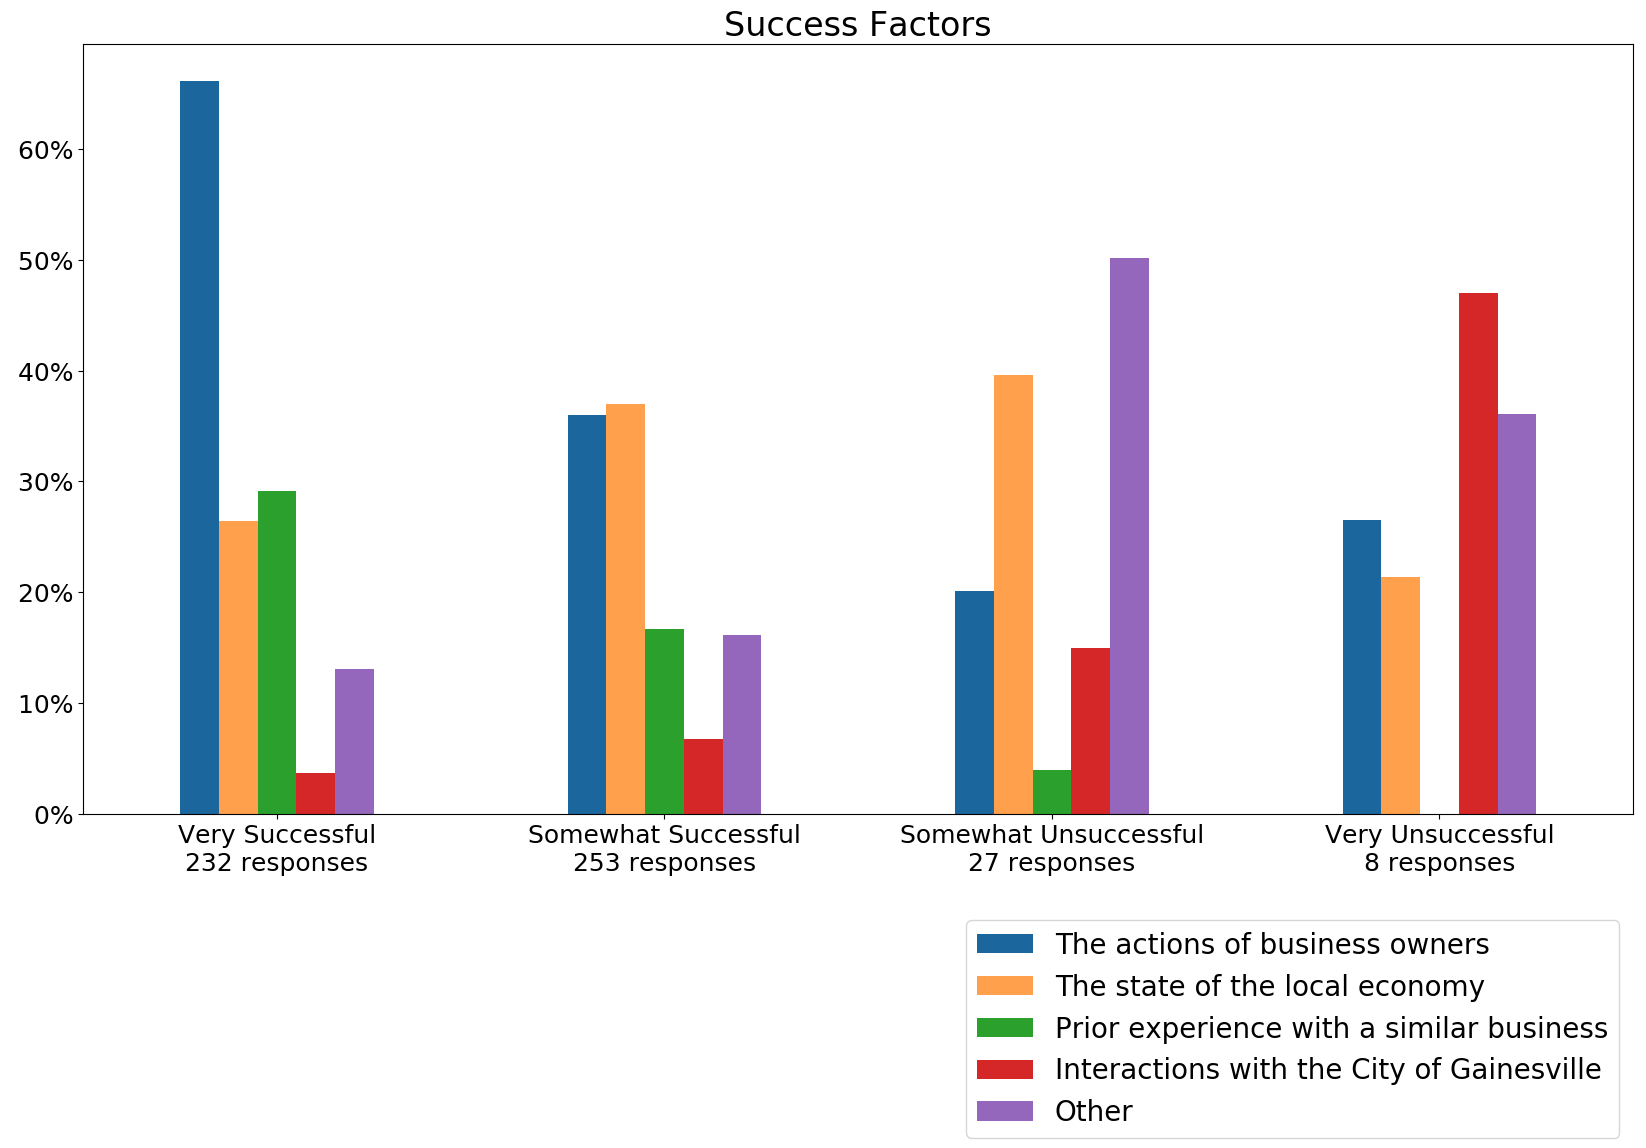

In [219]:
temp_df = crosstab_norm_df.drop(axis='columns', labels='Total Respondents')
ax = temp_df.plot(kind='bar', title='Success Factors', rot=0, figsize=(20,10))
ax.set_xlabel('')
ax.set_ylabel('')

ax.legend(loc='upper right', bbox_to_anchor=(1, -0.12))

# Include number of responses below success levels
x_ticks = ax.get_xticklabels()
for x in x_ticks:
    label = x.get_text()
    row = crosstab_df.loc[label]
    total_responses = int(row[5])
    x.set_text(x.get_text() + '\n' + str(total_responses) + ' responses')
ax.set_xticklabels(x_ticks)

# Put y axis in percentages
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])

### Other reasons for "Very Successful"

In [220]:
merged_df[merged_df['Q43'] == 1]['Q44_5_TEXT'].value_counts()

Location                                                                                                                                                                                         2
Word of mouth                                                                                                                                                                                    1
our community is supportive of local businesses                                                                                                                                                  1
Combinations of business owners actions, God, Gainesville community, and people's goodness                                                                                                       1
The community                                                                                                                                                                                    1
My expertise             

### Other reasons for "Somewhat Successful"

In [221]:
merged_df[merged_df['Q43'] == 2]['Q44_5_TEXT'].value_counts()

Don't have the time to operate it full time                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     1
STATE DECLINED USE OF MINORITY BUISNESS                                                                                                                                                                                                                                                                                                                               

### Other reasons for "Somewhat Unsuccessful"

In [222]:
merged_df[merged_df['Q43'] == 3]['Q44_5_TEXT'].value_counts()

taxes, taxes, and taxes                                                                                                                                                 1
lack of knowledge with marketing and advertising                                                                                                                        1
injury                                                                                                                                                                  1
I moved to Pensacola, FL                                                                                                                                                1
just opened this week                                                                                                                                                   1
Too many lawyers, not enough clients. Gainesville’s legal community is far too large. I’ll probably stick it out though, I’ll just have to work until 

### Other reasons for "Very Unsuccessful"

In [223]:
merged_df[merged_df['Q43'] == 4]['Q44_5_TEXT'].value_counts()

Bad Partners                                     1
Education of services provided to the public     1
No growth due to loss of government contracts    1
Changes in State Law                             1
Name: Q44_5_TEXT, dtype: int64

In [224]:
temp = survey_df['Q43'].value_counts()
df = pd.DataFrame(crosstab_df)
# for column in df.iteritems():
#     print column[1]/temp[]

In [225]:
crosstab_norm_df['test'] = survey_df['Q43'].value_counts()

### Old Crosstab

In [226]:
temp = pd.crosstab(merged_df['Q43'],merged_df['Q44_1'], merged_df['weight'], aggfunc=sum, normalize=True)*100
temp.index = q43_choices
temp.columns = ['The actions of the business owners and employees']
temp['The actions of the business owners and employees']*0.624
# temp

Very Successful          37.983153
Somewhat Successful      22.547370
Somewhat Unsuccessful     1.344058
Very Unsuccessful         0.525419
Name: The actions of the business owners and employees, dtype: float64

In [227]:
temp = pd.crosstab(merged_df['Q43'],merged_df['Q44_2'], merged_df['weight'], aggfunc=sum,  normalize=True)*100
temp.index = q43_choices
temp.columns = ['The state of the local economy']
temp['The state of the local economy']*.3987

Very Successful          14.619971
Somewhat Successful      22.297197
Somewhat Unsuccessful     2.545561
Very Unsuccessful         0.407271
Name: The state of the local economy, dtype: float64

In [228]:
temp = pd.crosstab(merged_df['Q43'], merged_df['Q44_3'], merged_df['weight'], aggfunc=sum,  normalize=True)*100
temp.index = q43_choices[:3]
temp.columns = ['Prior experience with a similar business']
temp['Prior experience with a similar business']*0.2698

Very Successful          16.450044
Somewhat Successful      10.267308
Somewhat Unsuccessful     0.262648
Name: Prior experience with a similar business, dtype: float64

In [229]:
temp = pd.crosstab(merged_df['Q43'],merged_df['Q44_4'], merged_df['weight'], aggfunc=sum,  normalize=True)*100
temp.index = q43_choices
temp.columns = ['Interactions with the City of Gainesville']
temp['Interactions with the City of Gainesville']*0.0837

Very Successful          2.125042
Somewhat Successful      4.291165
Somewhat Unsuccessful    1.012302
Very Unsuccessful        0.941491
Name: Interactions with the City of Gainesville, dtype: float64

In [230]:
temp = pd.crosstab(merged_df['Q43'],merged_df['Q44_5'], merged_df['weight'], aggfunc=sum,  normalize=True)*100
temp.index = q43_choices
temp.columns = ['Others']
temp['Others']*0.22

Very Successful           7.611138
Somewhat Successful      10.257285
Somewhat Unsuccessful     3.405176
Very Unsuccessful         0.726402
Name: Others, dtype: float64

In [231]:
temp = pd.crosstab(merged_df['Q43'],merged_df['Q44_1'], normalize=True)*100
temp.index = q43_choices
temp.columns = ['The actions of the business owners and employees']
temp

The actions of the business owners and employees
Very Successful                                               60.450161
Somewhat Successful                                           37.942122
Somewhat Unsuccessful                                          1.286174
Very Unsuccessful                                              0.321543

In [232]:
temp = pd.crosstab(merged_df['Q43'],merged_df['Q44_2'], normalize=True)*100
temp.index = q43_choices
temp.columns = ['The state of the local economy']
temp

The state of the local economy
Very Successful                             35.820896
Somewhat Successful                         59.203980
Somewhat Unsuccessful                        3.980100
Very Unsuccessful                            0.995025

In [233]:
temp = pd.crosstab(merged_df['Q43'],merged_df['Q44_3'], normalize=True)*100
temp.index = q43_choices[:3]
temp.columns = ['Prior experience with a similar business']
temp

Prior experience with a similar business
Very Successful                                       57.664234
Somewhat Successful                                   41.605839
Somewhat Unsuccessful                                  0.729927

In [234]:
temp = pd.crosstab(merged_df['Q43'],merged_df['Q44_4'], normalize=True)*100
temp.index = q43_choices
temp.columns = ['Interactions with the City of Gainesville']
temp

Interactions with the City of Gainesville
Very Successful                                        30.769231
Somewhat Successful                                    51.282051
Somewhat Unsuccessful                                   7.692308
Very Unsuccessful                                      10.256410

** Q45 - In the last 5 years, have you done any remodeling at this location? ** 

In [235]:
num_res_df.loc['Q45']

Number of responses    518
Name: Q45, dtype: int64

In [236]:
q45 = survey_df['Q45'].value_counts(normalize = True)

In [237]:
q45_choices = ['Yes', 'No']
for i in range(5,7):
    print "{:5s} ----- {:4f} %".format(q45_choices[i-5] ,q45.loc[i]*100)

Yes   ----- 27.799228 %
No    ----- 72.007722 %


In [238]:
merged_df.groupby('Q45').agg({'weight':'sum'})

weight
Q45            
5    122.759264
6    289.229621

In [239]:
survey_df['Q43'][survey_df['Q45'] == 5].value_counts()

1    78
2    58
3     4
4     2
Name: Q43, dtype: int64

** Q46  - Was this remodeling done for the purpose of business expansion? ** 

In [240]:
num_res_df.loc['Q46']

Number of responses    145
Name: Q46, dtype: int64

In [241]:
q46 = survey_df['Q46'].value_counts(normalize = True)

In [242]:
q46_choices = ['Yes', 'No']
for i in range(4,6):
    print "{:5s} ----- {:4f} %".format(q46_choices[i-4] ,q46.loc[i]*100)

Yes   ----- 41.379310 %
No    ----- 58.620690 %


In [243]:
merged_df.groupby('Q46').agg({'weight':'sum'})

weight
Q46           
4    53.257682
5    69.501583

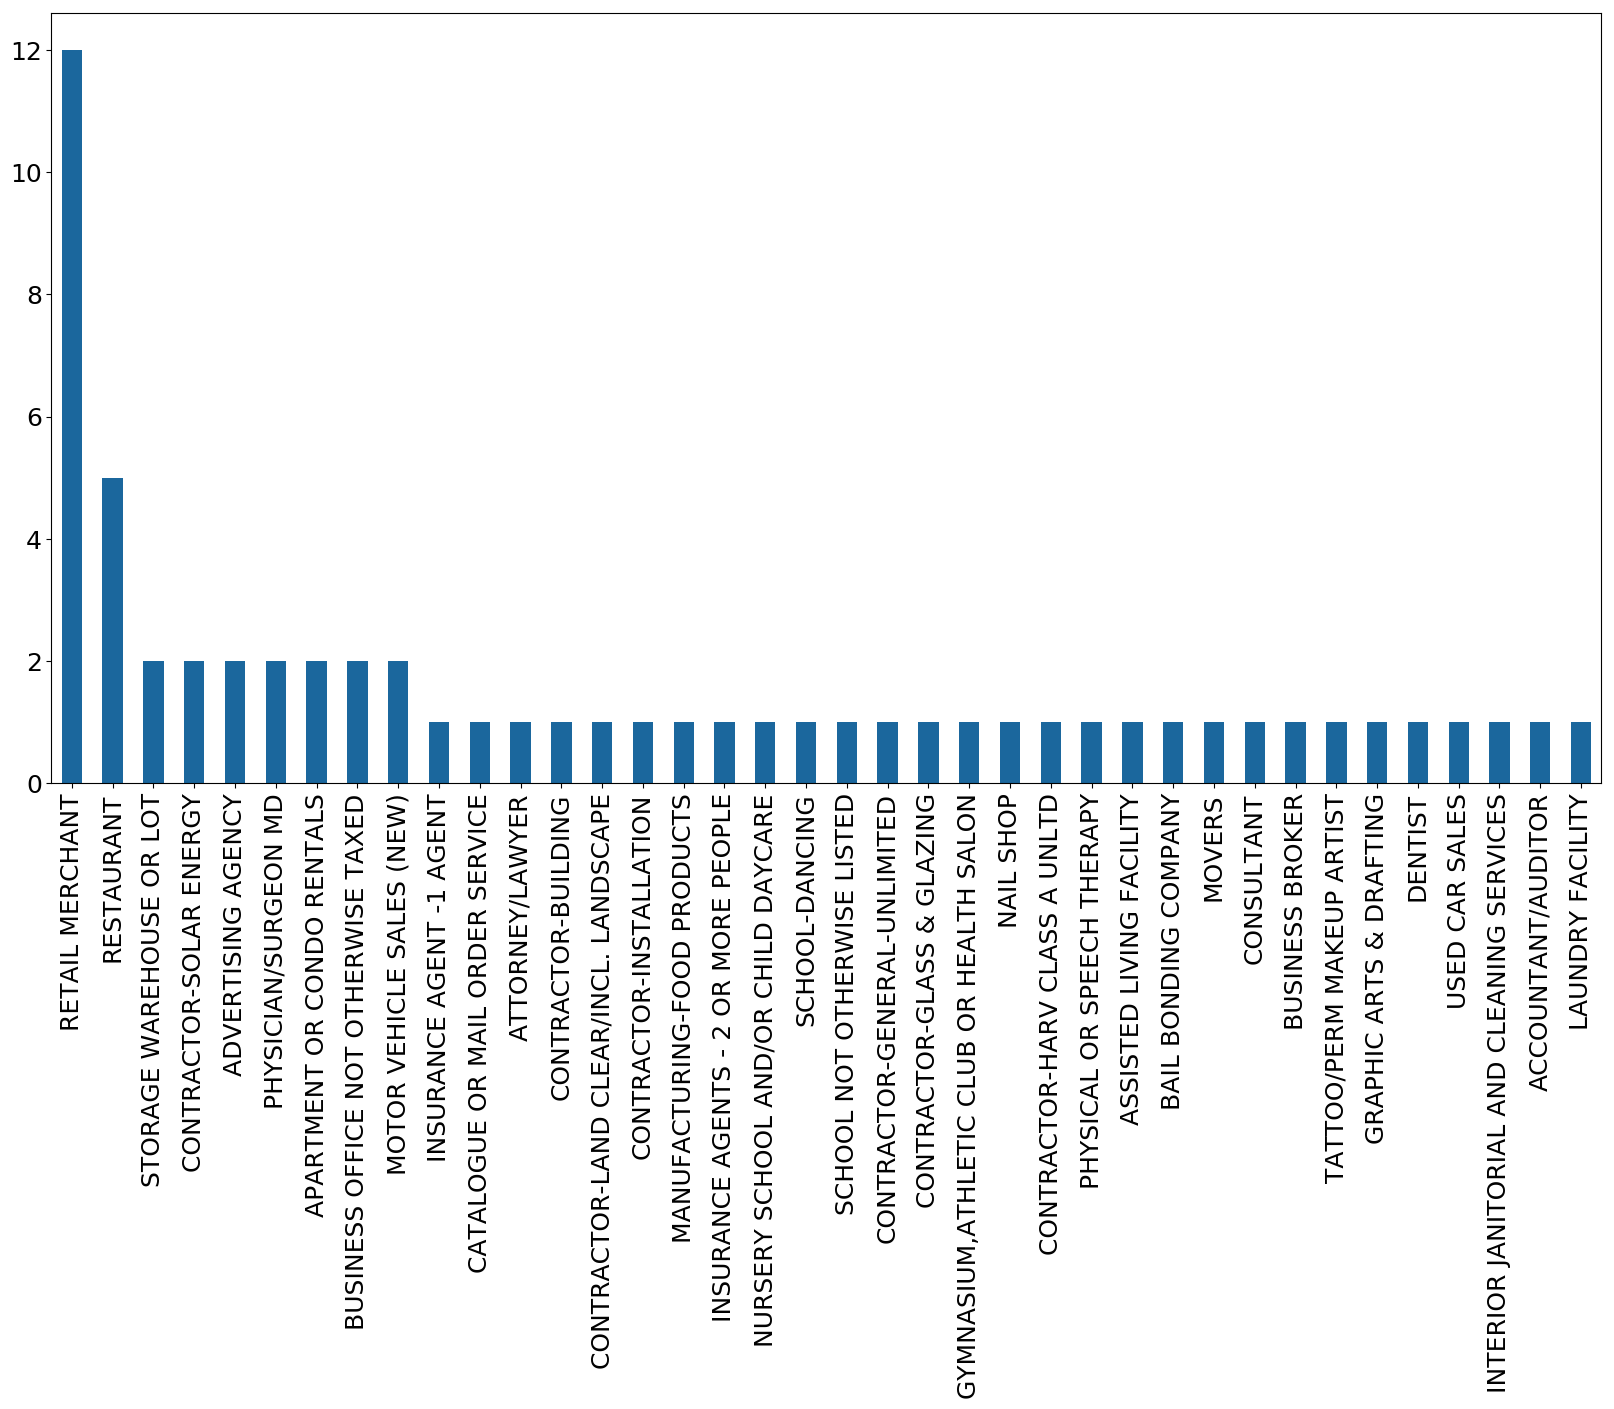

In [244]:
merged_df[merged_df['Q46'] == 4]['Business Type'].value_counts().plot(kind='bar', figsize=(20,10))

** Relating success of business with remodeling for business expansion **

In [245]:
num_of_succ_business  = survey_df['Q43'].value_counts()[3] + survey_df['Q43'].value_counts()[4]
num_of_succ_business

35

In [246]:
temp = pd.crosstab(merged_df['Q43'],merged_df['Q45'], merged_df['weight'], aggfunc=sum , normalize=True)*100
temp.index = q43_choices
temp.columns = ['Yes','No']
temp

Yes         No
Very Successful        15.557114  29.597310
Somewhat Successful    12.199748  34.468357
Somewhat Unsuccessful   1.520215   4.694042
Very Unsuccessful       0.342269   1.620944

In [247]:
temp = pd.crosstab(merged_df['Q43'],merged_df['Q45'], normalize=True)*100
temp.index = q43_choices
temp.columns = ['Yes','No']
temp

Yes         No
Very Successful        15.204678  29.434698
Somewhat Successful    11.306043  37.426901
Somewhat Unsuccessful   0.779727   4.288499
Very Unsuccessful       0.389864   1.169591

** Q47 Revenues for 2016**

In [248]:
def getDir(row):
    try:
        i = row.index('(')
        co_orinates = row[i+1:-1]
        return co_orinates
    except:
        return None

In [249]:
from enum import Enum
class Region(Enum):
    NE = 0
    SE = 1
    SW = 2
    NW = 3
    
def getRegion(row):
    try:
        
        lat,lng = row.split(',')
        lat = float(lat)
        lng = float(lng)
        
        # REGION POSSIBLE VALUES
        region = Region.NE

        if(lat > 29.651961):
            if(lng < -82.325002):
                region = Region.NW
        else:
            if(lng < -82.325002):
                region = Region.SW
            else:
                region = Region.SE
        return region
    except:
        pass

In [250]:
merged_df['Region'] = merged_df['Location_y'].apply(getDir).apply(getRegion)

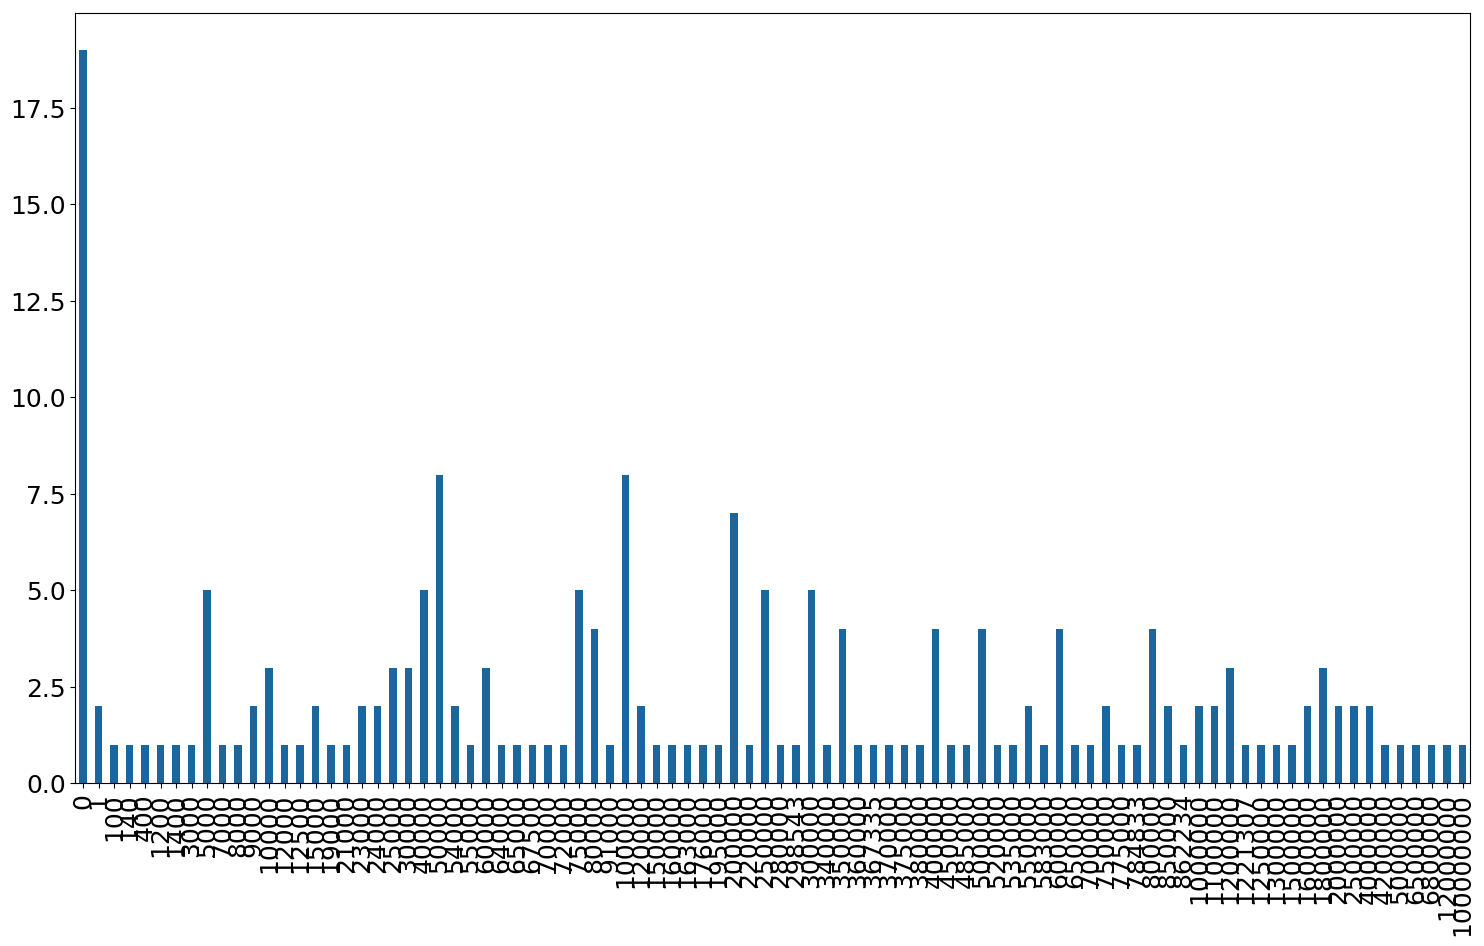

In [251]:
merged_df['Q47'][merged_df['Region']==Region.NW].value_counts().sort_index().plot(kind='bar', figsize=(18,10))

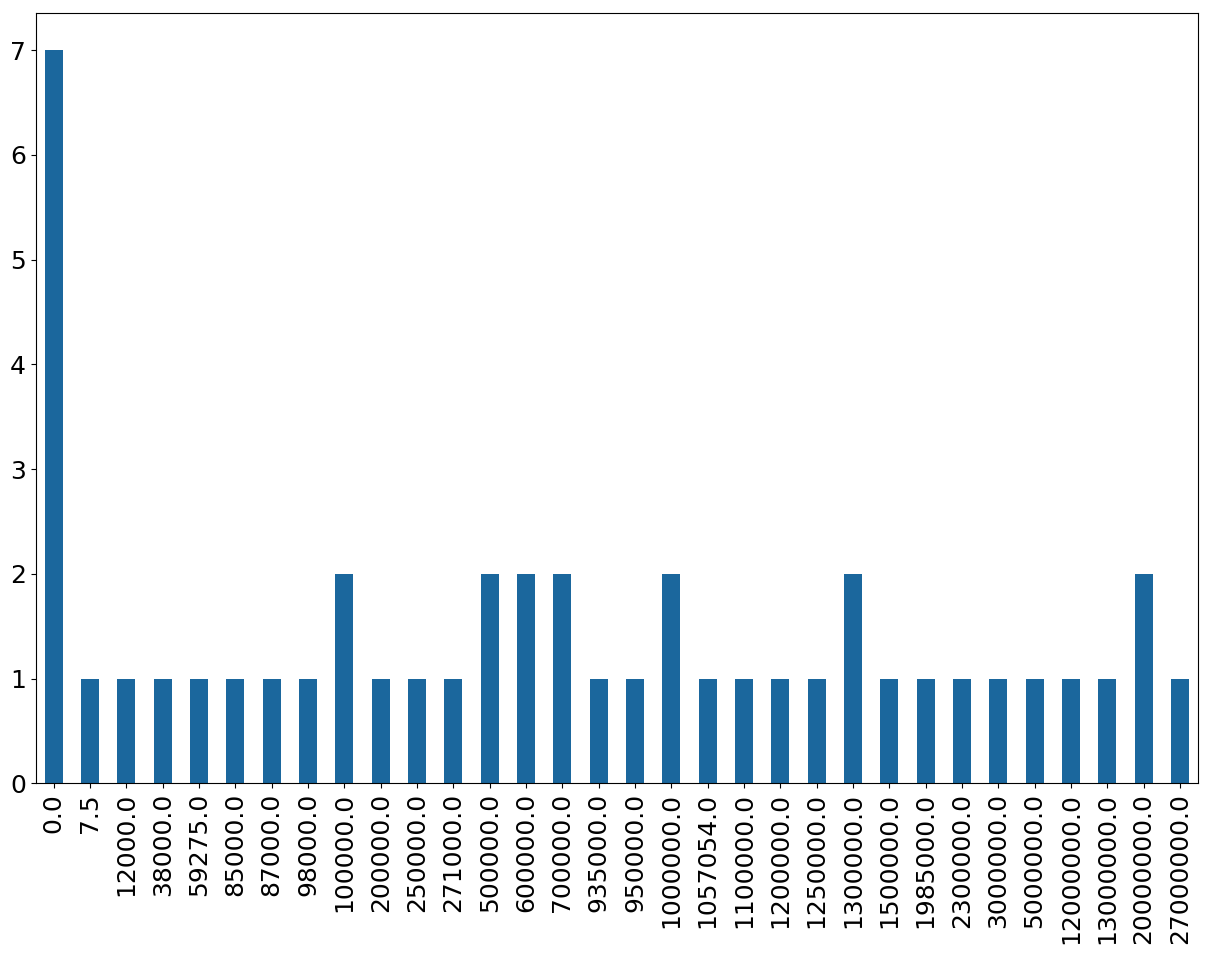

In [252]:
merged_df['Q47'][merged_df['Region']==Region.NE].value_counts().sort_index().plot(kind='bar', figsize=(15,10))

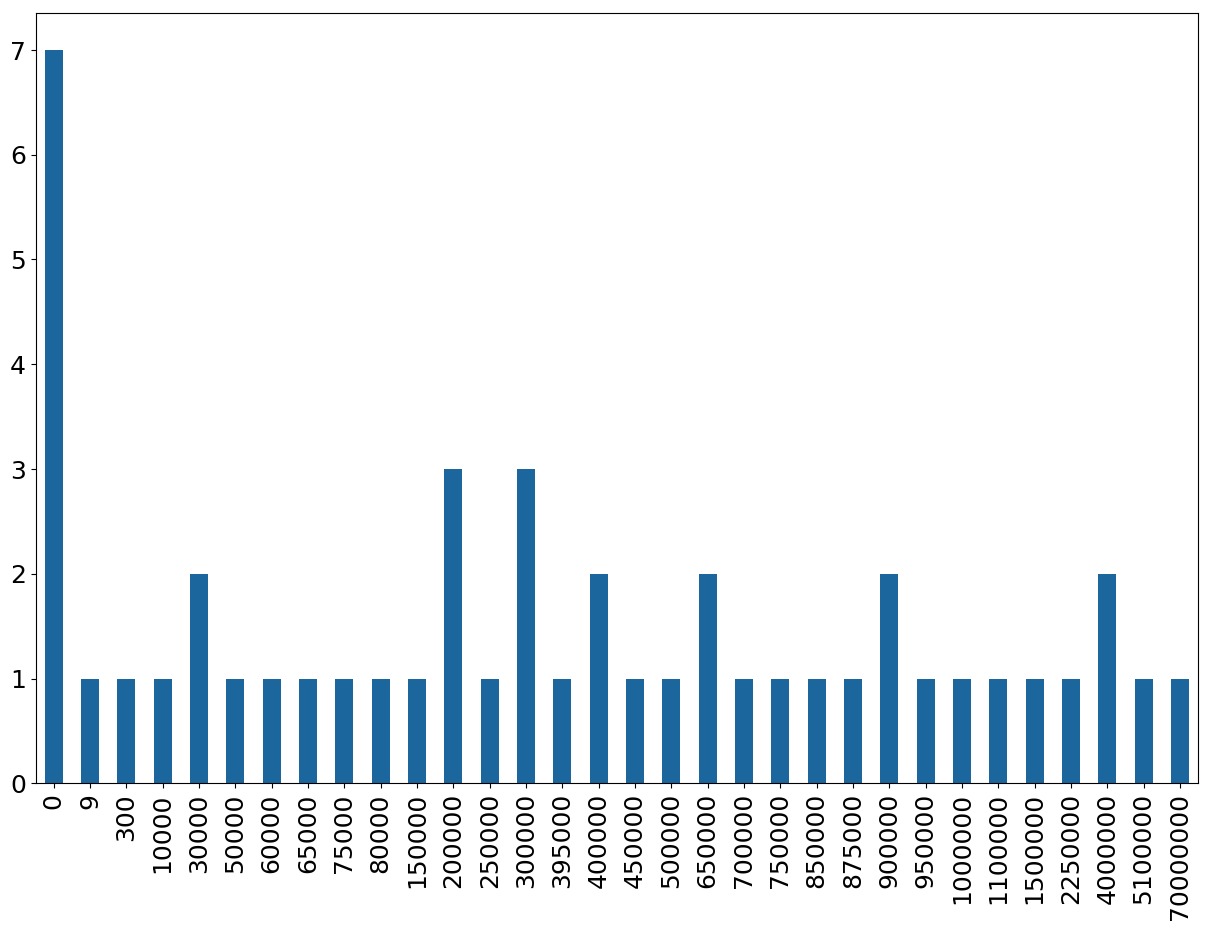

In [253]:
merged_df['Q47'][merged_df['Region']==Region.SW].value_counts().sort_index().plot(kind='bar', figsize=(15,10))

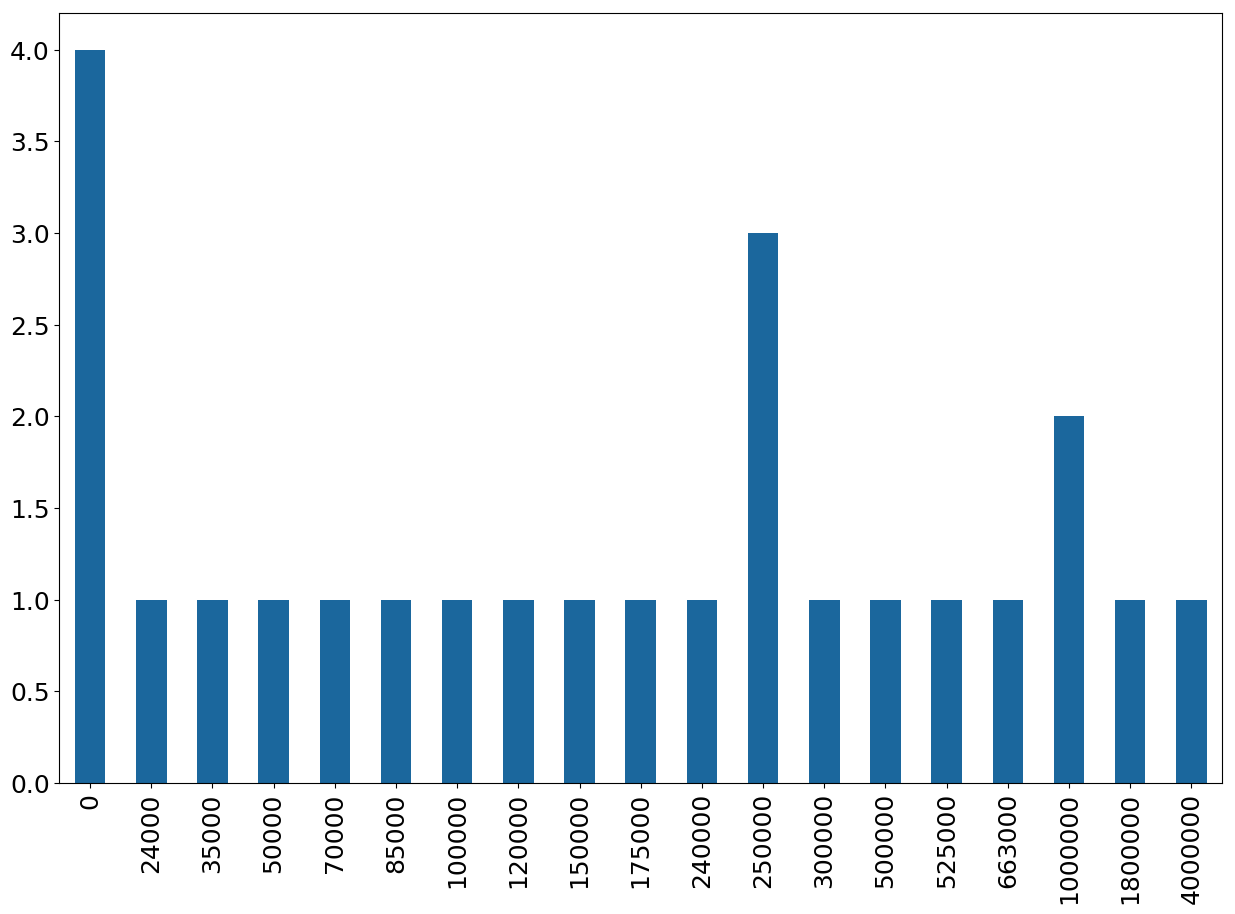

In [254]:
merged_df['Q47'][merged_df['Region']==Region.SE].value_counts().sort_index().plot(kind='bar', figsize=(15,10))

** Q48 - Expenses for 2016 **

In [255]:
(survey_df['Q47'] - survey_df['Q48'])

2         5000
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9        -5000
10      450000
11      192800
12       18900
13           0
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20      695000
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28       50000
29       24000
30         NaN
31         NaN
        ...   
721        NaN
722     700000
723        NaN
724        450
725        NaN
726        NaN
727          0
728        NaN
729     129000
730        NaN
731        NaN
732        NaN
733          0
734      25000
735        NaN
736      48000
737      40000
738        NaN
739        NaN
740     100000
741        NaN
742        NaN
743        NaN
744        NaN
745    1988000
746        NaN
747        NaN
748        NaN
749        NaN
750     100000
Length: 749, dtype: object

In [256]:
merged_df['Business Type'].value_counts()[:15]

RETAIL MERCHANT                              83
RESTAURANT                                   38
ATTORNEY/LAWYER                              36
CONSULTANT                                   25
APARTMENT OR CONDO RENTALS                   22
MASSAGE THERAPIST                            18
INTERIOR JANITORIAL AND CLEANING SERVICES    18
WHOLESALE MERCHANT                           15
REAL ESTATE BROKER                           15
AUTO REPAIR GARAGE                           13
MENTAL HEALTH COUNSELOR                      13
PROFESSIONAL-ACUPUNCTURE                     13
SERVICE-OTHER                                12
BEAUTY PARLOR                                11
CATALOGUE OR MAIL ORDER SERVICE              10
Name: Business Type, dtype: int64